In [1]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [21]:
import os
import random
import itertools
import jax
from src.utils.preprocess_dataset import get_adult_train_raw, get_adult_train_low_discretization, clean_adult_with_discretization
from src.napsu_mq.napsu_mq import NapsuMQModel
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
DATASETS_FOLDER = os.path.join(CURRENT_FOLDER, "data", "datasets")

In [4]:
adult_df = get_adult_train_raw(DATASETS_FOLDER)
adult_df = clean_adult_with_discretization(adult_df, bucket_size = 5, 
                                           columns = ['age', 'workclass', 'education-num', 'marital-status',
                                                    'occupation', 'relationship', 'race', 'sex',
                                                     'hours-per-week', 'native-country', 'had-capital-gains', 
                                                      'had-capital-losses', 'compensation']
                                          )
columns = adult_df.columns
print(columns)

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'had-capital-gains', 'had-capital-losses', 'compensation'],
      dtype='object')


In [5]:
rng = jax.random.PRNGKey(23865823582)

model_metas = []

for i in range(2, len(columns)+1):
    columns_subset = random.sample(list(columns), i)
    
    queries = list(itertools.combinations(columns_subset, 2))
    
    dataset_subset = adult_df[columns_subset]
    
    n, d = dataset_subset.shape
    
    print(n)
    print(d)
    
    model = NapsuMQModel()

    meta = model.fit(
        data=dataset_subset,
        dataset_name="adult",
        rng=rng,
        epsilon=1,
        delta=(n ** (-2)),
        column_feature_set=queries,
        MCMC_algo="NUTS",
        use_laplace_approximation=False,
        dry_run=True
    )
    
    print(meta)
    
    model_metas.append({**meta, 'n_columns': i})

30162
2
No experiment_id found: <ContextVar name='experiment_id' at 0x7fa26835cc70>
Setting experiment_id to QUOE43NH
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 1
Weights: {('hours-per-week', 'workclass'): 4389.725624879067}
Sorted weights: [(('hours-per-week', 'workclass'), 4389.725624879067)]
Cliques: [('hours-per-week', 'workclass')]
T edges: [('hours-per-week', 'workclass')]
Recording:  Calculating full marginal query
Recording:  Calculating canonical query set


  0%|                                                                                                                  | 0/4 [00:00<?, ?it/s]
20it [00:00, 29066.56it/s]

7it [00:00, 29807.24it/s]

140it [00:00, 31284.10it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 13789.79it/s]

Canonical queries: 139
Domain d: 2
Nodes after elimination: {('workclass',), ('hours-per-week', 'workclass')}
Edges after elimination: {(('hours-per-week', 'workclass'), ('workclass',)): {'workclass'}}
Nodes after removing: {('hours-per-week', 'workclass')}
Edges after removing: {}
Suff stat d: 139
Lambda d: 139
[]
0
Junction tree width: 0


{'original_queries': [('hours-per-week', 'workclass')], 'canonical_query_number': 139, 'tree_width': 0, 'sigma_DP': 7.749195614014839, 'suff_stat_dim': (139,)}
30162
3
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 3
Weights: {('hours-per-week', 'education-num'): 5683.185504489601, ('hours-per-week', 'relationship'): 7043.570107925798, ('education-num', 'relationship'): 5004.3301266224435}
Sorted weights: [(('education-num', 'relationship'), 5004.3301266224435), (('hours-per-week', 'education-num'), 5683.185504489601), (('hours-per-week', 'relationship'), 7043.570107925798)]
Cliques: [('hours-per-week', 'education-num'), ('hours-per-week', 'relationship'), ('education-num', 'relationship')]
T edges: [('hours-per-week', 'education-num'), ('hours-per-week', 'relationship'), ('education-num', 'relationship')]
Recording:  Calculating full marginal query
Recording:  Calculating canonical query set


  0%|                                                                                                                  | 0/7 [00:00<?, ?it/s]
320it [00:00, 28209.45it/s]

6it [00:00, 12564.07it/s]

96it [00:00, 34441.30it/s]

16it [00:00, 26683.44it/s]

120it [00:00, 32019.62it/s]

20it [00:00, 42302.61it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 15113.91it/s]

Canonical queries: 494
Domain d: 3
Nodes after elimination: {('education-num', 'relationship'), ('hours-per-week', 'education-num', 'relationship'), ('relationship',)}
Edges after elimination: {(('hours-per-week', 'education-num', 'relationship'), ('education-num', 'relationship')): {'education-num', 'relationship'}, (('education-num', 'relationship'), ('relationship',)): {'relationship'}}
Nodes after removing: {('hours-per-week', 'education-num', 'relationship')}
Edges after removing: {}
Suff stat d: 494
Lambda d: 494
[]
0
Junction tree width: 0


{'original_queries': [('hours-per-week', 'education-num'), ('hours-per-week', 'relationship'), ('education-num', 'relationship')], 'canonical_query_number': 494, 'tree_width': 0, 'sigma_DP': 13.422000521263602, 'suff_stat_dim': (494,)}
30162
4
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 6
Weights: {('race', 'relationship'): 2651.3588266388106, ('race', 'education-num'): 1663.9234015620077, ('race', 'had-capital-losses'): 216.64316713746774, ('relationship', 'education-num'): 5002.475478492021, ('relationship', 'had-capital-losses'): 992.7110145280479, ('education-num', 'had-capital-losses'): 989.3229758365428}
Sorted weights: [(('race', 'had-capital-losses'), 216.64316713746774), (('education-num', 'had-capital-losses'), 989.3229758365428), (('relationship', 'had-capital-losses'), 992.7110145280479), (('race', 'education-num'), 1663.9234015620077), (('race', 'relationship'), 2651.3588266388106), (('relationship', 'education-num'), 5002.475478492021)]
Cliques: [('race', 'relationship'), ('race', 'education-num'), ('race', 'had-capital-losses'), ('relationship', 'education-num'), ('relationship', 'had-capital-losses'), ('education-num', 'had-capital-losses')]
T edges: [('race', 'relationship'), ('race', 'education-num'), ('race', 'had-capital-losses'), ('re

  0%|                                                                                                                 | 0/11 [00:00<?, ?it/s]
30it [00:00, 18680.10it/s]

12it [00:00, 16605.62it/s]

16it [00:00, 24420.98it/s]

96it [00:00, 36521.83it/s]

10it [00:00, 27924.79it/s]

32it [00:00, 29899.25it/s]

6it [00:00, 25758.26it/s]

80it [00:00, 24295.44it/s]

5it [00:00, 27130.04it/s]

2it [00:00, 6569.00it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 35472.80it/s]

Canonical queries: 204
Domain d: 4
Nodes after elimination: {('race', 'relationship'), ('education-num', 'had-capital-losses', 'race', 'relationship'), ('had-capital-losses', 'race', 'relationship'), ('relationship',)}
Edges after elimination: {(('education-num', 'had-capital-losses', 'race', 'relationship'), ('had-capital-losses', 'race', 'relationship')): {'had-capital-losses', 'race', 'relationship'}, (('had-capital-losses', 'race', 'relationship'), ('race', 'relationship')): {'race', 'relationship'}, (('race', 'relationship'), ('relationship',)): {'relationship'}}
Nodes after removing: {('education-num', 'had-capital-losses', 'race', 'relationship')}
Edges after removing: {}
Suff stat d: 204
Lambda d: 204
[]
0
Junction tree width: 0


{'original_queries': [('race', 'relationship'), ('race', 'education-num'), ('race', 'had-capital-losses'), ('relationship', 'education-num'), ('relationship', 'had-capital-losses'), ('education-num', 'had-capital-losses')], 'canonical_query_number': 204, 'tree_width': 0, 'sigma_DP': 18.98157517134974, 'suff_stat_dim': (204,)}
30162
5
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 10
Weights: {('occupation', 'race'): 2762.4481058580295, ('occupation', 'workclass'): 8574.947418769043, ('occupation', 'sex'): 9724.157981810367, ('occupation', 'relationship'): 9415.550964352178, ('race', 'workclass'): 1169.3414603549325, ('race', 'sex'): 2053.8852244398563, ('race', 'relationship'): 2602.1422295012253, ('workclass', 'sex'): 2604.5196894749197, ('workclass', 'relationship'): 3919.9586504736294, ('sex', 'relationship'): 16177.284260231296}
Sorted weights: [(('race', 'workclass'), 1169.3414603549325), (('race', 'sex'), 2053.8852244398563), (('race', 'relationship'), 2602.1422295012253), (('workclass', 'sex'), 2604.5196894749197), (('occupation', 'race'), 2762.4481058580295), (('workclass', 'relationship'), 3919.9586504736294), (('occupation', 'workclass'), 8574.947418769043), (('occupation', 'relationship'), 9415.550964352178), (('occupation', 'sex'), 9724.157981810367), (('sex', 'relationship'), 16177.284260231296)]
Cliques: [('occupation', 'race'), ('occ

  0%|                                                                                                                 | 0/16 [00:00<?, ?it/s]
70it [00:00, 33666.01it/s]

10it [00:00, 10669.81it/s]

42it [00:00, 29842.58it/s]

7it [00:00, 13430.98it/s]

84it [00:00, 32193.12it/s]

35it [00:00, 27060.03it/s]

12it [00:00, 32472.03it/s]

28it [00:00, 36336.79it/s]

6it [00:00, 36472.21it/s]

30it [00:00, 26208.94it/s]

14it [00:00, 28163.19it/s]

5it [00:00, 9562.94it/s]

98it [00:00, 27008.46it/s]

14it [00:00, 20763.88it/s]

2it [00:00, 8542.37it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 12357.49it/s]

Canonical queries: 326
Domain d: 5
Nodes after elimination: {('sex', 'race', 'workclass', 'relationship'), ('race', 'sex', 'relationship'), ('race',), ('occupation', 'sex', 'workclass', 'relationship', 'race'), ('race', 'relationship')}
Edges after elimination: {(('occupation', 'sex', 'workclass', 'relationship', 'race'), ('sex', 'race', 'workclass', 'relationship')): {'sex', 'race', 'workclass', 'relationship'}, (('sex', 'race', 'workclass', 'relationship'), ('race', 'sex', 'relationship')): {'race', 'sex', 'relationship'}, (('race', 'sex', 'relationship'), ('race', 'relationship')): {'race', 'relationship'}, (('race', 'relationship'), ('race',)): {'race'}}
Nodes after removing: {('occupation', 'sex', 'workclass', 'relationship', 'race')}
Edges after removing: {}
Suff stat d: 326
Lambda d: 326
[]
0
Junction tree width: 0


{'original_queries': [('occupation', 'race'), ('occupation', 'workclass'), ('occupation', 'sex'), ('occupation', 'relationship'), ('race', 'workclass'), ('race', 'sex'), ('race', 'relationship'), ('workclass', 'sex'), ('workclass', 'relationship'), ('sex', 'relationship')], 'canonical_query_number': 326, 'tree_width': 0, 'sigma_DP': 24.505108174473914, 'suff_stat_dim': (326,)}
30162
6
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 15
Weights: {('marital-status', 'workclass'): 3915.4171305656714, ('marital-status', 'had-capital-losses'): 919.6660144259158, ('marital-status', 'race'): 2550.0532383757263, ('marital-status', 'native-country'): 1045.909405099467, ('marital-status', 'sex'): 12360.10723736696, ('workclass', 'had-capital-losses'): 473.0740788474699, ('workclass', 'race'): 1071.8250491611257, ('workclass', 'native-country'): 1128.71478366184, ('workclass', 'sex'): 2595.811680472942, ('had-capital-losses', 'race'): 224.570608635375, ('had-capital-losses', 'native-country'): 443.2625564091996, ('had-capital-losses', 'sex'): 520.753777533083, ('race', 'native-country'): 3007.111631906159, ('race', 'sex'): 2058.982581847521, ('native-country', 'sex'): 600.0152953631907}
Sorted weights: [(('had-capital-losses', 'race'), 224.570608635375), (('had-capital-losses', 'native-country'), 443.2625564091996), (('workclass', 'had-capital-losses'), 473.0740788474699), (('had-capital-losses', 'sex'), 520.753

  0%|                                                                                                                 | 0/22 [00:00<?, ?it/s]
2it [00:00, 11650.84it/s]

205it [00:00, 33605.58it/s]

2it [00:00, 9362.29it/s]

14it [00:00, 22378.15it/s]

14it [00:00, 31895.85it/s]

4it [00:00, 25420.02it/s]

35it [00:00, 20270.73it/s]

41it [00:00, 50968.13it/s]

7it [00:00, 18881.11it/s]

82it [00:00, 36070.57it/s]

49it [00:00, 30375.54it/s]

82it [00:00, 20929.41it/s]

14it [00:00, 18213.48it/s]

287it [00:00, 42608.14it/s]

14it [00:00, 24600.02it/s]

7it [00:00, 24860.40it/s]

5it [00:00, 24556.81it/s]

10it [00:00, 31631.25it/s]

35it [00:00, 27444.50it/s]

287it [00:00, 37086.86it/s]

10it [00:00, 15352.50it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<00:00, 33647.25it/s]

Canonical queries: 895
Domain d: 6
Nodes after elimination: {('had-capital-losses', 'race', 'native-country'), ('workclass', 'sex', 'marital-status', 'had-capital-losses', 'race', 'native-country'), ('race', 'native-country'), ('had-capital-losses', 'race', 'sex', 'native-country'), ('workclass', 'sex', 'had-capital-losses', 'race', 'native-country'), ('native-country',)}
Edges after elimination: {(('workclass', 'sex', 'marital-status', 'had-capital-losses', 'race', 'native-country'), ('workclass', 'sex', 'had-capital-losses', 'race', 'native-country')): {'workclass', 'sex', 'had-capital-losses', 'race', 'native-country'}, (('workclass', 'sex', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'sex', 'native-country')): {'had-capital-losses', 'race', 'sex', 'native-country'}, (('had-capital-losses', 'race', 'sex', 'native-country'), ('had-capital-losses', 'race', 'native-country')): {'had-capital-losses', 'race', 'native-country'}, (('had-capital-losses', 

{'original_queries': [('marital-status', 'workclass'), ('marital-status', 'had-capital-losses'), ('marital-status', 'race'), ('marital-status', 'native-country'), ('marital-status', 'sex'), ('workclass', 'had-capital-losses'), ('workclass', 'race'), ('workclass', 'native-country'), ('workclass', 'sex'), ('had-capital-losses', 'race'), ('had-capital-losses', 'native-country'), ('had-capital-losses', 'sex'), ('race', 'native-country'), ('race', 'sex'), ('native-country', 'sex')], 'canonical_query_number': 895, 'tree_width': 0, 'sigma_DP': 30.01250555958303, 'suff_stat_dim': (895,)}
30162
7
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 21
Weights: {('marital-status', 'hours-per-week'): 6540.705356075886, ('marital-status', 'native-country'): 1281.7427592814022, ('marital-status', 'race'): 2526.2683092020616, ('marital-status', 'occupation'): 8021.591404467595, ('marital-status', 'age'): 15061.501374356401, ('marital-status', 'workclass'): 3961.066971108404, ('hours-per-week', 'native-country'): 1649.8466077113012, ('hours-per-week', 'race'): 2432.5686330188655, ('hours-per-week', 'occupation'): 9854.298841184576, ('hours-per-week', 'age'): 7249.532936268381, ('hours-per-week', 'workclass'): 4464.628384657015, ('native-country', 'race'): 2967.1133184877044, ('native-country', 'occupation'): 2161.5111653441827, ('native-country', 'age'): 1599.7547375355539, ('native-country', 'workclass'): 1314.3374924001912, ('race', 'occupation'): 2849.3037477551816, ('race', 'age'): 1032.3832370294208, ('race', 'workclass'): 1081.0113339505372, ('occupation', 'age'): 6339.561644600462, ('occupation', 'workclass'): 8426.

  0%|                                                                                                                 | 0/29 [00:00<?, ?it/s]
41it [00:00, 48468.56it/s]

70it [00:00, 26109.50it/s]

20it [00:00, 29537.35it/s]

98it [00:00, 39247.76it/s]

287it [00:00, 45274.76it/s]

140it [00:00, 46426.51it/s]

140it [00:00, 38112.71it/s]

820it [00:00, 49924.94it/s]

100it [00:00, 34075.10it/s]

14it [00:00, 19566.90it/s]

20it [00:00, 23946.93it/s]

280it [00:00, 32019.33it/s]

140it [00:00, 29147.35it/s]

35it [00:00, 16804.10it/s]

140it [00:00, 34828.15it/s]

574it [00:00, 45974.19it/s]
 55%|████████████████████████████████████████████████████████▊                                              | 16/29 [00:00<00:00, 155.50it/s]
820it [00:00, 46782.14it/s]

98it [00:00, 28650.02it/s]

400it [00:00, 40857.26it/s]

7it [00:00, 12419.68it/s]

5it [00:00, 20641.26it/s]

100it [00:00, 41351.71it/s]

7it [00:00, 32442.13it/s]

35it [00:00, 29801.19it/s]

280it [00:00, 44903.46it/s]

49it [0

Canonical queries: 4542
Domain d: 7
Nodes after elimination: {('occupation', 'workclass', 'marital-status', 'hours-per-week', 'age', 'race', 'native-country'), ('marital-status', 'hours-per-week', 'age', 'race', 'native-country'), ('hours-per-week', 'age', 'race', 'native-country'), ('age', 'race', 'native-country'), ('race', 'native-country'), ('workclass', 'marital-status', 'hours-per-week', 'age', 'race', 'native-country'), ('native-country',)}
Edges after elimination: {(('occupation', 'workclass', 'marital-status', 'hours-per-week', 'age', 'race', 'native-country'), ('workclass', 'marital-status', 'hours-per-week', 'age', 'race', 'native-country')): {'workclass', 'marital-status', 'hours-per-week', 'age', 'race', 'native-country'}, (('workclass', 'marital-status', 'hours-per-week', 'age', 'race', 'native-country'), ('marital-status', 'hours-per-week', 'age', 'race', 'native-country')): {'marital-status', 'hours-per-week', 'age', 'race', 'native-country'}, (('marital-status', 'hours

{'original_queries': [('marital-status', 'hours-per-week'), ('marital-status', 'native-country'), ('marital-status', 'race'), ('marital-status', 'occupation'), ('marital-status', 'age'), ('marital-status', 'workclass'), ('hours-per-week', 'native-country'), ('hours-per-week', 'race'), ('hours-per-week', 'occupation'), ('hours-per-week', 'age'), ('hours-per-week', 'workclass'), ('native-country', 'race'), ('native-country', 'occupation'), ('native-country', 'age'), ('native-country', 'workclass'), ('race', 'occupation'), ('race', 'age'), ('race', 'workclass'), ('occupation', 'age'), ('occupation', 'workclass'), ('age', 'workclass')], 'canonical_query_number': 4542, 'tree_width': 0, 'sigma_DP': 35.5112754762428, 'suff_stat_dim': (4542,)}
30162
8
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 28
Weights: {('race', 'workclass'): 1279.7106447328274, ('race', 'native-country'): 2873.084606247472, ('race', 'had-capital-gains'): 394.59200083583414, ('race', 'sex'): 2128.8478383086513, ('race', 'occupation'): 2898.0795529828124, ('race', 'hours-per-week'): 2515.811086586495, ('race', 'had-capital-losses'): 269.18902456823264, ('workclass', 'native-country'): 1047.80268534128, ('workclass', 'had-capital-gains'): 746.5999657824982, ('workclass', 'sex'): 2614.7630219398993, ('workclass', 'occupation'): 8534.836477965588, ('workclass', 'hours-per-week'): 4568.092270905074, ('workclass', 'had-capital-losses'): 479.73836645062653, ('native-country', 'had-capital-gains'): 350.50292574464976, ('native-country', 'sex'): 403.30220097153443, ('native-country', 'occupation'): 1837.9952507293124, ('native-country', 'hours-per-week'): 1428.4486323200902, ('native-country', 'had-capital-losses'): 245.52708674462534, ('had-capital-gains', 'sex'): 1004.3451973265254, ('had-capital-ga

  0%|                                                                                                                 | 0/37 [00:00<?, ?it/s]
41it [00:00, 47101.20it/s]

4it [00:00, 18620.66it/s]

14it [00:00, 18378.80it/s]

4it [00:00, 10796.15it/s]

40it [00:00, 31968.78it/s]

28it [00:00, 32219.62it/s]

205it [00:00, 33511.28it/s]

70it [00:00, 37947.69it/s]

140it [00:00, 36097.78it/s]

574it [00:00, 41381.43it/s]
 27%|████████████████████████████                                                                            | 10/37 [00:00<00:00, 87.76it/s]
14it [00:00, 30711.43it/s]

2it [00:00, 19108.45it/s]

7it [00:00, 38379.25it/s]

2it [00:00, 4025.24it/s]

28it [00:00, 34612.59it/s]

280it [00:00, 44572.84it/s]

40it [00:00, 33078.11it/s]

35it [00:00, 26000.82it/s]

10it [00:00, 33130.36it/s]

82it [00:00, 40015.47it/s]

287it [00:00, 34856.38it/s]

10it [00:00, 31559.85it/s]

82it [00:00, 30471.60it/s]

98it [00:00, 32544.88it/s]

40it [00:00, 29101.85it/s]

5it [00:00, 13469.

Canonical queries: 2605
Domain d: 8
Nodes after elimination: {('had-capital-losses', 'race', 'native-country'), ('sex', 'hours-per-week', 'had-capital-losses', 'race', 'native-country'), ('workclass', 'sex', 'hours-per-week', 'had-capital-losses', 'race', 'native-country'), ('had-capital-gains', 'workclass', 'sex', 'hours-per-week', 'had-capital-losses', 'race', 'native-country'), ('race', 'native-country'), ('had-capital-losses', 'race', 'sex', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'hours-per-week', 'sex', 'had-capital-losses', 'race', 'native-country'), ('native-country',)}
Edges after elimination: {(('occupation', 'workclass', 'had-capital-gains', 'hours-per-week', 'sex', 'had-capital-losses', 'race', 'native-country'), ('had-capital-gains', 'workclass', 'sex', 'hours-per-week', 'had-capital-losses', 'race', 'native-country')): {'had-capital-gains', 'workclass', 'hours-per-week', 'sex', 'had-capital-losses', 'race', 'native-country'}, (('had-capital-gai

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 36
Weights: {('education-num', 'had-capital-losses'): 1148.3723163923826, ('education-num', 'relationship'): 5067.165086532082, ('education-num', 'race'): 1824.4691252198509, ('education-num', 'age'): 6382.305642425253, ('education-num', 'workclass'): 4164.082426396287, ('education-num', 'occupation'): 15281.625207113066, ('education-num', 'compensation'): 7517.168986477304, ('education-num', 'marital-status'): 4510.689999296186, ('had-capital-losses', 'relationship'): 1068.8185724035975, ('had-capital-losses', 'race'): 312.7723295289571, ('had-capital-losses', 'age'): 963.0219755648458, ('had-capital-losses', 'workclass'): 404.1273650891823, ('had-capital-losses', 'occupation'): 1192.7234439194667, ('had-capital-losses', 'compensation'): 1557.5116827855932, ('had-capital-losses', 'marital-status'): 1181.1696995831626, ('relationship', 'race'): 2533.7342263766886, ('relationship', 'age'): 12035.932528407433, ('relationship', 'workclass'): 3979.671137171819, ('relationship'

  0%|                                                                                                                 | 0/46 [00:00<?, ?it/s]
6it [00:00, 24059.11it/s]

100it [00:00, 37259.52it/s]

7it [00:00, 8388.61it/s]

10it [00:00, 30327.58it/s]

7it [00:00, 30775.82it/s]

280it [00:00, 36041.28it/s]

14it [00:00, 34259.19it/s]

96it [00:00, 37093.80it/s]

35it [00:00, 38339.16it/s]

112it [00:00, 39225.29it/s]

98it [00:00, 23593.26it/s]

28it [00:00, 37223.62it/s]

112it [00:00, 35054.25it/s]

42it [00:00, 30159.35it/s]

10it [00:00, 10302.88it/s]

20it [00:00, 11408.42it/s]

2it [00:00, 12069.94it/s]

2it [00:00, 4301.85it/s]

140it [00:00, 36647.48it/s]

98it [00:00, 28093.90it/s]

70it [00:00, 39989.28it/s]

42it [00:00, 22014.59it/s]

49it [00:00, 31608.87it/s]

32it [00:00, 26076.89it/s]

32it [00:00, 16077.83it/s]

120it [00:00, 20683.67it/s]
 57%|██████████████████████████████████████████████████████████▏                                            | 26/46 [00:00<00:00, 25

Canonical queries: 2085
Domain d: 9
Nodes after elimination: {('had-capital-losses', 'race', 'relationship'), ('had-capital-losses', 'race'), ('marital-status', 'compensation', 'relationship', 'age', 'had-capital-losses', 'education-num', 'race'), ('compensation', 'relationship', 'age', 'had-capital-losses', 'education-num', 'race'), ('race',), ('had-capital-losses', 'race', 'compensation', 'relationship'), ('workclass', 'marital-status', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('occupation', 'workclass', 'marital-status', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('compensation', 'relationship', 'age', 'had-capital-losses', 'race')}
Edges after elimination: {(('occupation', 'workclass', 'marital-status', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('workclass', 'marital-status', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'educ

{'original_queries': [('education-num', 'had-capital-losses'), ('education-num', 'relationship'), ('education-num', 'race'), ('education-num', 'age'), ('education-num', 'workclass'), ('education-num', 'occupation'), ('education-num', 'compensation'), ('education-num', 'marital-status'), ('had-capital-losses', 'relationship'), ('had-capital-losses', 'race'), ('had-capital-losses', 'age'), ('had-capital-losses', 'workclass'), ('had-capital-losses', 'occupation'), ('had-capital-losses', 'compensation'), ('had-capital-losses', 'marital-status'), ('relationship', 'race'), ('relationship', 'age'), ('relationship', 'workclass'), ('relationship', 'occupation'), ('relationship', 'compensation'), ('relationship', 'marital-status'), ('race', 'age'), ('race', 'workclass'), ('race', 'occupation'), ('race', 'compensation'), ('race', 'marital-status'), ('age', 'workclass'), ('age', 'occupation'), ('age', 'compensation'), ('age', 'marital-status'), ('workclass', 'occupation'), ('workclass', 'compensat

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 45
Weights: {('sex', 'workclass'): 2565.8645208178086, ('sex', 'marital-status'): 12350.322851570703, ('sex', 'occupation'): 9741.349335580548, ('sex', 'had-capital-gains'): 1111.3620296809024, ('sex', 'age'): 2743.993672214924, ('sex', 'had-capital-losses'): 572.4172413006902, ('sex', 'race'): 2037.1760845234357, ('sex', 'hours-per-week'): 5427.3537817121305, ('sex', 'compensation'): 5319.7984194474375, ('workclass', 'marital-status'): 3996.2735719141747, ('workclass', 'occupation'): 8520.073112740942, ('workclass', 'had-capital-gains'): 869.6829290597256, ('workclass', 'age'): 5005.254238110996, ('workclass', 'had-capital-losses'): 542.7938428626969, ('workclass', 'race'): 1053.2342165654318, ('workclass', 'hours-per-week'): 4556.214267390911, ('workclass', 'compensation'): 2797.9729665211557, ('marital-status', 'occupation'): 8063.173801684341, ('marital-status', 'had-capital-gains'): 2141.6726621224034, ('marital-status', 'age'): 15037.022236226403, ('marital-status', 

  0%|                                                                                                                 | 0/56 [00:00<?, ?it/s]
7it [00:00, 8231.04it/s]

28it [00:00, 14621.58it/s]

20it [00:00, 18624.80it/s]

70it [00:00, 27202.94it/s]

20it [00:00, 32987.05it/s]

4it [00:00, 11507.01it/s]

14it [00:00, 23320.20it/s]

100it [00:00, 26817.80it/s]

40it [00:00, 27717.19it/s]

14it [00:00, 20603.60it/s]

280it [00:00, 27940.74it/s]

40it [00:00, 20995.14it/s]

40it [00:00, 16927.87it/s]

40it [00:00, 12438.62it/s]

14it [00:00, 9498.59it/s]

40it [00:00, 16514.63it/s]

140it [00:00, 20862.74it/s]

98it [00:00, 38400.77it/s]

14it [00:00, 18772.46it/s]
 34%|██████████████████████████████████▉                                                                    | 19/56 [00:00<00:00, 185.49it/s]
2it [00:00, 3771.86it/s]

7it [00:00, 5686.64it/s]

5it [00:00, 13547.49it/s]

40it [00:00, 13188.60it/s]

40it [00:00, 16619.33it/s]

28it [00:00, 14379.88it/s]

140it [00:00, 23770.50i

Canonical queries: 2100
Domain d: 10
Nodes after elimination: {('compensation', 'had-capital-losses', 'race', 'sex'), ('sex', 'compensation', 'age', 'had-capital-losses', 'race'), ('compensation', 'sex', 'hours-per-week', 'age', 'had-capital-losses', 'race'), ('had-capital-gains', 'marital-status', 'workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'had-capital-losses', 'race'), ('had-capital-losses', 'race', 'compensation'), ('had-capital-losses', 'race'), ('workclass', 'sex', 'compensation', 'hours-per-week', 'age', 'had-capital-losses', 'race'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'sex', 'compensation', 'had-capital-losses', 'race'), ('race',), ('workclass', 'marital-status', 'hours-per-week', 'age', 'sex', 'compensation', 'had-capital-losses', 'race')}
Edges after elimination: {(('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'sex', 'compensation', 'had-capital-losses', 'ra

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 55
Weights: {('age', 'sex'): 2812.0857235098692, ('age', 'race'): 934.5764159228784, ('age', 'compensation'): 7293.835713063907, ('age', 'occupation'): 6343.266056578216, ('age', 'had-capital-losses'): 966.6329785132442, ('age', 'had-capital-gains'): 1954.7404036044043, ('age', 'native-country'): 1361.6392536483108, ('age', 'marital-status'): 14979.388051877773, ('age', 'workclass'): 5054.216108800249, ('age', 'education-num'): 6373.414038955089, ('sex', 'race'): 2140.9619747080515, ('sex', 'compensation'): 5252.226624690736, ('sex', 'occupation'): 9706.586183033147, ('sex', 'had-capital-losses'): 410.7841420805654, ('sex', 'had-capital-gains'): 971.888874571648, ('sex', 'native-country'): 736.3381468530047, ('sex', 'marital-status'): 12343.088653167652, ('sex', 'workclass'): 2549.6489109032, ('sex', 'education-num'): 2040.5450890410652, ('race', 'compensation'): 1718.3605551398443, ('race', 'occupation'): 2872.634151960422, ('race', 'had-capital-losses'): 331.844873640296

  0%|                                                                                                                 | 0/67 [00:00<?, ?it/s]
5it [00:00, 10407.70it/s]

28it [00:00, 27829.51it/s]

2it [00:00, 14513.16it/s]

82it [00:00, 38805.48it/s]

7it [00:00, 9892.23it/s]

28it [00:00, 18087.25it/s]

35it [00:00, 17157.63it/s]

82it [00:00, 35394.97it/s]

14it [00:00, 34379.54it/s]

100it [00:00, 33789.61it/s]

14it [00:00, 33903.15it/s]

32it [00:00, 30947.14it/s]

49it [00:00, 32462.63it/s]

40it [00:00, 28966.19it/s]

32it [00:00, 20760.67it/s]

14it [00:00, 17644.31it/s]

4it [00:00, 18872.01it/s]

140it [00:00, 41422.30it/s]

10it [00:00, 20410.24it/s]

4it [00:00, 14425.81it/s]

14it [00:00, 18162.78it/s]

14it [00:00, 22301.65it/s]

2it [00:00, 17476.27it/s]

41it [00:00, 45735.76it/s]

28it [00:00, 34389.61it/s]

4it [00:00, 26296.58it/s]

16it [00:00, 35791.39it/s]

4it [00:00, 4417.38it/s]

35it [00:00, 20162.15it/s]

287it [00:00, 3442.31it/s]
 45%|██████████████████████

Canonical queries: 4608
Domain d: 11
Nodes after elimination: {('had-capital-losses', 'race', 'native-country'), ('had-capital-gains', 'marital-status', 'workclass', 'education-num', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'native-country'), ('sex', 'compensation', 'education-num', 'age', 'had-capital-losses', 'race', 'native-country'), ('workclass', 'marital-status', 'education-num', 'age', 'sex', 'compensation', 'had-capital-losses', 'race', 'native-country'), ('sex', 'compensation', 'age', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'sex', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'had-capital-gains', 'marital-status', 'workclass', 'education-num', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'native-country'), ('race', 'native-country'), ('had-capital-losses', 'race', 'sex', 'native-country'), ('workclass', 'education-num', 'age', 'sex', 'compensation', 'had-capital-losses', 'race', 'native-country'), ('

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 66
Weights: {('age', 'hours-per-week'): 7104.464977972624, ('age', 'compensation'): 7292.807894986348, ('age', 'race'): 998.0613238557883, ('age', 'had-capital-gains'): 1855.416739633363, ('age', 'relationship'): 11939.066868543014, ('age', 'workclass'): 4943.02357276819, ('age', 'native-country'): 1262.1944532258558, ('age', 'sex'): 2722.982312273271, ('age', 'marital-status'): 14942.514434348255, ('age', 'education-num'): 6400.350258072397, ('age', 'occupation'): 6373.287096980563, ('hours-per-week', 'compensation'): 5546.740723903337, ('hours-per-week', 'race'): 2418.369135718802, ('hours-per-week', 'had-capital-gains'): 1387.264414045882, ('hours-per-week', 'relationship'): 6990.811074602101, ('hours-per-week', 'workclass'): 4411.907448234293, ('hours-per-week', 'native-country'): 1244.4837127685591, ('hours-per-week', 'sex'): 5468.212538709284, ('hours-per-week', 'marital-status'): 6434.822288230109, ('hours-per-week', 'education-num'): 5688.5201301579145, ('hours-per

  0%|                                                                                                                 | 0/79 [00:00<?, ?it/s]
14it [00:00, 24375.37it/s]

112it [00:00, 22687.24it/s]

120it [00:00, 40681.90it/s]

84it [00:00, 34356.07it/s]

28it [00:00, 37556.93it/s]

35it [00:00, 19710.08it/s]

4it [00:00, 3384.55it/s]

28it [00:00, 36506.22it/s]

112it [00:00, 36597.23it/s]

574it [00:00, 47163.02it/s]

820it [00:00, 45783.25it/s]

4it [00:00, 7664.33it/s]

7it [00:00, 9256.03it/s]

4it [00:00, 11907.18it/s]

35it [00:00, 18533.09it/s]

140it [00:00, 26600.34it/s]

320it [00:00, 42426.97it/s]

2it [00:00, 8774.69it/s]

246it [00:00, 26544.86it/s]
 25%|██████████████████████████                                                                             | 20/79 [00:00<00:00, 183.91it/s]
42it [00:00, 30467.10it/s]

40it [00:00, 38260.47it/s]

100it [00:00, 38119.64it/s]

20it [00:00, 15548.86it/s]

16it [00:00, 25980.98it/s]

287it [00:00, 37581.26it/s]

28it [00:00, 203

Canonical queries: 7164
Domain d: 12
Nodes after elimination: {('had-capital-gains', 'education-num', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'race', 'native-country'), ('compensation', 'sex', 'relationship', 'hours-per-week', 'age', 'race', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('native-country', 'race', 'relationship'), ('race', 'native-country'), ('compensation', 'sex', 'relationship', 'race', 'native-country'), ('compensation', 'sex', 'relationship', 'age', 'race', 'native-country'), ('native-country', 'rac

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('race', 'education-num'): 2066.0958322112583, ('race', 'relationship'): 2552.311191231227, ('race', 'marital-status'): 2524.4548523692056, ('race', 'age'): 1024.486336498604, ('race', 'workclass'): 1160.9587003797772, ('race', 'sex'): 2060.0421817381766, ('race', 'native-country'): 2691.3391660232783, ('race', 'had-capital-losses'): 178.722118991897, ('race', 'hours-per-week'): 2532.969848834026, ('race', 'occupation'): 2837.924997913958, ('race', 'compensation'): 1563.9695368446262, ('race', 'had-capital-gains'): 387.11892928358066, ('education-num', 'relationship'): 5200.247113595997, ('education-num', 'marital-status'): 4636.343826547656, ('education-num', 'age'): 6433.3205560709885, ('education-num', 'workclass'): 4112.456327946629, ('education-num', 'sex'): 2047.6653363905812, ('education-num', 'native-country'): 2330.2837638649307, ('education-num', 'had-capital-losses'): 939.3437807233383, ('education-num', 'hours-per-week'): 5845.192294541297, ('educa

  0%|                                                                                                                 | 0/92 [00:00<?, ?it/s]
40it [00:00, 34113.90it/s]

28it [00:00, 22498.18it/s]

35it [00:00, 18283.80it/s]

14it [00:00, 28812.69it/s]

12it [00:00, 34497.36it/s]

14it [00:00, 15662.91it/s]

12it [00:00, 32832.13it/s]

4it [00:00, 10211.33it/s]

280it [00:00, 35898.06it/s]

205it [00:00, 30889.22it/s]

120it [00:00, 35182.19it/s]

82it [00:00, 29891.62it/s]

2it [00:00, 11110.74it/s]

40it [00:00, 31732.96it/s]

140it [00:00, 35585.88it/s]

40it [00:00, 38435.78it/s]

100it [00:00, 22260.40it/s]

224it [00:00, 36127.21it/s]

2it [00:00, 7681.88it/s]

287it [00:00, 47252.81it/s]

140it [00:00, 42000.04it/s]

30it [00:00, 16768.27it/s]
 25%|█████████████████████████▊                                                                             | 23/92 [00:00<00:00, 224.90it/s]
112it [00:00, 23693.05it/s]

32it [00:00, 18001.30it/s]

16it [00:00, 21550.69it/s]

4it [00:00, 

Canonical queries: 7295
Domain d: 13
Nodes after elimination: {('had-capital-gains', 'marital-status', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('education-num', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'native-country'), ('native-country',), ('hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('native-country', 'had-capital-losses', 'race', 'relationship'), ('had-capital-gains', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'had-capital-gains', 'marital-status', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-l

In [6]:
pprint(model_metas)

[{'canonical_query_number': 139,
  'n_columns': 2,
  'original_queries': [('hours-per-week', 'workclass')],
  'sigma_DP': 7.749195614014839,
  'suff_stat_dim': (139,),
  'tree_width': 0},
 {'canonical_query_number': 494,
  'n_columns': 3,
  'original_queries': [('hours-per-week', 'education-num'),
                       ('hours-per-week', 'relationship'),
                       ('education-num', 'relationship')],
  'sigma_DP': 13.422000521263602,
  'suff_stat_dim': (494,),
  'tree_width': 0},
 {'canonical_query_number': 204,
  'n_columns': 4,
  'original_queries': [('race', 'relationship'),
                       ('race', 'education-num'),
                       ('race', 'had-capital-losses'),
                       ('relationship', 'education-num'),
                       ('relationship', 'had-capital-losses'),
                       ('education-num', 'had-capital-losses')],
  'sigma_DP': 18.98157517134974,
  'suff_stat_dim': (204,),
  'tree_width': 0},
 {'canonical_query_number': 326

In [7]:
full_queries = list(itertools.combinations(columns, 2))
n, d = adult_df.shape

model = NapsuMQModel()

meta = model.fit(
    data=adult_df,
    dataset_name="adult",
    rng=rng,
    epsilon=1,
    delta=(n ** (-2)),
    column_feature_set=queries,
    MCMC_algo="NUTS",
    use_laplace_approximation=False,
    dry_run=True,
    return_MST_weights=True
)

print(meta)

Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5008.814830537208, ('age', 'education-num'): 6465.09272890417, ('age', 'marital-status'): 15144.817993069757, ('age', 'occupation'): 6513.469566333666, ('age', 'relationship'): 11963.935914902175, ('age', 'race'): 1194.68957328806, ('age', 'sex'): 2986.8622757262224, ('age', 'hours-per-week'): 7308.3938285401755, ('age', 'native-country'): 1528.6405940907462, ('age', 'had-capital-gains'): 1998.0236024479898, ('age', 'had-capital-losses'): 1053.2830910578357, ('age', 'compensation'): 7303.029787856867, ('workclass', 'education-num'): 3935.1901695826064, ('workclass', 'marital-status'): 4074.180032851524, ('workclass', 'occupation'): 8525.321230894959, ('workclass', 'relationship'): 4030.248080517463, ('workclass', 'race'): 1303.4549108613296, ('workclass', 'sex'): 2723.092378490398, ('workclass', 'hours-per-week'): 4415.317145407933, ('workclass', 'native-country'): 1172.226962335534, ('workclass', 'had-capital-gains'): 817.5219368135591, 

  0%|                                                                                                                 | 0/92 [00:00<?, ?it/s]
820it [00:00, 34287.69it/s]

10it [00:00, 11602.50it/s]

120it [00:00, 36382.57it/s]

12it [00:00, 21750.93it/s]

32it [00:00, 33825.03it/s]

35it [00:00, 30143.87it/s]

320it [00:00, 33807.14it/s]

40it [00:00, 36743.79it/s]

82it [00:00, 26738.16it/s]

40it [00:00, 14869.46it/s]

224it [00:00, 31384.42it/s]

4it [00:00, 5761.41it/s]

5it [00:00, 33130.36it/s]

280it [00:00, 32127.95it/s]

287it [00:00, 45815.83it/s]
 16%|████████████████▊                                                                                      | 15/92 [00:00<00:00, 145.05it/s]
82it [00:00, 24852.44it/s]

820it [00:00, 47759.18it/s]

14it [00:00, 30159.35it/s]

20it [00:00, 48461.05it/s]

12it [00:00, 16024.08it/s]

246it [00:00, 42006.22it/s]

320it [00:00, 47062.56it/s]

49it [00:00, 32324.77it/s]

14it [00:00, 24600.02it/s]

7it [00:00, 17580.91it/s]

10it [00:00,

Canonical queries: 7295
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('age', 'sex',

In [8]:
model_metas = []

immutable_set_remove = lambda element, list_obj: list(filter(lambda x: set(x) != set(element), list_obj))


for i in range(len(full_queries)):
    
    pair_to_remove = full_queries[i]
    
    queries_subset = immutable_set_remove(pair_to_remove, full_queries)
            
    n, d = dataset_subset.shape
    
    print(n)
    print(d)
    
    model = NapsuMQModel()

    meta = model.fit(
        data=adult_df,
        dataset_name="adult",
        rng=rng,
        epsilon=1,
        delta=(n ** (-2)),
        column_feature_set=queries_subset,
        MCMC_algo="NUTS",
        use_laplace_approximation=False,
        dry_run=True,
        return_MST_weights=False
    )

    
    print(meta)
    
    model_metas.append({**meta, 'n_columns': i, 'query_missing': pair_to_remove})

30162
13
Recording:  Query selection


/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5120.87388985915, ('age', 'education-num'): 6395.717289403681, ('age', 'marital-status'): 15026.860246235823, ('age', 'occupation'): 6469.0103842982335, ('age', 'relationship'): 11944.266680782961, ('age', 'race'): 1062.5072025941274, ('age', 'sex'): 2915.777106905376, ('age', 'hours-per-week'): 7228.694756518489, ('age', 'native-country'): 1165.5420193658304, ('age', 'had-capital-gains'): 2065.4160842297497, ('age', 'had-capital-losses'): 1181.5149909757654, ('age', 'compensation'): 7421.525238079445, ('workclass', 'education-num'): 4138.5613789498775, ('workclass', 'marital-status'): 3952.147400095484, ('workclass', 'occupation'): 8528.746631911285, ('workclass', 'relationship'): 3973.4291365323743, ('workclass', 'race'): 1168.932928753831, ('workclass', 'sex'): 2461.6790350922124, ('workclass', 'hours-per-week'): 4480.455486891775, ('workclass', 'native-country'): 1057.8643490794132, ('workclass', 'had-capital-gains'): 748.739189496511

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 46960.35it/s]

10it [00:00, 14518.19it/s]

120it [00:00, 31978.94it/s]

12it [00:00, 16861.52it/s]

32it [00:00, 29959.31it/s]

35it [00:00, 23268.45it/s]

320it [00:00, 38477.65it/s]

40it [00:00, 21231.61it/s]

82it [00:00, 27629.57it/s]

40it [00:00, 19927.80it/s]

224it [00:00, 40859.53it/s]

4it [00:00, 7533.55it/s]

5it [00:00, 14227.63it/s]

280it [00:00, 22159.42it/s]

287it [00:00, 29089.10it/s]

82it [00:00, 33210.98it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 153.99it/s]
820it [00:00, 41408.27it/s]

14it [00:00, 32914.94it/s]

20it [00:00, 50081.24it/s]

12it [00:00, 28355.86it/s]

246it [00:00, 32439.36it/s]

320it [00:00, 35888.05it/s]

49it [00:00, 32228.46it/s]

14it [00:00, 35098.78it/s]

7it [00:00, 41527.76it/s]

10it [00:00,

Canonical queries: 7181
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'education-num', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-gains', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-cou

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5202.772682701725, ('age', 'education-num'): 6556.366893418188, ('age', 'marital-status'): 15053.040767443512, ('age', 'occupation'): 6429.415005055414, ('age', 'relationship'): 12019.198633555812, ('age', 'race'): 1118.8632797628889, ('age', 'sex'): 2892.831420413544, ('age', 'hours-per-week'): 7075.764863918892, ('age', 'native-country'): 1156.084603684772, ('age', 'had-capital-gains'): 2228.696965244615, ('age', 'had-capital-losses'): 1218.0722380748016, ('age', 'compensation'): 7483.97069813533, ('workclass', 'education-num'): 4174.438500551843, ('workclass', 'marital-status'): 3957.0159155677716, ('workclass', 'occupation'): 8764.079264559088, ('workclass', 'relationship'): 3865.989736222815, ('workclass', 'race'): 1250.6161941743178, ('workclass', 'sex'): 2595.8497263794325, ('workclass', 'hours-per-week'): 4428.458045408603, ('workclass', 'native-country'): 751.8794827526848, ('workclass', 'had-capital-gains'): 728.8545058160801, (

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 43313.22it/s]

10it [00:00, 17630.53it/s]

120it [00:00, 35303.11it/s]

12it [00:00, 33354.31it/s]

32it [00:00, 19043.38it/s]

35it [00:00, 17850.27it/s]

320it [00:00, 40523.45it/s]

40it [00:00, 40146.48it/s]

82it [00:00, 37986.85it/s]

40it [00:00, 29905.91it/s]

224it [00:00, 39989.96it/s]

4it [00:00, 7832.50it/s]

5it [00:00, 17274.73it/s]

280it [00:00, 35661.52it/s]

287it [00:00, 39370.90it/s]

82it [00:00, 32047.42it/s]

820it [00:00, 44632.99it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 143.77it/s]
14it [00:00, 22234.10it/s]

20it [00:00, 43018.50it/s]

12it [00:00, 30916.25it/s]

246it [00:00, 36197.12it/s]

49it [00:00, 37090.94it/s]

14it [00:00, 35098.78it/s]

7it [00:00, 32442.13it/s]

10it [00:00, 12993.51it/s]

2it [00:00, 7

Canonical queries: 7010
Domain d: 13
Nodes after elimination: {('workclass', 'hours-per-week', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('native-country', 'had-capital-losses', 'race', 'relationship'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compen

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5062.082659725947, ('age', 'education-num'): 6530.0038491534015, ('age', 'marital-status'): 15115.78657604638, ('age', 'occupation'): 6422.237229321922, ('age', 'relationship'): 12031.571995505918, ('age', 'race'): 1030.769540599017, ('age', 'sex'): 2919.3430388352594, ('age', 'hours-per-week'): 7232.192767409219, ('age', 'native-country'): 1162.0503349885946, ('age', 'had-capital-gains'): 2068.96640188076, ('age', 'had-capital-losses'): 1057.8946605723916, ('age', 'compensation'): 7368.875239824521, ('workclass', 'education-num'): 4165.264327582391, ('workclass', 'marital-status'): 3839.2548761354547, ('workclass', 'occupation'): 8498.240694588074, ('workclass', 'relationship'): 3942.931446619614, ('workclass', 'race'): 1227.0878482129012, ('workclass', 'sex'): 2514.0396917404073, ('workclass', 'hours-per-week'): 4638.4216681558655, ('workclass', 'native-country'): 918.5446513569065, ('workclass', 'had-capital-gains'): 748.0199845084899,

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
0it [00:00, ?it/s]
820it [00:00, 7847.51it/s]
  1%|█▏                                                                                                       | 1/91 [00:00<00:09,  9.42it/s]
10it [00:00, 29980.73it/s]

120it [00:00, 36414.16it/s]

12it [00:00, 21210.13it/s]

32it [00:00, 23882.16it/s]

35it [00:00, 26412.49it/s]

320it [00:00, 43493.87it/s]

40it [00:00, 34148.62it/s]

82it [00:00, 33102.30it/s]

40it [00:00, 38112.71it/s]

224it [00:00, 37019.74it/s]

4it [00:00, 21076.90it/s]

5it [00:00, 9383.23it/s]

280it [00:00, 30730.72it/s]

287it [00:00, 35855.16it/s]

82it [00:00, 39203.57it/s]

820it [00:00, 45045.70it/s]

14it [00:00, 30663.32it/s]

20it [00:00, 13870.05it/s]

12it [00:00, 16572.82it/s]

246it [00:00, 36959.52it/s]
 24%|████████████████████████▉                                                                             

Canonical queries: 7181
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('race', 'educatio

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4913.156923299574, ('age', 'education-num'): 6285.29737024097, ('age', 'marital-status'): 14972.584003241584, ('age', 'occupation'): 6223.9912430252025, ('age', 'relationship'): 11858.124773458227, ('age', 'race'): 1025.090321940975, ('age', 'sex'): 2721.1900926638828, ('age', 'hours-per-week'): 7143.794735026176, ('age', 'native-country'): 1360.7490335281752, ('age', 'had-capital-gains'): 1767.282693508552, ('age', 'had-capital-losses'): 903.7804187732069, ('age', 'compensation'): 7131.089217406302, ('workclass', 'education-num'): 4228.701633564049, ('workclass', 'marital-status'): 3955.1908088592627, ('workclass', 'occupation'): 8675.740946673663, ('workclass', 'relationship'): 3935.204389727219, ('workclass', 'race'): 1172.2944933648314, ('workclass', 'sex'): 2579.9422744066246, ('workclass', 'hours-per-week'): 4359.525965418206, ('workclass', 'native-country'): 1129.5022026422441, ('workclass', 'had-capital-gains'): 753.6123296303082,

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 39174.99it/s]

10it [00:00, 10575.65it/s]

120it [00:00, 38929.27it/s]

12it [00:00, 32513.98it/s]

32it [00:00, 24645.19it/s]

35it [00:00, 21575.64it/s]

320it [00:00, 35458.56it/s]

40it [00:00, 16819.26it/s]

82it [00:00, 32300.24it/s]

40it [00:00, 31412.13it/s]

224it [00:00, 38887.59it/s]

4it [00:00, 20140.72it/s]

5it [00:00, 32564.47it/s]

280it [00:00, 46925.53it/s]

287it [00:00, 33516.13it/s]

82it [00:00, 34130.49it/s]

820it [00:00, 42823.00it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 147.48it/s]
14it [00:00, 29069.43it/s]

20it [00:00, 23865.17it/s]

12it [00:00, 28452.03it/s]

246it [00:00, 34242.63it/s]

320it [00:00, 33952.53it/s]

49it [00:00, 32679.42it/s]

14it [00:00, 19258.86it/s]

7it [00:00, 14204.22it/s]

10it [00:00

Canonical queries: 7048
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('race', 'educ

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5122.9466596038, ('age', 'education-num'): 6347.635035761794, ('age', 'marital-status'): 14943.640289849227, ('age', 'occupation'): 6314.194261586506, ('age', 'relationship'): 11953.739236113966, ('age', 'race'): 1118.6939194558115, ('age', 'sex'): 2849.9181403233024, ('age', 'hours-per-week'): 7166.085402270125, ('age', 'native-country'): 1388.911238751371, ('age', 'had-capital-gains'): 2058.150375335012, ('age', 'had-capital-losses'): 1156.537802666341, ('age', 'compensation'): 7393.517398199467, ('workclass', 'education-num'): 4183.30588690305, ('workclass', 'marital-status'): 3935.794594926098, ('workclass', 'occupation'): 8444.91466252866, ('workclass', 'relationship'): 3910.0060349527644, ('workclass', 'race'): 1271.786542465169, ('workclass', 'sex'): 2626.6823253446523, ('workclass', 'hours-per-week'): 4489.4550429082965, ('workclass', 'native-country'): 1126.6253152565503, ('workclass', 'had-capital-gains'): 741.7098031310414, ('w

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 46698.93it/s]

10it [00:00, 12905.55it/s]

12it [00:00, 11904.36it/s]

32it [00:00, 19250.97it/s]

35it [00:00, 22252.64it/s]

320it [00:00, 32681.03it/s]

40it [00:00, 21919.54it/s]

82it [00:00, 28344.56it/s]

40it [00:00, 25578.92it/s]

224it [00:00, 48421.59it/s]

4it [00:00, 10223.78it/s]

5it [00:00, 17652.79it/s]

280it [00:00, 26312.48it/s]

287it [00:00, 25497.56it/s]

82it [00:00, 25927.85it/s]

820it [00:00, 37901.87it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 135.60it/s]
14it [00:00, 18482.93it/s]

20it [00:00, 23824.50it/s]

12it [00:00, 18477.11it/s]

246it [00:00, 26570.84it/s]

320it [00:00, 37869.68it/s]

49it [00:00, 36831.70it/s]

14it [00:00, 33708.53it/s]

7it [00:00, 17260.51it/s]

10it [00:00, 33608.21it/s]

2it [00:00, 

Canonical queries: 7200
Domain d: 13
Nodes after elimination: {('had-capital-gains', 'workclass', 'hours-per-week', 'compensation', 'sex', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'sex', 'compensation', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'compensation', 'sex', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5011.818778771312, ('age', 'education-num'): 6475.690729414981, ('age', 'marital-status'): 15012.048055916619, ('age', 'occupation'): 6462.842985552743, ('age', 'relationship'): 11837.980762869682, ('age', 'race'): 975.332608810977, ('age', 'sex'): 2798.0352961700582, ('age', 'hours-per-week'): 7313.313223769348, ('age', 'native-country'): 1111.9212639537664, ('age', 'had-capital-gains'): 1871.4118127096322, ('age', 'had-capital-losses'): 880.66462950096, ('age', 'compensation'): 7201.286617401907, ('workclass', 'education-num'): 4036.74862353014, ('workclass', 'marital-status'): 3949.1328473014446, ('workclass', 'occupation'): 8610.303667848479, ('workclass', 'relationship'): 3905.7313488606947, ('workclass', 'race'): 1136.0376016445791, ('workclass', 'sex'): 2585.795342925072, ('workclass', 'hours-per-week'): 4350.372089330975, ('workclass', 'native-country'): 1098.5617911542543, ('workclass', 'had-capital-gains'): 795.3941634055898, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 8855.24it/s]

10it [00:00, 32017.59it/s]

120it [00:00, 37167.07it/s]
  3%|███▍                                                                                                     | 3/91 [00:00<00:02, 29.82it/s]
12it [00:00, 8238.93it/s]

32it [00:00, 18946.60it/s]

35it [00:00, 21607.39it/s]

320it [00:00, 34982.60it/s]

40it [00:00, 21982.73it/s]

82it [00:00, 27541.07it/s]

40it [00:00, 31120.79it/s]

224it [00:00, 37205.93it/s]

4it [00:00, 7685.39it/s]

5it [00:00, 10140.97it/s]

280it [00:00, 30838.85it/s]

287it [00:00, 37032.09it/s]

82it [00:00, 33220.61it/s]

820it [00:00, 44136.97it/s]

14it [00:00, 30599.40it/s]

20it [00:00, 47127.01it/s]

12it [00:00, 12363.46it/s]

246it [00:00, 30276.67it/s]
 24%|████████████████████████▉                                                                              | 22/91 [00:00<00:0

Canonical queries: 7219
Domain d: 13
Nodes after elimination: {('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('compensation', 'sex', 'relationship', 'hours-per-week', 'had-capital-losses', 'education-num', 'native-country'), ('occupation', 'marital-status', 'workclass', 'had-capital-gains', 'hours-per-week', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('native-country', 'had-capital-losses', 'education-num', 'relationship'), ('had-capital-gains', 'workclass', 'hours-per-week', 'compensation', 's

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5119.535646901332, ('age', 'education-num'): 6300.305982198866, ('age', 'marital-status'): 14949.2405657419, ('age', 'occupation'): 6345.756356977942, ('age', 'relationship'): 11865.175524042439, ('age', 'race'): 1196.7164046038768, ('age', 'sex'): 2761.1157731629332, ('age', 'hours-per-week'): 7071.752765387296, ('age', 'native-country'): 1667.2975427744102, ('age', 'had-capital-gains'): 2220.1908711512633, ('age', 'had-capital-losses'): 1285.8148929965764, ('age', 'compensation'): 7446.830629494573, ('workclass', 'education-num'): 4165.479617448909, ('workclass', 'marital-status'): 4040.317694303093, ('workclass', 'occupation'): 8501.106995883149, ('workclass', 'relationship'): 3926.1775933308863, ('workclass', 'race'): 1253.9924433709634, ('workclass', 'sex'): 2579.5591764983906, ('workclass', 'hours-per-week'): 4434.112187935431, ('workclass', 'native-country'): 1264.3332325592135, ('workclass', 'had-capital-gains'): 793.517890716926,

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 43371.66it/s]

10it [00:00, 32288.71it/s]

120it [00:00, 36541.05it/s]

12it [00:00, 35620.42it/s]

32it [00:00, 31119.34it/s]

35it [00:00, 32101.61it/s]

320it [00:00, 27742.97it/s]

40it [00:00, 23861.78it/s]

82it [00:00, 25029.69it/s]

4it [00:00, 9325.86it/s]

224it [00:00, 31053.51it/s]

5it [00:00, 6617.71it/s]

280it [00:00, 32987.05it/s]

287it [00:00, 26617.84it/s]

82it [00:00, 25552.22it/s]

820it [00:00, 42992.15it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 132.92it/s]
14it [00:00, 31570.03it/s]

20it [00:00, 35128.17it/s]

12it [00:00, 21788.59it/s]

246it [00:00, 45511.83it/s]

320it [00:00, 44496.00it/s]

49it [00:00, 34599.48it/s]

14it [00:00, 9608.94it/s]

7it [00:00, 14252.49it/s]

10it [00:00, 14169.95it/s]

2it [00:00, 62

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'relationship', 'hours-per-week', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-cou

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5092.208666906827, ('age', 'education-num'): 6409.354020389791, ('age', 'marital-status'): 15041.89592207199, ('age', 'occupation'): 6487.01277108146, ('age', 'relationship'): 11957.35899931359, ('age', 'race'): 1047.8957102136164, ('age', 'sex'): 2921.985456252695, ('age', 'hours-per-week'): 7226.627524055564, ('age', 'native-country'): 1567.9985913632581, ('age', 'had-capital-gains'): 1997.0575181695222, ('age', 'had-capital-losses'): 948.6554397969152, ('age', 'compensation'): 7326.0276929299725, ('workclass', 'education-num'): 3968.4560029967106, ('workclass', 'marital-status'): 4041.8609847379607, ('workclass', 'occupation'): 8491.619992859174, ('workclass', 'relationship'): 4034.241319720269, ('workclass', 'race'): 1161.977612642149, ('workclass', 'sex'): 2534.2677718629575, ('workclass', 'hours-per-week'): 4468.436926296875, ('workclass', 'native-country'): 1409.4047961491242, ('workclass', 'had-capital-gains'): 764.8322289800805, 

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 45482.94it/s]

10it [00:00, 15522.96it/s]

120it [00:00, 43255.11it/s]

12it [00:00, 20704.09it/s]

32it [00:00, 34663.67it/s]

35it [00:00, 31187.73it/s]

320it [00:00, 38349.02it/s]

40it [00:00, 39153.36it/s]

82it [00:00, 40731.04it/s]

40it [00:00, 36711.63it/s]

224it [00:00, 38646.05it/s]

4it [00:00, 11658.94it/s]

5it [00:00, 7201.76it/s]

280it [00:00, 25002.24it/s]

287it [00:00, 40998.78it/s]

82it [00:00, 36047.89it/s]

820it [00:00, 44634.73it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 146.87it/s]
14it [00:00, 18321.45it/s]

20it [00:00, 29006.25it/s]

12it [00:00, 9649.47it/s]

246it [00:00, 36761.99it/s]

320it [00:00, 33026.02it/s]

49it [00:00, 20841.79it/s]

14it [00:00, 16000.07it/s]

7it [00:00, 26498.31it/s]

10it [00:00, 

Canonical queries: 6934
Domain d: 13
Nodes after elimination: {('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('race', 'education-num', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-gains', 'workclass', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'education-num', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4893.02024771294, ('age', 'education-num'): 6326.28381055044, ('age', 'marital-status'): 15005.468772634475, ('age', 'occupation'): 6329.586127603097, ('age', 'relationship'): 11971.68777460202, ('age', 'race'): 950.7743026692544, ('age', 'sex'): 2746.957082420827, ('age', 'hours-per-week'): 7372.0276526345815, ('age', 'native-country'): 1078.1845939214568, ('age', 'had-capital-gains'): 1791.4653556519884, ('age', 'had-capital-losses'): 834.9020198951523, ('age', 'compensation'): 7193.279470873202, ('workclass', 'education-num'): 4149.030185485457, ('workclass', 'marital-status'): 3956.610819925311, ('workclass', 'occupation'): 8431.58763160693, ('workclass', 'relationship'): 3892.524597085164, ('workclass', 'race'): 1226.7631859729793, ('workclass', 'sex'): 2618.5898648165066, ('workclass', 'hours-per-week'): 4457.673946232079, ('workclass', 'native-country'): 954.505380750493, ('workclass', 'had-capital-gains'): 739.2738091136838, ('wor

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 8643.59it/s]

10it [00:00, 29937.93it/s]

120it [00:00, 25993.72it/s]
  3%|███▍                                                                                                     | 3/91 [00:00<00:03, 28.56it/s]
12it [00:00, 32725.39it/s]

32it [00:00, 31119.34it/s]

35it [00:00, 31624.44it/s]

320it [00:00, 32141.80it/s]

40it [00:00, 32127.95it/s]

82it [00:00, 41522.75it/s]

40it [00:00, 31993.17it/s]

224it [00:00, 35471.14it/s]

4it [00:00, 10498.88it/s]

5it [00:00, 8490.49it/s]

280it [00:00, 34286.20it/s]

287it [00:00, 36760.68it/s]

82it [00:00, 22222.20it/s]

14it [00:00, 14896.06it/s]

20it [00:00, 21743.41it/s]

12it [00:00, 14921.92it/s]

246it [00:00, 25526.94it/s]

320it [00:00, 35115.31it/s]

49it [00:00, 36785.56it/s]

14it [00:00, 27060.03it/s]
 26%|███████████████████████████▏                                     

Canonical queries: 6535
Domain d: 13
Nodes after elimination: {('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('education-num', 'had-capital-losses', 'race', 'relationship'), ('had-capital-losses', 'race', 'education-num'), ('compensation', 'sex', 'relationship', 'hours-per-week', 'had-capital-losses', 'race', 'education-num'), ('workclass', 'had-capital-gains', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('race', 'education-num'), ('education-num',), ('workclass', 'hours-per-week', 'sex', 'compensation', 'relationship', 'had-capi

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5008.99515137864, ('age', 'education-num'): 6292.995196232903, ('age', 'marital-status'): 15047.14796980926, ('age', 'occupation'): 6350.300716747114, ('age', 'relationship'): 11976.035274102229, ('age', 'race'): 1035.1552101233824, ('age', 'sex'): 2795.4320893202544, ('age', 'hours-per-week'): 7359.179571160177, ('age', 'native-country'): 1133.763160697697, ('age', 'had-capital-gains'): 2053.4201738792963, ('age', 'had-capital-losses'): 1070.3719759105165, ('age', 'compensation'): 7314.945461508631, ('workclass', 'education-num'): 4189.1872197143775, ('workclass', 'marital-status'): 3828.87001720577, ('workclass', 'occupation'): 8398.698960354166, ('workclass', 'relationship'): 3856.6275622603184, ('workclass', 'race'): 1202.1270023059722, ('workclass', 'sex'): 2516.4571008285366, ('workclass', 'hours-per-week'): 4475.812255376271, ('workclass', 'native-country'): 953.031258552541, ('workclass', 'had-capital-gains'): 737.243489326411, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 37502.64it/s]

10it [00:00, 11453.59it/s]

120it [00:00, 24654.25it/s]

12it [00:00, 15024.37it/s]

32it [00:00, 19599.55it/s]

35it [00:00, 21281.62it/s]

320it [00:00, 35698.10it/s]

40it [00:00, 20272.13it/s]

82it [00:00, 25283.61it/s]

40it [00:00, 20927.05it/s]

224it [00:00, 42814.62it/s]

4it [00:00, 19043.38it/s]

5it [00:00, 23804.22it/s]

280it [00:00, 37125.95it/s]

287it [00:00, 35528.16it/s]

82it [00:00, 39351.59it/s]

820it [00:00, 46223.20it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 142.02it/s]
14it [00:00, 27400.96it/s]

20it [00:00, 39775.29it/s]

12it [00:00, 32492.99it/s]

246it [00:00, 39196.12it/s]

320it [00:00, 36392.11it/s]

49it [00:00, 21516.01it/s]

14it [00:00, 26063.14it/s]

7it [00:00, 39042.72it/s]

10it [00:00

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'marital-status', 'workclass', 'education-num', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('race', '

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5248.105063985668, ('age', 'education-num'): 6455.6112336054075, ('age', 'marital-status'): 15035.81922778181, ('age', 'occupation'): 6382.654802058395, ('age', 'relationship'): 11881.835352022625, ('age', 'race'): 1143.9795792507468, ('age', 'sex'): 2986.7472059772144, ('age', 'hours-per-week'): 7403.675494803176, ('age', 'native-country'): 1430.3128076078806, ('age', 'had-capital-gains'): 2206.212313032758, ('age', 'had-capital-losses'): 1220.9812061143484, ('age', 'compensation'): 7510.413632102959, ('workclass', 'education-num'): 4103.497274055428, ('workclass', 'marital-status'): 4116.792999302104, ('workclass', 'occupation'): 8479.957167449313, ('workclass', 'relationship'): 3961.0906849134353, ('workclass', 'race'): 1414.493617108572, ('workclass', 'sex'): 2633.038307657263, ('workclass', 'hours-per-week'): 4473.6943268480645, ('workclass', 'native-country'): 1365.4630254248686, ('workclass', 'had-capital-gains'): 704.4550500234759

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 45141.48it/s]

10it [00:00, 14271.19it/s]

120it [00:00, 38421.11it/s]

12it [00:00, 14734.09it/s]

32it [00:00, 25153.25it/s]

35it [00:00, 32313.59it/s]

320it [00:00, 44453.26it/s]

40it [00:00, 38347.92it/s]

82it [00:00, 37081.72it/s]

40it [00:00, 19433.82it/s]

224it [00:00, 34953.83it/s]

4it [00:00, 24528.09it/s]

5it [00:00, 34100.03it/s]

280it [00:00, 38781.00it/s]

287it [00:00, 38367.02it/s]

82it [00:00, 19856.41it/s]

820it [00:00, 39770.69it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 150.69it/s]
14it [00:00, 21092.05it/s]

20it [00:00, 16116.44it/s]

12it [00:00, 23944.65it/s]

246it [00:00, 45721.58it/s]

320it [00:00, 39817.77it/s]

49it [00:00, 32752.33it/s]

14it [00:00, 16131.94it/s]

7it [00:00, 26028.48it/s]

10it [00:00

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('native-country',), ('sex', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('workclass', 'hours-per-week', 'sex', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('education-num', 'native-country', 'race', 'relationship'), ('education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('compensation', 'sex', 'relat

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5095.526851248044, ('age', 'education-num'): 6593.891558685025, ('age', 'marital-status'): 15134.180331887914, ('age', 'occupation'): 6445.287073122588, ('age', 'relationship'): 12022.761865994642, ('age', 'race'): 1007.0317948637538, ('age', 'sex'): 2966.761408644588, ('age', 'hours-per-week'): 7416.629439829691, ('age', 'native-country'): 1595.9168495249285, ('age', 'had-capital-gains'): 2017.2777135828153, ('age', 'had-capital-losses'): 984.4078374677475, ('age', 'compensation'): 7350.21315621558, ('workclass', 'education-num'): 4008.3927816055834, ('workclass', 'marital-status'): 3959.18461503662, ('workclass', 'occupation'): 8562.468587985339, ('workclass', 'relationship'): 3974.9388617964805, ('workclass', 'race'): 1243.7072607963075, ('workclass', 'sex'): 2623.2627868774944, ('workclass', 'hours-per-week'): 4557.985754609146, ('workclass', 'native-country'): 1345.334484821911, ('workclass', 'had-capital-gains'): 716.3764042959766, 

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 45735.15it/s]

10it [00:00, 29852.70it/s]

120it [00:00, 30714.38it/s]

12it [00:00, 32367.62it/s]

32it [00:00, 31418.01it/s]

35it [00:00, 38970.17it/s]

320it [00:00, 33528.45it/s]

40it [00:00, 37966.09it/s]

82it [00:00, 36302.82it/s]

40it [00:00, 25866.81it/s]

224it [00:00, 2337.30it/s]
 12%|████████████▌                                                                                           | 11/91 [00:00<00:01, 72.87it/s]
4it [00:00, 24781.71it/s]

5it [00:00, 29916.58it/s]

280it [00:00, 33910.00it/s]

287it [00:00, 34927.18it/s]

82it [00:00, 34093.27it/s]

820it [00:00, 48347.29it/s]

14it [00:00, 22000.85it/s]

20it [00:00, 23224.27it/s]

12it [00:00, 19614.83it/s]

246it [00:00, 24916.06it/s]

320it [00:00, 35821.96it/s]

49it [00:00, 22812.84it/s]

14it [00:00, 32317.15it/s]

7it [00:00, 15387.91it/s]

10it [00:00,

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-gains', 'workclass', 'hours-per-week', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('sex', 'relationship', 'hours-per-week', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'compensation', 'sex', 'relationship', 'had

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5011.650317684578, ('age', 'education-num'): 6419.7515662518035, ('age', 'marital-status'): 15014.254140074781, ('age', 'occupation'): 6410.063281475563, ('age', 'relationship'): 11875.388359407467, ('age', 'race'): 949.9527124824228, ('age', 'sex'): 2713.2006344390666, ('age', 'hours-per-week'): 7224.905421685124, ('age', 'native-country'): 1246.3925896984383, ('age', 'had-capital-gains'): 1926.0589920811815, ('age', 'had-capital-losses'): 998.5205140988659, ('age', 'compensation'): 7249.064214788147, ('workclass', 'education-num'): 4031.1923196512666, ('workclass', 'marital-status'): 4013.6227377209425, ('workclass', 'occupation'): 8237.466932063557, ('workclass', 'relationship'): 3941.795711400874, ('workclass', 'race'): 1256.577554365539, ('workclass', 'sex'): 2661.5080810302757, ('workclass', 'hours-per-week'): 4302.416002730817, ('workclass', 'native-country'): 1219.872813599735, ('workclass', 'had-capital-gains'): 679.3128455069514

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 49044.99it/s]

10it [00:00, 24759.76it/s]

120it [00:00, 41123.99it/s]

12it [00:00, 16199.44it/s]

32it [00:00, 33807.99it/s]

35it [00:00, 25059.86it/s]

320it [00:00, 45630.56it/s]

40it [00:00, 35902.45it/s]

82it [00:00, 36314.32it/s]

40it [00:00, 39116.85it/s]

224it [00:00, 46608.00it/s]

4it [00:00, 10217.55it/s]

5it [00:00, 17623.13it/s]

280it [00:00, 34111.92it/s]

287it [00:00, 38793.59it/s]

82it [00:00, 30968.21it/s]

820it [00:00, 43081.01it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 158.86it/s]
14it [00:00, 29141.57it/s]

20it [00:00, 19930.17it/s]

12it [00:00, 15247.39it/s]

246it [00:00, 37199.36it/s]

320it [00:00, 33053.67it/s]

49it [00:00, 39439.82it/s]

14it [00:00, 23072.79it/s]

7it [00:00, 18665.05it/s]

10it [00:00

Canonical queries: 7205
Domain d: 13
Nodes after elimination: {('had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'native-country'), ('native-country',), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('native-country', 'had-capital-losses', 'race', 'relationship'), ('marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-count

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4939.976387680879, ('age', 'education-num'): 6321.945244395632, ('age', 'marital-status'): 14992.65232798362, ('age', 'occupation'): 6378.030997511918, ('age', 'relationship'): 11918.120261467964, ('age', 'race'): 1023.3900716141065, ('age', 'sex'): 2703.065975279201, ('age', 'hours-per-week'): 7182.622988947214, ('age', 'native-country'): 1312.3779129538207, ('age', 'had-capital-gains'): 1850.7553047833671, ('age', 'had-capital-losses'): 937.4091533499196, ('age', 'compensation'): 7163.675028411382, ('workclass', 'education-num'): 4077.906305322029, ('workclass', 'marital-status'): 3917.1923608753928, ('workclass', 'occupation'): 8297.20931119896, ('workclass', 'relationship'): 3895.447545928495, ('workclass', 'race'): 1302.8238692666343, ('workclass', 'sex'): 2647.0019187717967, ('workclass', 'hours-per-week'): 4539.60470555871, ('workclass', 'native-country'): 1145.1913581658584, ('workclass', 'had-capital-gains'): 659.6061840018364, (

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 48726.06it/s]

10it [00:00, 15827.56it/s]

120it [00:00, 50876.02it/s]

12it [00:00, 22231.29it/s]

32it [00:00, 39674.17it/s]

35it [00:00, 39622.30it/s]

320it [00:00, 44130.25it/s]

40it [00:00, 33920.78it/s]

82it [00:00, 39432.81it/s]

40it [00:00, 37307.57it/s]

224it [00:00, 37851.98it/s]

4it [00:00, 22826.14it/s]

5it [00:00, 34778.64it/s]

280it [00:00, 33151.87it/s]

287it [00:00, 33400.81it/s]

82it [00:00, 31068.92it/s]

820it [00:00, 39479.43it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 153.83it/s]
14it [00:00, 19534.35it/s]

20it [00:00, 36856.80it/s]

12it [00:00, 13559.17it/s]

246it [00:00, 36339.90it/s]

320it [00:00, 36250.57it/s]

14it [00:00, 32988.91it/s]

7it [00:00, 38733.68it/s]

10it [00:00, 18741.30it/s]

2it [00:00,

Canonical queries: 7259
Domain d: 13
Nodes after elimination: {('race', 'education-num', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-gains', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'rac

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4986.785889964236, ('age', 'education-num'): 6334.925079372029, ('age', 'marital-status'): 14982.373135382215, ('age', 'occupation'): 6382.718060269286, ('age', 'relationship'): 11903.086838903535, ('age', 'race'): 1076.2046435260518, ('age', 'sex'): 2742.2000012532003, ('age', 'hours-per-week'): 7160.184633777962, ('age', 'native-country'): 990.63938505736, ('age', 'had-capital-gains'): 1967.2753994716882, ('age', 'had-capital-losses'): 1048.282326903496, ('age', 'compensation'): 7248.769353926799, ('workclass', 'education-num'): 4143.840190742565, ('workclass', 'marital-status'): 3958.1557299113474, ('workclass', 'occupation'): 8352.706903286798, ('workclass', 'relationship'): 3905.055574712572, ('workclass', 'race'): 1187.2623202487337, ('workclass', 'sex'): 2671.666288745051, ('workclass', 'hours-per-week'): 4579.744434163491, ('workclass', 'native-country'): 860.2235048574701, ('workclass', 'had-capital-gains'): 804.9897499414286, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 45926.92it/s]

10it [00:00, 23250.02it/s]

120it [00:00, 29071.59it/s]

12it [00:00, 16958.10it/s]

32it [00:00, 19958.03it/s]

35it [00:00, 19505.80it/s]

320it [00:00, 43909.36it/s]

40it [00:00, 30959.99it/s]

82it [00:00, 31136.42it/s]

40it [00:00, 38989.58it/s]

224it [00:00, 35788.67it/s]

4it [00:00, 13957.75it/s]

5it [00:00, 22477.51it/s]

280it [00:00, 36984.48it/s]

287it [00:00, 40979.24it/s]

82it [00:00, 31536.12it/s]

0it [00:00, ?it/s]
820it [00:00, 7737.02it/s]
 19%|███████████████████▍                                                                                    | 17/91 [00:00<00:00, 84.15it/s]
14it [00:00, 19593.01it/s]

20it [00:00, 25653.24it/s]

12it [00:00, 20815.40it/s]

246it [00:00, 45333.87it/s]

320it [00:00, 38896.92it/s]

49it [00:00, 31873.59it/s]

14it [00:00, 16452.86it/s]

7it [00:00, 29807.24

Canonical queries: 7217
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-gains', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5105.054097945792, ('age', 'education-num'): 6393.8197892894505, ('age', 'marital-status'): 15135.514741090581, ('age', 'occupation'): 6405.10933756359, ('age', 'relationship'): 11994.551159622659, ('age', 'race'): 1041.040393001951, ('age', 'sex'): 2906.5923038730143, ('age', 'hours-per-week'): 7243.760042520715, ('age', 'native-country'): 1410.280783910826, ('age', 'had-capital-gains'): 1946.8213854315723, ('age', 'had-capital-losses'): 1102.9880468590623, ('age', 'compensation'): 7385.765501224736, ('workclass', 'education-num'): 4115.275905831955, ('workclass', 'marital-status'): 4028.6359276796443, ('workclass', 'occupation'): 8442.657994216142, ('workclass', 'relationship'): 3949.528139677267, ('workclass', 'race'): 1428.4460486439314, ('workclass', 'sex'): 2698.5985064749766, ('workclass', 'hours-per-week'): 4014.713101527208, ('workclass', 'native-country'): 1381.9155749836655, ('workclass', 'had-capital-gains'): 562.0637565003387

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 39912.84it/s]

10it [00:00, 22227.37it/s]

120it [00:00, 38173.42it/s]

12it [00:00, 33376.42it/s]

32it [00:00, 29082.93it/s]

35it [00:00, 24316.82it/s]

320it [00:00, 44348.97it/s]

40it [00:00, 38216.89it/s]

82it [00:00, 33633.18it/s]

40it [00:00, 35582.64it/s]

224it [00:00, 36268.06it/s]

4it [00:00, 25458.60it/s]

5it [00:00, 33770.56it/s]

280it [00:00, 45844.76it/s]

287it [00:00, 38074.56it/s]

82it [00:00, 37117.73it/s]

820it [00:00, 45732.11it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 160.21it/s]
14it [00:00, 34021.01it/s]

20it [00:00, 31750.98it/s]

12it [00:00, 32513.98it/s]

246it [00:00, 31704.73it/s]

320it [00:00, 38765.48it/s]

49it [00:00, 32689.82it/s]

14it [00:00, 25398.03it/s]

7it [00:00, 34582.01it/s]

10it [00:00

Canonical queries: 7265
Domain d: 13
Nodes after elimination: {('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'native-country'), ('sex', 'compensation', 'education-num', 'age', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'na

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5019.3791083569295, ('age', 'education-num'): 6299.386148689349, ('age', 'marital-status'): 14906.558607582314, ('age', 'occupation'): 6373.057293303129, ('age', 'relationship'): 11911.428867402523, ('age', 'race'): 990.5782156101428, ('age', 'sex'): 2859.421555293287, ('age', 'hours-per-week'): 7259.938070656793, ('age', 'native-country'): 1553.946337436404, ('age', 'had-capital-gains'): 2018.6187751220539, ('age', 'had-capital-losses'): 985.0604841423138, ('age', 'compensation'): 7306.254660704537, ('workclass', 'education-num'): 4202.363007519915, ('workclass', 'marital-status'): 3906.588374806444, ('workclass', 'occupation'): 8514.26002900711, ('workclass', 'relationship'): 3909.3454423762555, ('workclass', 'race'): 1210.0621512034356, ('workclass', 'sex'): 2565.035789242203, ('workclass', 'hours-per-week'): 4495.56863699796, ('workclass', 'native-country'): 1393.2305468436386, ('workclass', 'had-capital-gains'): 835.7231621839101, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 46065.94it/s]

10it [00:00, 15947.92it/s]

120it [00:00, 40229.92it/s]

12it [00:00, 20108.53it/s]

32it [00:00, 37627.62it/s]

35it [00:00, 31267.44it/s]

320it [00:00, 43866.30it/s]

40it [00:00, 39888.77it/s]

82it [00:00, 36534.20it/s]

40it [00:00, 39438.68it/s]

224it [00:00, 34147.13it/s]

4it [00:00, 10375.52it/s]

5it [00:00, 11491.24it/s]

280it [00:00, 45053.33it/s]

287it [00:00, 38452.81it/s]

82it [00:00, 31748.63it/s]

820it [00:00, 45891.99it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 163.32it/s]
14it [00:00, 31861.23it/s]

20it [00:00, 49056.19it/s]

12it [00:00, 34592.20it/s]

246it [00:00, 35189.75it/s]

320it [00:00, 37332.48it/s]

49it [00:00, 25245.17it/s]

14it [00:00, 29199.53it/s]

7it [00:00, 22830.58it/s]

10it [00:00

Canonical queries: 7271
Domain d: 13
Nodes after elimination: {('sex', 'compensation', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('education-num', 'native-country'), ('native-country', 'had-capital-losses', 'education-num', 'relationship'), ('hours-per-week

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5045.008943193054, ('age', 'education-num'): 6383.106635927999, ('age', 'marital-status'): 15055.743622319329, ('age', 'occupation'): 6453.806248187968, ('age', 'relationship'): 11889.206289052358, ('age', 'race'): 1028.302083126951, ('age', 'sex'): 2865.5637140861045, ('age', 'hours-per-week'): 7324.674960278604, ('age', 'native-country'): 1382.9304250212313, ('age', 'had-capital-gains'): 1994.17591022314, ('age', 'had-capital-losses'): 997.4841682195985, ('age', 'compensation'): 7263.74428686165, ('workclass', 'education-num'): 4243.758061856739, ('workclass', 'marital-status'): 3916.671777791572, ('workclass', 'occupation'): 8432.167412065295, ('workclass', 'relationship'): 4029.0204536314777, ('workclass', 'race'): 1249.4484603483288, ('workclass', 'sex'): 2584.157770420836, ('workclass', 'hours-per-week'): 4331.875461073066, ('workclass', 'native-country'): 1223.6145799091557, ('workclass', 'had-capital-gains'): 729.575275272241, ('w

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
0it [00:00, ?it/s]
820it [00:00, 7545.19it/s]
  1%|█▏                                                                                                       | 1/91 [00:00<00:09,  9.04it/s]
10it [00:00, 32140.26it/s]

120it [00:00, 23041.41it/s]

12it [00:00, 17518.85it/s]

32it [00:00, 31595.51it/s]

35it [00:00, 30756.47it/s]

320it [00:00, 32287.94it/s]

40it [00:00, 33341.05it/s]

82it [00:00, 30409.63it/s]

40it [00:00, 33274.92it/s]

224it [00:00, 38097.57it/s]

4it [00:00, 6915.59it/s]

5it [00:00, 6586.53it/s]

280it [00:00, 38225.60it/s]

287it [00:00, 36688.97it/s]

82it [00:00, 26112.89it/s]

820it [00:00, 39503.46it/s]
 19%|███████████████████▍                                                                                    | 17/91 [00:00<00:00, 92.69it/s]
14it [00:00, 28055.55it/s]

20it [00:00, 42996.45it/s]

12it [00:00, 31359.28it

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('native-country',), ('occupation', 'marital-status', 'had-capital-gains', 'education-num', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('education-num', 'compensation', 'relationship', 'age', 'had-capital-losses', 'race', 'native-country'), ('hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'education-num', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'workclass', 'had-capita

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5080.962928894557, ('age', 'education-num'): 6523.753649961944, ('age', 'marital-status'): 15159.786248257913, ('age', 'occupation'): 6409.992135693699, ('age', 'relationship'): 11896.027595609277, ('age', 'race'): 1287.0928956259897, ('age', 'sex'): 2869.065641677941, ('age', 'hours-per-week'): 7447.100578692161, ('age', 'native-country'): 1686.7259601500214, ('age', 'had-capital-gains'): 1941.630161311775, ('age', 'had-capital-losses'): 1216.2383974338447, ('age', 'compensation'): 7175.434571310928, ('workclass', 'education-num'): 4170.452140783493, ('workclass', 'marital-status'): 3878.152295856331, ('workclass', 'occupation'): 8616.123624353906, ('workclass', 'relationship'): 3939.409437737875, ('workclass', 'race'): 1365.715495001356, ('workclass', 'sex'): 2592.9719253412886, ('workclass', 'hours-per-week'): 4434.535434870394, ('workclass', 'native-country'): 1267.7121708326442, ('workclass', 'had-capital-gains'): 857.9332374973759, 

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 48353.40it/s]

10it [00:00, 26512.67it/s]

120it [00:00, 35258.60it/s]

12it [00:00, 31261.89it/s]

32it [00:00, 25073.37it/s]

35it [00:00, 25055.58it/s]

320it [00:00, 44391.51it/s]

40it [00:00, 37357.42it/s]

82it [00:00, 33669.40it/s]

40it [00:00, 37625.51it/s]

224it [00:00, 45460.11it/s]

4it [00:00, 23014.01it/s]

5it [00:00, 37854.73it/s]

280it [00:00, 32580.73it/s]

287it [00:00, 40926.30it/s]

82it [00:00, 34479.49it/s]

820it [00:00, 42974.43it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 163.11it/s]
14it [00:00, 14552.73it/s]

20it [00:00, 27557.84it/s]

12it [00:00, 19269.39it/s]

246it [00:00, 44110.93it/s]

320it [00:00, 47946.89it/s]

49it [00:00, 38208.01it/s]

14it [00:00, 18529.59it/s]

7it [00:00, 20896.89it/s]

10it [00:00

Canonical queries: 7181
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'education-num', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-gains', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship',

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4973.857975781564, ('age', 'education-num'): 6467.039755542951, ('age', 'marital-status'): 14949.217607197435, ('age', 'occupation'): 6381.841807799332, ('age', 'relationship'): 11864.124141939741, ('age', 'race'): 822.6783354857379, ('age', 'sex'): 2806.7616263437844, ('age', 'hours-per-week'): 7125.580596411131, ('age', 'native-country'): 1004.7618390770662, ('age', 'had-capital-gains'): 1832.332134103819, ('age', 'had-capital-losses'): 864.2038796628123, ('age', 'compensation'): 7190.081607436988, ('workclass', 'education-num'): 4180.702764669935, ('workclass', 'marital-status'): 4116.042665784438, ('workclass', 'occupation'): 8372.676673944741, ('workclass', 'relationship'): 4004.623194155495, ('workclass', 'race'): 1293.561267500158, ('workclass', 'sex'): 2672.494593385741, ('workclass', 'hours-per-week'): 4381.110534533967, ('workclass', 'native-country'): 1102.5997671539483, ('workclass', 'had-capital-gains'): 760.6873894604165, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 47692.29it/s]

10it [00:00, 12199.84it/s]

120it [00:00, 24672.38it/s]

12it [00:00, 14475.60it/s]

32it [00:00, 20247.06it/s]

35it [00:00, 25284.30it/s]

320it [00:00, 45078.84it/s]

40it [00:00, 35658.27it/s]

82it [00:00, 40818.05it/s]

40it [00:00, 31201.82it/s]

224it [00:00, 43995.51it/s]

4it [00:00, 8656.97it/s]

5it [00:00, 12011.18it/s]

280it [00:00, 44802.39it/s]

287it [00:00, 50033.89it/s]

82it [00:00, 23942.42it/s]

820it [00:00, 44146.03it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 159.43it/s]
14it [00:00, 30872.90it/s]

20it [00:00, 53946.03it/s]

12it [00:00, 29365.02it/s]

246it [00:00, 25803.36it/s]

320it [00:00, 37316.91it/s]

49it [00:00, 20119.52it/s]

14it [00:00, 9029.72it/s]

7it [00:00, 19089.81it/s]

10it [00:00, 

Canonical queries: 7055
Domain d: 13
Nodes after elimination: {('had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('occupation', 'marital-status', 'had-capital-gains', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('education-num', 'had-capital-losses', 'race', 'relationship'), ('had-capital-losses', 'race', 'education-num'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('education-num', 'sex', 'compensation', 'relationship', 'age', 'had-capital-losses', 'race'), ('occupation', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-nu

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5058.313676931779, ('age', 'education-num'): 6341.810413232575, ('age', 'marital-status'): 14953.719929984698, ('age', 'occupation'): 6379.298515193201, ('age', 'relationship'): 11899.592538606119, ('age', 'race'): 864.8977693624007, ('age', 'sex'): 2746.5157002925266, ('age', 'hours-per-week'): 7419.422739382892, ('age', 'native-country'): 1044.3249923309713, ('age', 'had-capital-gains'): 1952.59941464531, ('age', 'had-capital-losses'): 1014.3526294381154, ('age', 'compensation'): 7271.517482403132, ('workclass', 'education-num'): 4054.997837151293, ('workclass', 'marital-status'): 4102.396381071316, ('workclass', 'occupation'): 8707.791881992305, ('workclass', 'relationship'): 3828.08776230002, ('workclass', 'race'): 1259.7598535352581, ('workclass', 'sex'): 2673.868491437892, ('workclass', 'hours-per-week'): 4586.99213363437, ('workclass', 'native-country'): 1150.0614431132756, ('workclass', 'had-capital-gains'): 821.8850064135122, ('w

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 41845.57it/s]

10it [00:00, 33825.03it/s]

120it [00:00, 41769.00it/s]

12it [00:00, 32768.00it/s]

32it [00:00, 42353.34it/s]

35it [00:00, 39377.85it/s]

320it [00:00, 35438.90it/s]

40it [00:00, 30191.14it/s]

82it [00:00, 34252.86it/s]

40it [00:00, 34379.54it/s]

224it [00:00, 47376.54it/s]

4it [00:00, 9880.57it/s]

5it [00:00, 23405.71it/s]

280it [00:00, 46085.83it/s]

287it [00:00, 33362.86it/s]

82it [00:00, 34709.15it/s]

0it [00:00, ?it/s]
820it [00:00, 7417.24it/s]
 19%|███████████████████▍                                                                                    | 17/91 [00:00<00:00, 83.43it/s]
20it [00:00, 30492.94it/s]

12it [00:00, 21873.81it/s]

246it [00:00, 45355.79it/s]

320it [00:00, 41197.62it/s]

49it [00:00, 33137.84it/s]

14it [00:00, 17702.82it/s]

7it [00:00, 25029.95it/s]

10it [00:00, 17346.17i

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'had-capital-gains', 'marital-status', 'hours-per-wee

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5022.613101424378, ('age', 'education-num'): 6322.969556250207, ('age', 'marital-status'): 14950.145297323597, ('age', 'occupation'): 6330.211509595814, ('age', 'relationship'): 11902.24846380436, ('age', 'race'): 1168.424939488225, ('age', 'sex'): 2805.535846181437, ('age', 'hours-per-week'): 7053.327306048057, ('age', 'native-country'): 1516.9569029808883, ('age', 'had-capital-gains'): 1977.998677342616, ('age', 'had-capital-losses'): 1067.9078068323756, ('age', 'compensation'): 7285.956611717487, ('workclass', 'education-num'): 4147.524775510496, ('workclass', 'marital-status'): 4002.4783270623357, ('workclass', 'occupation'): 8516.296921911282, ('workclass', 'relationship'): 3924.9850535299997, ('workclass', 'race'): 1226.6232296527103, ('workclass', 'sex'): 2653.677096772898, ('workclass', 'hours-per-week'): 4568.214573941594, ('workclass', 'native-country'): 1338.3687272608008, ('workclass', 'had-capital-gains'): 597.1278415611675, 

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 42231.45it/s]

10it [00:00, 13370.43it/s]

120it [00:00, 35150.25it/s]

12it [00:00, 32535.00it/s]

32it [00:00, 31707.47it/s]

35it [00:00, 30268.17it/s]

320it [00:00, 42833.17it/s]

40it [00:00, 30604.19it/s]

82it [00:00, 27134.75it/s]

40it [00:00, 36290.75it/s]

224it [00:00, 34203.07it/s]

4it [00:00, 15406.08it/s]

5it [00:00, 8584.33it/s]

280it [00:00, 22777.45it/s]

287it [00:00, 23255.77it/s]

82it [00:00, 29479.12it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 156.58it/s]
820it [00:00, 41009.82it/s]

14it [00:00, 29898.30it/s]

20it [00:00, 41060.24it/s]

12it [00:00, 15669.88it/s]

246it [00:00, 39024.16it/s]

320it [00:00, 34198.21it/s]

49it [00:00, 31898.32it/s]

14it [00:00, 23338.73it/s]

7it [00:00, 43176.66it/s]

10it [00:00,

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('native-country',), ('education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('education-num', 'native-country', 'race', 'relationship'), ('occupation', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hour

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4999.244183571031, ('age', 'education-num'): 6289.156573173032, ('age', 'marital-status'): 14966.19055390263, ('age', 'occupation'): 6406.902067239746, ('age', 'relationship'): 11843.568512140673, ('age', 'race'): 994.7782246192646, ('age', 'sex'): 2729.128813437354, ('age', 'hours-per-week'): 7137.864286431166, ('age', 'native-country'): 1452.3077505393537, ('age', 'had-capital-gains'): 1980.5330390931285, ('age', 'had-capital-losses'): 1085.4964646283017, ('age', 'compensation'): 7304.012781572658, ('workclass', 'education-num'): 4055.0092186115885, ('workclass', 'marital-status'): 3966.3584317143045, ('workclass', 'occupation'): 8391.969567555305, ('workclass', 'relationship'): 3876.5676554832157, ('workclass', 'race'): 1266.5260720584222, ('workclass', 'sex'): 2635.582717886903, ('workclass', 'hours-per-week'): 4516.553464578852, ('workclass', 'native-country'): 1281.849594876272, ('workclass', 'had-capital-gains'): 700.5324061598665,

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 37080.92it/s]

10it [00:00, 23497.50it/s]

120it [00:00, 24718.42it/s]

12it [00:00, 12479.95it/s]

32it [00:00, 33604.84it/s]

35it [00:00, 19932.20it/s]

320it [00:00, 37161.93it/s]

40it [00:00, 20674.33it/s]

82it [00:00, 24118.72it/s]

40it [00:00, 36072.28it/s]

224it [00:00, 37263.48it/s]

4it [00:00, 25771.45it/s]

5it [00:00, 23020.33it/s]

280it [00:00, 32232.00it/s]

287it [00:00, 37285.59it/s]

82it [00:00, 24978.79it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 155.33it/s]
820it [00:00, 46241.22it/s]

14it [00:00, 31740.68it/s]

20it [00:00, 39718.79it/s]

12it [00:00, 27324.46it/s]

246it [00:00, 33908.40it/s]

320it [00:00, 43420.70it/s]

49it [00:00, 39599.40it/s]

7it [00:00, 36884.58it/s]

10it [00:00, 33852.33it/s]

2it [00:00,

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('education-num', 'sex', 'relationship', 'age', 'had-capital-losses', 'race', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-gains', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'marital-status', 'had

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5110.748638429209, ('age', 'education-num'): 6440.312045904304, ('age', 'marital-status'): 15041.703513500845, ('age', 'occupation'): 6416.9331836114725, ('age', 'relationship'): 11907.54335465609, ('age', 'race'): 982.0654360947065, ('age', 'sex'): 2837.43873146793, ('age', 'hours-per-week'): 7176.517988173218, ('age', 'native-country'): 1244.1036940244471, ('age', 'had-capital-gains'): 1970.9053518152346, ('age', 'had-capital-losses'): 1144.6249138911219, ('age', 'compensation'): 7387.296852232632, ('workclass', 'education-num'): 4062.6772056191385, ('workclass', 'marital-status'): 4018.8693731557937, ('workclass', 'occupation'): 8413.038630799934, ('workclass', 'relationship'): 4029.8961865514593, ('workclass', 'race'): 1105.7437277888362, ('workclass', 'sex'): 2594.554481435718, ('workclass', 'hours-per-week'): 4543.653408281966, ('workclass', 'native-country'): 1175.803882947137, ('workclass', 'had-capital-gains'): 716.9785544224285,

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 47524.24it/s]

10it [00:00, 29066.56it/s]

120it [00:00, 31905.96it/s]

12it [00:00, 31184.42it/s]

32it [00:00, 31083.31it/s]

35it [00:00, 22887.53it/s]

320it [00:00, 37748.26it/s]

40it [00:00, 39898.25it/s]

82it [00:00, 33626.61it/s]

40it [00:00, 30902.96it/s]

224it [00:00, 40458.36it/s]

4it [00:00, 22429.43it/s]

5it [00:00, 18509.73it/s]

280it [00:00, 40714.34it/s]

287it [00:00, 37954.51it/s]

82it [00:00, 36108.44it/s]

0it [00:00, ?it/s]
820it [00:00, 7257.27it/s]
 19%|███████████████████▍                                                                                    | 17/91 [00:00<00:00, 82.67it/s]
14it [00:00, 16397.73it/s]

20it [00:00, 16922.75it/s]

12it [00:00, 13880.76it/s]

246it [00:00, 42813.23it/s]

320it [00:00, 42534.54it/s]

49it [00:00, 29777.01it/s]

14it [00:00, 23563.51it/s]

7it [00:00, 19366.84

Canonical queries: 7205
Domain d: 13
Nodes after elimination: {('compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'native-country'), ('workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('native-country',), ('occupation', 'workclass', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('native-country', 'had-capital-losses', 'race', 'relationship'), ('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-countr

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4927.894434825861, ('age', 'education-num'): 6285.487619265696, ('age', 'marital-status'): 15138.32974763947, ('age', 'occupation'): 6419.684770409294, ('age', 'relationship'): 11889.7585445607, ('age', 'race'): 1163.1404833737467, ('age', 'sex'): 2874.358869120892, ('age', 'hours-per-week'): 7427.121255351234, ('age', 'native-country'): 1699.0070243268128, ('age', 'had-capital-gains'): 1782.3591597516856, ('age', 'had-capital-losses'): 945.798218963094, ('age', 'compensation'): 7180.129963897196, ('workclass', 'education-num'): 4161.27854896926, ('workclass', 'marital-status'): 3943.7389029875544, ('workclass', 'occupation'): 8481.8145520532, ('workclass', 'relationship'): 3925.2392450019065, ('workclass', 'race'): 1168.3230413523315, ('workclass', 'sex'): 2543.4035006384383, ('workclass', 'hours-per-week'): 4527.2780834440755, ('workclass', 'native-country'): 1300.401809282881, ('workclass', 'had-capital-gains'): 748.5070913465527, ('wo

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 42099.11it/s]

10it [00:00, 31488.77it/s]

120it [00:00, 37087.65it/s]

12it [00:00, 31378.83it/s]

32it [00:00, 31184.42it/s]

35it [00:00, 27951.38it/s]

320it [00:00, 37096.19it/s]

40it [00:00, 32774.40it/s]

82it [00:00, 33502.14it/s]

40it [00:00, 31559.85it/s]

4it [00:00, 9614.45it/s]

5it [00:00, 12641.06it/s]

280it [00:00, 43619.27it/s]

287it [00:00, 44623.56it/s]

82it [00:00, 38579.13it/s]

820it [00:00, 49353.25it/s]

14it [00:00, 30856.68it/s]

20it [00:00, 11535.49it/s]
 21%|█████████████████████▌                                                                                 | 19/91 [00:00<00:00, 183.66it/s]
12it [00:00, 19122.97it/s]

246it [00:00, 23302.74it/s]

320it [00:00, 33609.89it/s]

49it [00:00, 16154.76it/s]

14it [00:00, 26121.11it/s]

7it [00:00, 40891.54it/s]

10it [00:00, 20982.01it/s]

2it [00:00, 2

Canonical queries: 7100
Domain d: 13
Nodes after elimination: {('compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('native-country',), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('native-country', 'had-capital-losses'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4955.950366772824, ('age', 'education-num'): 6224.7146924717035, ('age', 'marital-status'): 14967.95676650384, ('age', 'occupation'): 6319.085240371992, ('age', 'relationship'): 11949.90203187007, ('age', 'race'): 844.0326728272896, ('age', 'sex'): 2783.0453072588575, ('age', 'hours-per-week'): 7171.2222888394035, ('age', 'native-country'): 1303.3702652385723, ('age', 'had-capital-gains'): 1867.500733771486, ('age', 'had-capital-losses'): 873.6115961118176, ('age', 'compensation'): 7256.172179990965, ('workclass', 'education-num'): 4003.585480937623, ('workclass', 'marital-status'): 4056.961997455742, ('workclass', 'occupation'): 8354.964016210615, ('workclass', 'relationship'): 3907.995398725078, ('workclass', 'race'): 1095.802529803479, ('workclass', 'sex'): 2583.321907169829, ('workclass', 'hours-per-week'): 4406.215755511322, ('workclass', 'native-country'): 1473.0474406527067, ('workclass', 'had-capital-gains'): 822.0108040908125, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 45241.24it/s]

10it [00:00, 10705.22it/s]

120it [00:00, 36121.46it/s]

12it [00:00, 19800.02it/s]

32it [00:00, 15963.10it/s]

35it [00:00, 15637.05it/s]

320it [00:00, 25053.71it/s]

40it [00:00, 31306.62it/s]

82it [00:00, 34906.42it/s]

40it [00:00, 32060.42it/s]

224it [00:00, 47171.97it/s]

4it [00:00, 12192.74it/s]

5it [00:00, 10428.40it/s]

280it [00:00, 27172.72it/s]

287it [00:00, 23106.23it/s]
 16%|████████████████▉                                                                                      | 15/91 [00:00<00:00, 148.08it/s]
82it [00:00, 30201.35it/s]

820it [00:00, 40916.63it/s]

14it [00:00, 14892.28it/s]

20it [00:00, 20111.74it/s]

12it [00:00, 16556.46it/s]

246it [00:00, 37560.93it/s]

320it [00:00, 44202.91it/s]

49it [00:00, 20801.71it/s]

14it [00:00, 18564.73it/s]

7it [00:00, 13649.52it/s]

10it [00:00

Canonical queries: 7220
Domain d: 13
Nodes after elimination: {('had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'compensation', 'native-country'), ('compensation', 'sex', 'hours-per-week', 'age', 'had-capital-losses', 'race', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'native-country'), ('sex', 'compensation', 'had-capital-losses', 'race', 'native-country'), ('sex', 'compensation', 'age

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5095.051465448958, ('age', 'education-num'): 6359.840163806649, ('age', 'marital-status'): 15054.928172843456, ('age', 'occupation'): 6438.750367539189, ('age', 'relationship'): 11880.771405563411, ('age', 'race'): 900.3849444772586, ('age', 'sex'): 2826.404848311866, ('age', 'hours-per-week'): 7256.609145010139, ('age', 'native-country'): 943.0115499461726, ('age', 'had-capital-gains'): 1894.1856714234773, ('age', 'had-capital-losses'): 897.4781955770724, ('age', 'compensation'): 7234.204167927238, ('workclass', 'education-num'): 4225.090611709024, ('workclass', 'marital-status'): 3997.012670444636, ('workclass', 'occupation'): 8603.37944049757, ('workclass', 'relationship'): 4042.9137653182506, ('workclass', 'race'): 1264.1691814201317, ('workclass', 'sex'): 2646.581940617195, ('workclass', 'hours-per-week'): 4725.620438036929, ('workclass', 'native-country'): 971.6714835370544, ('workclass', 'had-capital-gains'): 808.3907773339668, ('w

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 50410.83it/s]

10it [00:00, 30593.03it/s]

120it [00:00, 43626.29it/s]

12it [00:00, 21536.86it/s]

32it [00:00, 29720.49it/s]

35it [00:00, 31495.52it/s]

320it [00:00, 42128.67it/s]

40it [00:00, 36095.56it/s]

82it [00:00, 33875.01it/s]

40it [00:00, 35810.49it/s]

224it [00:00, 36617.20it/s]

4it [00:00, 11169.92it/s]

5it [00:00, 15603.81it/s]

280it [00:00, 47907.53it/s]

287it [00:00, 32978.97it/s]

82it [00:00, 32077.31it/s]

820it [00:00, 41960.44it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 158.17it/s]
14it [00:00, 14146.05it/s]

20it [00:00, 35726.61it/s]

12it [00:00, 14721.16it/s]

246it [00:00, 33452.17it/s]

320it [00:00, 30816.40it/s]

49it [00:00, 30748.19it/s]

14it [00:00, 24345.05it/s]

7it [00:00, 12956.81it/s]

10it [00:00

Canonical queries: 7235
Domain d: 13
Nodes after elimination: {('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'native-country'), ('native-country', 'had-capital-losses', 'compensation', 'relationship'), ('occupation', 'marital-status', 'workclass', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'native-country'), ('native-country', 'had-capital-losses', 'relationship'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'native-country'), ('sex', 'compensation', 'relationship', 'age', 'had-capital-losses', 'native-country'), ('occupa

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5089.508126961161, ('age', 'education-num'): 6270.293937522096, ('age', 'marital-status'): 14990.307370503142, ('age', 'occupation'): 6289.346573944105, ('age', 'relationship'): 11844.923038157394, ('age', 'race'): 909.8709969543842, ('age', 'sex'): 2753.2879320360116, ('age', 'hours-per-week'): 7167.189641295078, ('age', 'native-country'): 1354.1440652510967, ('age', 'had-capital-gains'): 1914.2842902568825, ('age', 'had-capital-losses'): 944.2133402438519, ('age', 'compensation'): 7257.786023581319, ('workclass', 'education-num'): 4153.740720999339, ('workclass', 'marital-status'): 3912.5531485333368, ('workclass', 'occupation'): 8692.21452436562, ('workclass', 'relationship'): 3947.5865038734787, ('workclass', 'race'): 1269.5610954764243, ('workclass', 'sex'): 2619.1464679635055, ('workclass', 'hours-per-week'): 4386.976485496396, ('workclass', 'native-country'): 1259.7477945914193, ('workclass', 'had-capital-gains'): 932.5897187271967

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 47759.84it/s]

10it [00:00, 30459.72it/s]

120it [00:00, 35650.69it/s]

12it [00:00, 18302.42it/s]

32it [00:00, 37797.16it/s]

35it [00:00, 31475.27it/s]

320it [00:00, 34017.06it/s]

40it [00:00, 27589.57it/s]

82it [00:00, 28149.69it/s]

40it [00:00, 32350.98it/s]

224it [00:00, 31587.01it/s]

4it [00:00, 10155.70it/s]

5it [00:00, 9165.87it/s]

280it [00:00, 36125.54it/s]

287it [00:00, 39397.96it/s]

82it [00:00, 37045.77it/s]

820it [00:00, 45802.15it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 149.40it/s]
14it [00:00, 12737.58it/s]

20it [00:00, 15987.44it/s]

12it [00:00, 12865.96it/s]

246it [00:00, 27762.65it/s]

320it [00:00, 37300.32it/s]

49it [00:00, 23751.40it/s]

14it [00:00, 32676.83it/s]

7it [00:00, 40721.40it/s]

10it [00:00,

Canonical queries: 7280
Domain d: 13
Nodes after elimination: {('compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'native-country'), ('compensation', 'relationship', 'hours-per-week', 'age', 'had-capital-losses', 'race', 'native-country'), ('native-country', 'had-capital-losses', 'race', 'relationship'), ('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5041.585035737359, ('age', 'education-num'): 6548.96511394801, ('age', 'marital-status'): 15071.797320928423, ('age', 'occupation'): 6474.924700994545, ('age', 'relationship'): 12015.80997092109, ('age', 'race'): 1155.2277473128022, ('age', 'sex'): 2904.5452258416303, ('age', 'hours-per-week'): 7220.663310727316, ('age', 'native-country'): 1521.745043372132, ('age', 'had-capital-gains'): 1826.3900138895226, ('age', 'had-capital-losses'): 923.813478717194, ('age', 'compensation'): 7258.996813159887, ('workclass', 'education-num'): 4088.9353554087083, ('workclass', 'marital-status'): 3963.7279200567486, ('workclass', 'occupation'): 8486.850194693838, ('workclass', 'relationship'): 3901.8862925438766, ('workclass', 'race'): 1317.7197608084005, ('workclass', 'sex'): 2635.926884517013, ('workclass', 'hours-per-week'): 4502.488864091416, ('workclass', 'native-country'): 1309.542647518018, ('workclass', 'had-capital-gains'): 823.7274133212877, (

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 39712.83it/s]

10it [00:00, 11778.44it/s]

120it [00:00, 32661.68it/s]

12it [00:00, 16029.19it/s]

32it [00:00, 26935.13it/s]

35it [00:00, 25561.66it/s]

40it [00:00, 38000.49it/s]

82it [00:00, 39437.33it/s]

40it [00:00, 19321.91it/s]

224it [00:00, 38244.90it/s]

4it [00:00, 24818.37it/s]

5it [00:00, 30526.23it/s]

280it [00:00, 24156.76it/s]

287it [00:00, 34297.26it/s]

82it [00:00, 39446.37it/s]

820it [00:00, 42858.22it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 134.99it/s]
14it [00:00, 13542.49it/s]

20it [00:00, 28074.32it/s]

12it [00:00, 11842.74it/s]

246it [00:00, 39260.26it/s]

320it [00:00, 46965.40it/s]

49it [00:00, 17686.82it/s]

14it [00:00, 18588.24it/s]

7it [00:00, 29127.11it/s]

10it [00:00, 32974.09it/s]

2it [00:00, 

Canonical queries: 7010
Domain d: 13
Nodes after elimination: {('compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'native-country'), ('native-country',), ('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-gains', 'workclass', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'nat

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5167.878939350884, ('age', 'education-num'): 6343.42203943762, ('age', 'marital-status'): 14967.515936078546, ('age', 'occupation'): 6503.320856930027, ('age', 'relationship'): 11918.244709858222, ('age', 'race'): 923.0017600891816, ('age', 'sex'): 2797.184116114703, ('age', 'hours-per-week'): 7364.167830328627, ('age', 'native-country'): 1131.5912383655561, ('age', 'had-capital-gains'): 2148.436092978124, ('age', 'had-capital-losses'): 1142.1833189720444, ('age', 'compensation'): 7363.689324337112, ('workclass', 'education-num'): 4106.313797530613, ('workclass', 'marital-status'): 3875.7445974324332, ('workclass', 'occupation'): 8574.072122888305, ('workclass', 'relationship'): 3924.629607106837, ('workclass', 'race'): 1154.1873069072706, ('workclass', 'sex'): 2616.5893082707153, ('workclass', 'hours-per-week'): 4638.054537849976, ('workclass', 'native-country'): 1151.5411671488498, ('workclass', 'had-capital-gains'): 732.8922020497756, 

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 48096.45it/s]

10it [00:00, 33235.37it/s]

120it [00:00, 35726.61it/s]

12it [00:00, 32430.19it/s]

32it [00:00, 38315.08it/s]

35it [00:00, 34944.21it/s]

320it [00:00, 44779.54it/s]

40it [00:00, 19810.15it/s]

82it [00:00, 39931.84it/s]

40it [00:00, 35484.81it/s]

224it [00:00, 42148.14it/s]

4it [00:00, 16163.02it/s]

5it [00:00, 24470.85it/s]

280it [00:00, 26759.75it/s]

287it [00:00, 27212.96it/s]

82it [00:00, 35091.62it/s]

820it [00:00, 29118.97it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 138.95it/s]
14it [00:00, 28784.44it/s]

20it [00:00, 31920.12it/s]

12it [00:00, 19854.69it/s]

246it [00:00, 37019.19it/s]

320it [00:00, 37106.45it/s]

49it [00:00, 15912.12it/s]

14it [00:00, 20047.89it/s]

7it [00:00, 12573.93it/s]

10it [00:00

Canonical queries: 6695
Domain d: 13
Nodes after elimination: {('workclass', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race'), ('had-capital-losses', 'race', 'relationship'), ('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('had-capital-losses', 'race'), ('compensation', 'sex', 'relationship', 'hours-per-week', 'age', 'had-capital-losses', 'race'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relation

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5057.908695024242, ('age', 'education-num'): 6446.887883726372, ('age', 'marital-status'): 15015.489882437412, ('age', 'occupation'): 6405.8071660728565, ('age', 'relationship'): 11979.035247791246, ('age', 'race'): 925.8165264464008, ('age', 'sex'): 2867.2206122234675, ('age', 'hours-per-week'): 7508.062364416384, ('age', 'native-country'): 1398.6308503023533, ('age', 'had-capital-gains'): 1947.8899131679432, ('age', 'had-capital-losses'): 908.6005919557481, ('age', 'compensation'): 7256.369558664165, ('workclass', 'education-num'): 4360.36694153227, ('workclass', 'marital-status'): 3882.0884464297833, ('workclass', 'occupation'): 8526.104737725187, ('workclass', 'relationship'): 3893.243804132612, ('workclass', 'race'): 1164.323341807255, ('workclass', 'sex'): 2518.88478266402, ('workclass', 'hours-per-week'): 4738.51706699101, ('workclass', 'native-country'): 1153.7409128102202, ('workclass', 'had-capital-gains'): 892.5479256934458, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 41166.40it/s]

10it [00:00, 20600.71it/s]

120it [00:00, 36025.80it/s]

12it [00:00, 22815.80it/s]

32it [00:00, 39096.34it/s]

35it [00:00, 24589.72it/s]

320it [00:00, 35506.40it/s]

40it [00:00, 33013.02it/s]

82it [00:00, 33905.06it/s]

40it [00:00, 38603.81it/s]

224it [00:00, 35412.31it/s]

4it [00:00, 20712.61it/s]

5it [00:00, 8375.21it/s]

280it [00:00, 36182.30it/s]

287it [00:00, 35920.42it/s]

82it [00:00, 40543.78it/s]

820it [00:00, 39154.03it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 144.95it/s]
14it [00:00, 13517.55it/s]

20it [00:00, 20929.66it/s]

12it [00:00, 14222.00it/s]

246it [00:00, 27527.11it/s]

320it [00:00, 39307.01it/s]

49it [00:00, 18621.08it/s]

14it [00:00, 14625.22it/s]

7it [00:00, 13321.29it/s]

10it [00:00,

Canonical queries: 7280
Domain d: 13
Nodes after elimination: {('compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'native-country'), ('workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('native-country',), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('native-country', 'had-capital-losses', 'race', 'relationship'), ('occupation', 'marital-status', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'nativ

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5105.632501698448, ('age', 'education-num'): 6233.0434742515745, ('age', 'marital-status'): 14933.462823270469, ('age', 'occupation'): 6382.011469178734, ('age', 'relationship'): 11781.692215186249, ('age', 'race'): 1027.076930669176, ('age', 'sex'): 2721.755749308693, ('age', 'hours-per-week'): 7194.32781508695, ('age', 'native-country'): 1534.404479981188, ('age', 'had-capital-gains'): 1980.044258385449, ('age', 'had-capital-losses'): 989.6365453409429, ('age', 'compensation'): 7250.3506896696645, ('workclass', 'education-num'): 4149.974689220972, ('workclass', 'marital-status'): 3950.904521602636, ('workclass', 'occupation'): 8595.822099176805, ('workclass', 'relationship'): 3968.930478509767, ('workclass', 'race'): 1222.318062584143, ('workclass', 'sex'): 2597.7626195556513, ('workclass', 'hours-per-week'): 4478.011457972746, ('workclass', 'native-country'): 1266.0289007535885, ('workclass', 'had-capital-gains'): 916.508929704837, ('w

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 30810.08it/s]

10it [00:00, 15477.14it/s]

120it [00:00, 33691.44it/s]

12it [00:00, 20451.71it/s]

35it [00:00, 38580.98it/s]

320it [00:00, 37204.16it/s]

40it [00:00, 26990.37it/s]

82it [00:00, 34941.88it/s]

40it [00:00, 29016.29it/s]

224it [00:00, 36400.14it/s]

4it [00:00, 10880.17it/s]

5it [00:00, 14503.13it/s]

280it [00:00, 25610.16it/s]

287it [00:00, 37204.92it/s]

82it [00:00, 37957.50it/s]

820it [00:00, 43069.68it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 131.15it/s]
14it [00:00, 19791.12it/s]

20it [00:00, 44549.17it/s]

12it [00:00, 30283.78it/s]

246it [00:00, 40583.65it/s]

320it [00:00, 47640.55it/s]

49it [00:00, 23836.80it/s]

14it [00:00, 18911.52it/s]

7it [00:00, 36517.57it/s]

10it [00:00, 32844.98it/s]

2it [00:00,

Canonical queries: 7280
Domain d: 13
Nodes after elimination: {('native-country', 'race', 'compensation', 'relationship'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('workclass', 'sex', 'compensation', 'age', 'relationship', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'education-num', 'native-country'), ('workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('sex', 'compensation', 'relationship', 'race'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5003.822519699154, ('age', 'education-num'): 6264.21936214628, ('age', 'marital-status'): 14897.897347293576, ('age', 'occupation'): 6272.6164932669, ('age', 'relationship'): 11885.443600439654, ('age', 'race'): 924.6687666888222, ('age', 'sex'): 2711.408087326603, ('age', 'hours-per-week'): 7343.388983640792, ('age', 'native-country'): 1005.7301105215971, ('age', 'had-capital-gains'): 1899.2703455656172, ('age', 'had-capital-losses'): 1046.85201152666, ('age', 'compensation'): 7262.787588207421, ('workclass', 'education-num'): 4148.970265916281, ('workclass', 'marital-status'): 3882.8372778375738, ('workclass', 'occupation'): 8446.762804536149, ('workclass', 'relationship'): 3964.7446074321806, ('workclass', 'race'): 1271.6893290035346, ('workclass', 'sex'): 2594.893724204237, ('workclass', 'hours-per-week'): 4434.351827101839, ('workclass', 'native-country'): 958.8004716602359, ('workclass', 'had-capital-gains'): 796.039343879186, ('wor

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 8229.28it/s]
  1%|█▏                                                                                                       | 1/91 [00:00<00:09,  9.88it/s]
10it [00:00, 15207.77it/s]

120it [00:00, 24904.33it/s]

12it [00:00, 16199.44it/s]

32it [00:00, 18201.48it/s]

35it [00:00, 27195.38it/s]

320it [00:00, 46519.38it/s]

40it [00:00, 28489.07it/s]

82it [00:00, 30700.07it/s]

40it [00:00, 26007.16it/s]

224it [00:00, 46225.05it/s]

4it [00:00, 18255.95it/s]

5it [00:00, 11516.49it/s]

280it [00:00, 41511.62it/s]

287it [00:00, 43709.70it/s]

82it [00:00, 41081.33it/s]

820it [00:00, 46180.99it/s]

14it [00:00, 26074.71it/s]

20it [00:00, 12328.94it/s]

12it [00:00, 14864.63it/s]

246it [00:00, 26669.74it/s]
 24%|████████████████████████▉                                                                              | 22/91 [00:00<00

Canonical queries: 7280
Domain d: 13
Nodes after elimination: {('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('native-country', 'had-capital-losses', 'race', 'relationship'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('workclass', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('sex', 'relationship', 'hours-per-week', 'age', 'had-capital-losse

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5075.1646529718655, ('age', 'education-num'): 6445.5325693766135, ('age', 'marital-status'): 15139.273122693061, ('age', 'occupation'): 6436.472039970451, ('age', 'relationship'): 11951.037544075194, ('age', 'race'): 1176.755455851584, ('age', 'sex'): 2931.5569944015365, ('age', 'hours-per-week'): 7419.373008366558, ('age', 'native-country'): 1429.637402803322, ('age', 'had-capital-gains'): 1933.5720604966357, ('age', 'had-capital-losses'): 1094.5629761724238, ('age', 'compensation'): 7214.644398497166, ('workclass', 'education-num'): 4040.0001794092095, ('workclass', 'marital-status'): 3960.3107586720707, ('workclass', 'occupation'): 8640.826114349034, ('workclass', 'relationship'): 3833.127129911701, ('workclass', 'race'): 1138.5547879640897, ('workclass', 'sex'): 2580.017160003702, ('workclass', 'hours-per-week'): 4588.845400405804, ('workclass', 'native-country'): 1310.365755202991, ('workclass', 'had-capital-gains'): 784.519440695894

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 43759.60it/s]

10it [00:00, 15667.93it/s]

120it [00:00, 31498.62it/s]

12it [00:00, 17691.26it/s]

32it [00:00, 20323.70it/s]

35it [00:00, 19819.18it/s]

320it [00:00, 44233.51it/s]

40it [00:00, 38199.49it/s]

82it [00:00, 31825.01it/s]

40it [00:00, 25759.58it/s]

224it [00:00, 46343.61it/s]

4it [00:00, 3454.95it/s]

5it [00:00, 30526.23it/s]

280it [00:00, 46878.70it/s]

287it [00:00, 25690.74it/s]

82it [00:00, 35424.14it/s]

820it [00:00, 42563.32it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 148.08it/s]
14it [00:00, 24786.94it/s]

20it [00:00, 38550.59it/s]

12it [00:00, 23865.17it/s]

246it [00:00, 37462.74it/s]

320it [00:00, 42317.28it/s]

49it [00:00, 31829.16it/s]

14it [00:00, 18241.77it/s]

7it [00:00, 9504.74it/s]

10it [00:00, 

Canonical queries: 7217
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('workclass', 'marital-status', 

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5050.123582219421, ('age', 'education-num'): 6344.152751263948, ('age', 'marital-status'): 15001.064015384713, ('age', 'occupation'): 6353.369939934135, ('age', 'relationship'): 11987.228839345946, ('age', 'race'): 1010.7179076738709, ('age', 'sex'): 2849.006264795904, ('age', 'hours-per-week'): 7355.1193178196645, ('age', 'native-country'): 1818.4349618203196, ('age', 'had-capital-gains'): 1857.1043834000438, ('age', 'had-capital-losses'): 1028.3189717621538, ('age', 'compensation'): 7216.09514331658, ('workclass', 'education-num'): 4186.770647239409, ('workclass', 'marital-status'): 3955.3708610777317, ('workclass', 'occupation'): 8519.723760857507, ('workclass', 'relationship'): 3983.8696556397867, ('workclass', 'race'): 1071.5554767012154, ('workclass', 'sex'): 2554.913689369614, ('workclass', 'hours-per-week'): 4226.919264454111, ('workclass', 'native-country'): 1663.3888554373766, ('workclass', 'had-capital-gains'): 831.383898875149

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 47357.37it/s]

10it [00:00, 28767.52it/s]

120it [00:00, 38680.95it/s]

12it [00:00, 33266.13it/s]

32it [00:00, 24845.93it/s]

35it [00:00, 21655.21it/s]

320it [00:00, 48529.39it/s]

40it [00:00, 29167.62it/s]

82it [00:00, 39052.22it/s]

40it [00:00, 36259.38it/s]

224it [00:00, 41012.93it/s]

4it [00:00, 24279.62it/s]

5it [00:00, 38409.38it/s]

280it [00:00, 34249.20it/s]

287it [00:00, 40987.61it/s]

82it [00:00, 24222.33it/s]

820it [00:00, 42572.81it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 155.05it/s]
14it [00:00, 8870.13it/s]

20it [00:00, 30153.16it/s]

12it [00:00, 27309.63it/s]

246it [00:00, 37611.59it/s]

320it [00:00, 42912.60it/s]

49it [00:00, 36189.63it/s]

14it [00:00, 18500.40it/s]

7it [00:00, 11531.86it/s]

10it [00:00,

Canonical queries: 7265
Domain d: 13
Nodes after elimination: {('workclass', 'education-num', 'hours-per-week', 'age', 'sex', 'compensation', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('sex', 'compensation', 'education-num', 'age', 'had-capital-losses', 'race', 'native-country'), ('had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('education-num'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5048.504551967111, ('age', 'education-num'): 6396.399813715361, ('age', 'marital-status'): 14969.976922098347, ('age', 'occupation'): 6318.510501226674, ('age', 'relationship'): 11837.704179861255, ('age', 'race'): 909.7876705117619, ('age', 'sex'): 2755.1487138053317, ('age', 'hours-per-week'): 7138.442845999586, ('age', 'native-country'): 1596.014137426389, ('age', 'had-capital-gains'): 1986.9146120615576, ('age', 'had-capital-losses'): 966.2632334860696, ('age', 'compensation'): 7312.85887604026, ('workclass', 'education-num'): 4119.894433337131, ('workclass', 'marital-status'): 4025.79018639994, ('workclass', 'occupation'): 8396.076701180353, ('workclass', 'relationship'): 3943.4840056740795, ('workclass', 'race'): 1136.1654049546607, ('workclass', 'sex'): 2557.744670152178, ('workclass', 'hours-per-week'): 4388.602882688707, ('workclass', 'native-country'): 1477.9800379264732, ('workclass', 'had-capital-gains'): 841.2440243390427, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 47492.74it/s]

10it [00:00, 15408.91it/s]

120it [00:00, 36794.83it/s]

12it [00:00, 25679.41it/s]

32it [00:00, 32240.63it/s]

320it [00:00, 48569.78it/s]

40it [00:00, 31184.42it/s]

82it [00:00, 21301.43it/s]

40it [00:00, 22095.64it/s]

224it [00:00, 35806.40it/s]

4it [00:00, 16611.10it/s]

5it [00:00, 10798.93it/s]

280it [00:00, 24913.13it/s]

287it [00:00, 42788.37it/s]

82it [00:00, 25888.82it/s]

820it [00:00, 42103.75it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 144.07it/s]
14it [00:00, 11869.87it/s]

20it [00:00, 45075.81it/s]

12it [00:00, 23247.87it/s]

0it [00:00, ?it/s]
246it [00:00, 2137.97it/s]

320it [00:00, 35584.53it/s]

49it [00:00, 33418.03it/s]

14it [00:00, 18617.71it/s]

7it [00:00, 17946.29it/s]

10it [00:00, 19400.11

Canonical queries: 7271
Domain d: 13
Nodes after elimination: {('sex', 'compensation', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('native-country',), ('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('occupation', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('native-country', 'had-capital-losses', 'education-num', 'relationship'), ('hours-pe

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4994.288824179511, ('age', 'education-num'): 6372.76026484332, ('age', 'marital-status'): 14974.282263208825, ('age', 'occupation'): 6392.115063276939, ('age', 'relationship'): 11861.83074789558, ('age', 'race'): 882.3439358440103, ('age', 'sex'): 2774.785084551173, ('age', 'hours-per-week'): 7514.606196291311, ('age', 'native-country'): 1205.6620715887505, ('age', 'had-capital-gains'): 1885.560952302061, ('age', 'had-capital-losses'): 929.4153077120941, ('age', 'compensation'): 7189.665133550529, ('workclass', 'education-num'): 3979.0633886976784, ('workclass', 'marital-status'): 3928.9155896272255, ('workclass', 'occupation'): 8491.223121075132, ('workclass', 'relationship'): 3951.4543859252312, ('workclass', 'race'): 1361.050868399438, ('workclass', 'sex'): 2618.801702025651, ('workclass', 'hours-per-week'): 4491.2211305573965, ('workclass', 'native-country'): 1026.0989991959266, ('workclass', 'had-capital-gains'): 800.109033301199, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 48906.21it/s]

10it [00:00, 16967.25it/s]

120it [00:00, 38444.58it/s]

12it [00:00, 26324.08it/s]

32it [00:00, 30276.95it/s]

35it [00:00, 31864.69it/s]

320it [00:00, 28975.57it/s]

40it [00:00, 39016.78it/s]

82it [00:00, 35376.77it/s]

40it [00:00, 23583.38it/s]

224it [00:00, 46009.99it/s]

4it [00:00, 6548.48it/s]

5it [00:00, 10190.24it/s]

280it [00:00, 28715.47it/s]

287it [00:00, 36466.68it/s]

82it [00:00, 23895.85it/s]

820it [00:00, 46759.88it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 152.05it/s]
14it [00:00, 14545.52it/s]

20it [00:00, 24929.00it/s]

12it [00:00, 12439.85it/s]

246it [00:00, 29316.63it/s]

320it [00:00, 36881.11it/s]

49it [00:00, 21044.53it/s]

14it [00:00, 17094.69it/s]

7it [00:00, 13784.10it/s]

10it [00:00,

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'compensation', 'relationship', 'age', 'had-capital-losses', 'race', 'native-country'), ('hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'education-num', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'compensation'

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5111.717741504243, ('age', 'education-num'): 6445.6462363386145, ('age', 'marital-status'): 15120.082628852271, ('age', 'occupation'): 6555.640183763944, ('age', 'relationship'): 11984.43890245393, ('age', 'race'): 1147.812482198018, ('age', 'sex'): 2992.2574456564103, ('age', 'hours-per-week'): 7510.491814296176, ('age', 'native-country'): 1242.4548391243798, ('age', 'had-capital-gains'): 2067.3279779356208, ('age', 'had-capital-losses'): 1116.5456928345802, ('age', 'compensation'): 7447.936399839363, ('workclass', 'education-num'): 4313.2615793130235, ('workclass', 'marital-status'): 4023.5597097500936, ('workclass', 'occupation'): 8497.311955169542, ('workclass', 'relationship'): 3889.360391418566, ('workclass', 'race'): 1259.7630870547607, ('workclass', 'sex'): 2540.5804137118935, ('workclass', 'hours-per-week'): 4652.272176869856, ('workclass', 'native-country'): 1008.5437286150133, ('workclass', 'had-capital-gains'): 672.51904789320

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 47960.30it/s]

10it [00:00, 28532.68it/s]

120it [00:00, 31176.69it/s]

12it [00:00, 12116.43it/s]

32it [00:00, 29569.89it/s]

35it [00:00, 31830.15it/s]

320it [00:00, 44125.89it/s]

40it [00:00, 20497.51it/s]

82it [00:00, 38853.70it/s]

40it [00:00, 37906.05it/s]

224it [00:00, 33020.21it/s]

4it [00:00, 12633.45it/s]

5it [00:00, 12011.18it/s]

280it [00:00, 47974.07it/s]

287it [00:00, 32725.24it/s]

82it [00:00, 36573.05it/s]

820it [00:00, 43781.32it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 156.35it/s]
14it [00:00, 25180.21it/s]

20it [00:00, 42302.61it/s]

12it [00:00, 19957.04it/s]

246it [00:00, 36592.50it/s]

320it [00:00, 34373.38it/s]

49it [00:00, 29880.91it/s]

14it [00:00, 12414.43it/s]

7it [00:00, 21152.83it/s]

10it [00:00

Canonical queries: 7181
Domain d: 13
Nodes after elimination: {('race', 'education-num', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('age', 'sex', '

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4971.295468189067, ('age', 'education-num'): 6442.841828468979, ('age', 'marital-status'): 15020.526914701504, ('age', 'occupation'): 6317.8116867645185, ('age', 'relationship'): 11986.835028604504, ('age', 'race'): 1044.8777073269544, ('age', 'sex'): 2873.2299594935116, ('age', 'hours-per-week'): 7295.293909239211, ('age', 'native-country'): 1557.8269354777528, ('age', 'had-capital-gains'): 1973.1490464648073, ('age', 'had-capital-losses'): 966.5007162620718, ('age', 'compensation'): 7238.688891654792, ('workclass', 'education-num'): 4155.440180312698, ('workclass', 'marital-status'): 3935.2155255299485, ('workclass', 'occupation'): 8565.822189137438, ('workclass', 'relationship'): 3876.4034436397865, ('workclass', 'race'): 1219.086713254133, ('workclass', 'sex'): 2562.3099545088685, ('workclass', 'hours-per-week'): 4423.457099511936, ('workclass', 'native-country'): 1263.27281570046, ('workclass', 'had-capital-gains'): 822.7051776579103

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 51674.17it/s]

10it [00:00, 27503.63it/s]

120it [00:00, 29615.56it/s]

12it [00:00, 15303.02it/s]

32it [00:00, 25996.07it/s]

35it [00:00, 18495.73it/s]

320it [00:00, 38027.41it/s]

40it [00:00, 21068.96it/s]

82it [00:00, 25929.80it/s]

40it [00:00, 38095.40it/s]

224it [00:00, 36534.61it/s]

4it [00:00, 8634.70it/s]

5it [00:00, 17063.89it/s]

280it [00:00, 27206.72it/s]

82it [00:00, 24542.10it/s]

820it [00:00, 34326.01it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 140.38it/s]
14it [00:00, 13573.80it/s]

20it [00:00, 21799.92it/s]

12it [00:00, 21555.31it/s]

246it [00:00, 34191.56it/s]

320it [00:00, 39157.93it/s]

49it [00:00, 38639.01it/s]

14it [00:00, 32263.88it/s]

7it [00:00, 13101.35it/s]

10it [00:00, 12390.85it/s]

2it [00:00, 5

Canonical queries: 7055
Domain d: 13
Nodes after elimination: {('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('education-num', 'had-capital-losses', 'race', 'relationship'), ('had-capital-losses', 'race', 'education-num'), ('occupation', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'sex', 'compensation', 'relationship', 'age', 'had-capital-losses', 'race'), ('had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race'), ('race', 'education-num'), ('occupation', 'had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', '

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5144.071081077123, ('age', 'education-num'): 6503.9105594122575, ('age', 'marital-status'): 15078.424124221629, ('age', 'occupation'): 6398.738175199225, ('age', 'relationship'): 11944.276655867601, ('age', 'race'): 976.4703937271021, ('age', 'sex'): 2871.1662007826944, ('age', 'hours-per-week'): 7286.942539673477, ('age', 'native-country'): 1127.4610151946024, ('age', 'had-capital-gains'): 2196.7559096324967, ('age', 'had-capital-losses'): 1216.3212678503191, ('age', 'compensation'): 7395.404781989257, ('workclass', 'education-num'): 4160.201049849527, ('workclass', 'marital-status'): 3884.5687496992814, ('workclass', 'occupation'): 8542.816328351404, ('workclass', 'relationship'): 3984.4681414743263, ('workclass', 'race'): 1104.2335327292087, ('workclass', 'sex'): 2481.7915638276745, ('workclass', 'hours-per-week'): 4659.330011253746, ('workclass', 'native-country'): 1045.3764651640413, ('workclass', 'had-capital-gains'): 904.3637449275

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 42155.88it/s]

10it [00:00, 26247.21it/s]

120it [00:00, 30935.25it/s]

12it [00:00, 9786.44it/s]

32it [00:00, 21984.89it/s]

35it [00:00, 19848.65it/s]

320it [00:00, 36769.97it/s]

40it [00:00, 36173.39it/s]

82it [00:00, 43662.93it/s]

40it [00:00, 35003.58it/s]

224it [00:00, 30418.11it/s]

4it [00:00, 8665.92it/s]

5it [00:00, 11644.38it/s]

280it [00:00, 42030.10it/s]

287it [00:00, 40898.49it/s]

82it [00:00, 35224.59it/s]

820it [00:00, 43043.27it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 148.22it/s]
14it [00:00, 14269.81it/s]

20it [00:00, 23471.20it/s]

12it [00:00, 16518.43it/s]

246it [00:00, 28323.55it/s]

320it [00:00, 39280.55it/s]

49it [00:00, 18943.76it/s]

14it [00:00, 16888.20it/s]

7it [00:00, 13961.07it/s]

10it [00:00, 

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('occupation', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'workclass', 'marital-st

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5058.423314756275, ('age', 'education-num'): 6537.580112631847, ('age', 'marital-status'): 15101.813891209144, ('age', 'occupation'): 6473.224559249416, ('age', 'relationship'): 11983.230667074531, ('age', 'race'): 1108.405538044662, ('age', 'sex'): 2921.292300655587, ('age', 'hours-per-week'): 7456.393820731702, ('age', 'native-country'): 1566.3920459456615, ('age', 'had-capital-gains'): 2121.2589042134396, ('age', 'had-capital-losses'): 1136.7365015674732, ('age', 'compensation'): 7266.927059135599, ('workclass', 'education-num'): 4111.354584587346, ('workclass', 'marital-status'): 3905.029803745173, ('workclass', 'occupation'): 8529.076000887815, ('workclass', 'relationship'): 3949.5017269506775, ('workclass', 'race'): 1247.1240525681926, ('workclass', 'sex'): 2611.2372795285714, ('workclass', 'hours-per-week'): 4628.251944337717, ('workclass', 'native-country'): 1274.6622388105466, ('workclass', 'had-capital-gains'): 732.6480621939211

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 42107.36it/s]

10it [00:00, 13447.59it/s]

120it [00:00, 37560.93it/s]

12it [00:00, 13134.56it/s]

32it [00:00, 34160.79it/s]

35it [00:00, 27170.21it/s]

320it [00:00, 42144.54it/s]

40it [00:00, 36275.06it/s]

82it [00:00, 43469.78it/s]

40it [00:00, 26495.92it/s]

224it [00:00, 34756.00it/s]

4it [00:00, 24244.53it/s]

5it [00:00, 37650.84it/s]

280it [00:00, 34633.00it/s]

287it [00:00, 27682.95it/s]

82it [00:00, 27620.70it/s]

820it [00:00, 44962.67it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 148.64it/s]
14it [00:00, 20994.01it/s]

20it [00:00, 17870.92it/s]

12it [00:00, 14405.17it/s]

246it [00:00, 41907.27it/s]

320it [00:00, 40654.79it/s]

49it [00:00, 20529.51it/s]

14it [00:00, 17639.01it/s]

7it [00:00, 18101.19it/s]

10it [00:00

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'education-num', 'native-country'), ('workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'race', 'education-num', 'native-country'), ('had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('education-num', 'native-country', 'race', 'rel

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5016.716277796711, ('age', 'education-num'): 6250.952119954096, ('age', 'marital-status'): 14904.89196170662, ('age', 'occupation'): 6412.754461702829, ('age', 'relationship'): 11888.201148111455, ('age', 'race'): 767.0018666930048, ('age', 'sex'): 2694.897875061463, ('age', 'hours-per-week'): 7086.516906277294, ('age', 'native-country'): 880.8695158821313, ('age', 'had-capital-gains'): 1943.7154715701643, ('age', 'had-capital-losses'): 915.891446093237, ('age', 'compensation'): 7271.403946510676, ('workclass', 'education-num'): 4112.747196585839, ('workclass', 'marital-status'): 3990.728875251248, ('workclass', 'occupation'): 8413.726257625494, ('workclass', 'relationship'): 3894.251148433583, ('workclass', 'race'): 1165.0419910276773, ('workclass', 'sex'): 2627.3994533821833, ('workclass', 'hours-per-week'): 4492.0932878941185, ('workclass', 'native-country'): 810.63987751728, ('workclass', 'had-capital-gains'): 735.0962108505188, ('wor

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 46194.02it/s]

10it [00:00, 25282.12it/s]

120it [00:00, 39269.45it/s]

12it [00:00, 24338.32it/s]

32it [00:00, 34979.86it/s]

35it [00:00, 34533.20it/s]

320it [00:00, 46963.76it/s]

40it [00:00, 35772.32it/s]

82it [00:00, 28848.59it/s]

40it [00:00, 24705.07it/s]

224it [00:00, 25801.18it/s]

4it [00:00, 25458.60it/s]

5it [00:00, 24701.44it/s]

0it [00:00, ?it/s]
280it [00:00, 2561.83it/s]
 15%|████████████████                                                                                        | 14/91 [00:00<00:00, 79.23it/s]
287it [00:00, 50489.27it/s]

82it [00:00, 34307.52it/s]

820it [00:00, 40038.29it/s]

14it [00:00, 15806.26it/s]

20it [00:00, 27209.24it/s]

12it [00:00, 13673.36it/s]

246it [00:00, 29207.09it/s]

320it [00:00, 35237.00it/s]

49it [00:00, 19689.68it/s]

14it [00:00, 16582.96it/s]

7it [00:00, 19469.58

Canonical queries: 7289
Domain d: 13
Nodes after elimination: {('education-num', 'sex', 'relationship', 'age', 'had-capital-losses', 'race', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('education-num', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'ag

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5124.057812196397, ('age', 'education-num'): 6431.6161090645455, ('age', 'marital-status'): 15031.647297817264, ('age', 'occupation'): 6406.22660981978, ('age', 'relationship'): 11970.702718615523, ('age', 'race'): 938.2664790724905, ('age', 'sex'): 2777.440912043464, ('age', 'hours-per-week'): 7304.861956814493, ('age', 'native-country'): 1664.3424276310507, ('age', 'had-capital-gains'): 2025.5096742440567, ('age', 'had-capital-losses'): 1078.6392095103997, ('age', 'compensation'): 7334.358172388056, ('workclass', 'education-num'): 4228.11998506555, ('workclass', 'marital-status'): 3865.060010733239, ('workclass', 'occupation'): 8518.133575959922, ('workclass', 'relationship'): 3980.3158869746, ('workclass', 'race'): 1235.0904287100864, ('workclass', 'sex'): 2611.2586138875276, ('workclass', 'hours-per-week'): 4497.7854488157955, ('workclass', 'native-country'): 1495.7736702770835, ('workclass', 'had-capital-gains'): 857.9207710995948, (

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 48708.12it/s]

10it [00:00, 25528.33it/s]

120it [00:00, 28807.03it/s]

12it [00:00, 28959.52it/s]

32it [00:00, 25570.15it/s]

35it [00:00, 38784.85it/s]

320it [00:00, 36018.07it/s]

40it [00:00, 20950.57it/s]

82it [00:00, 24877.61it/s]

40it [00:00, 21523.05it/s]

224it [00:00, 34087.66it/s]

4it [00:00, 14254.22it/s]

5it [00:00, 14810.40it/s]

280it [00:00, 30568.34it/s]

287it [00:00, 35653.39it/s]

82it [00:00, 21662.34it/s]

820it [00:00, 44913.35it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 142.86it/s]
14it [00:00, 14794.72it/s]

20it [00:00, 27962.03it/s]

12it [00:00, 16491.37it/s]

246it [00:00, 33483.65it/s]

320it [00:00, 32861.87it/s]

49it [00:00, 37870.07it/s]

14it [00:00, 34319.26it/s]

7it [00:00, 24610.33it/s]

10it [00:00

Canonical queries: 7230
Domain d: 13
Nodes after elimination: {('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'sex', 'compensation', 'had-capital-losses', 'race', 'native-country'), ('sex', 'compensation', 'education-num', 'age', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('education-num', 'hours-per

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4931.782013433474, ('age', 'education-num'): 6196.9533928577175, ('age', 'marital-status'): 15066.159518477214, ('age', 'occupation'): 6417.065708647648, ('age', 'relationship'): 11976.849326202077, ('age', 'race'): 1124.4032268826122, ('age', 'sex'): 2821.2628223849833, ('age', 'hours-per-week'): 7396.728246084576, ('age', 'native-country'): 1480.3299348721355, ('age', 'had-capital-gains'): 1902.8914554192434, ('age', 'had-capital-losses'): 1028.4881848869238, ('age', 'compensation'): 7222.149540151604, ('workclass', 'education-num'): 4264.204165338738, ('workclass', 'marital-status'): 3969.3620717774247, ('workclass', 'occupation'): 8396.939972463502, ('workclass', 'relationship'): 3814.113020691285, ('workclass', 'race'): 1222.0448212449426, ('workclass', 'sex'): 2641.946901156927, ('workclass', 'hours-per-week'): 4549.614256995598, ('workclass', 'native-country'): 1156.442867829626, ('workclass', 'had-capital-gains'): 746.284772799693

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 43886.91it/s]

10it [00:00, 31512.43it/s]

120it [00:00, 36235.89it/s]

12it [00:00, 19433.07it/s]

32it [00:00, 20738.22it/s]

35it [00:00, 31685.87it/s]

320it [00:00, 39263.32it/s]

40it [00:00, 39244.95it/s]

82it [00:00, 34355.50it/s]

40it [00:00, 30520.68it/s]

224it [00:00, 46016.76it/s]

4it [00:00, 10318.09it/s]

5it [00:00, 9177.91it/s]

280it [00:00, 41605.74it/s]

287it [00:00, 37100.57it/s]

82it [00:00, 21447.55it/s]

820it [00:00, 42529.11it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 152.69it/s]
14it [00:00, 32695.02it/s]

20it [00:00, 33000.03it/s]

12it [00:00, 9811.24it/s]

246it [00:00, 34688.14it/s]

320it [00:00, 40082.94it/s]

49it [00:00, 37696.42it/s]

14it [00:00, 34060.47it/s]

7it [00:00, 32914.94it/s]

10it [00:00, 

Canonical queries: 7243
Domain d: 13
Nodes after elimination: {('marital-status', 'workclass', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('native-country',), ('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('native-country', 'had-capital-losses', 'education-num', 'relationship'), ('

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4858.938315256643, ('age', 'education-num'): 6299.25716827034, ('age', 'marital-status'): 15041.763164757172, ('age', 'occupation'): 6505.632457673983, ('age', 'relationship'): 11954.46797065229, ('age', 'race'): 1007.9469528038895, ('age', 'sex'): 2784.639943991834, ('age', 'hours-per-week'): 7268.405316448701, ('age', 'native-country'): 1318.2231306504243, ('age', 'had-capital-gains'): 1702.0198282520169, ('age', 'had-capital-losses'): 745.8734830456552, ('age', 'compensation'): 7133.099468519581, ('workclass', 'education-num'): 4177.358826317912, ('workclass', 'marital-status'): 3974.7460739788075, ('workclass', 'occupation'): 8540.58784636546, ('workclass', 'relationship'): 3869.4113775571304, ('workclass', 'race'): 1409.8020317632613, ('workclass', 'sex'): 2698.047550854549, ('workclass', 'hours-per-week'): 4562.793042251273, ('workclass', 'native-country'): 1384.1741578218025, ('workclass', 'had-capital-gains'): 728.7042868597102, (

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 35514.12it/s]

10it [00:00, 9002.58it/s]

120it [00:00, 34964.67it/s]

12it [00:00, 14209.95it/s]

32it [00:00, 18774.34it/s]

35it [00:00, 29418.97it/s]

0it [00:00, ?it/s]
320it [00:00, 2419.13it/s]
  8%|████████                                                                                                 | 7/91 [00:00<00:02, 39.15it/s]
40it [00:00, 22354.72it/s]

82it [00:00, 19016.53it/s]

40it [00:00, 25153.25it/s]

224it [00:00, 43522.68it/s]

4it [00:00, 5981.18it/s]

5it [00:00, 14227.63it/s]

280it [00:00, 43288.06it/s]

287it [00:00, 43813.11it/s]

82it [00:00, 33456.51it/s]

820it [00:00, 35497.62it/s]

14it [00:00, 18570.61it/s]

20it [00:00, 22586.45it/s]

12it [00:00, 14921.92it/s]

246it [00:00, 26067.37it/s]

320it [00:00, 38761.00it/s]
 25%|██████████████████████████▎                                               

Canonical queries: 7282
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'compensation', 'relationship', 'age', 'had-capital-losses', 'race', 'native-country'), ('workclass', 'marital-status', 'education-num', 'hours-per-week', 'had-capital-gains', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'compe

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5114.95546757316, ('age', 'education-num'): 6291.085456816645, ('age', 'marital-status'): 15024.448226967283, ('age', 'occupation'): 6378.822476922328, ('age', 'relationship'): 11947.29920627398, ('age', 'race'): 881.2798993809874, ('age', 'sex'): 2818.1145943245338, ('age', 'hours-per-week'): 7229.953595680046, ('age', 'native-country'): 1153.9836698975093, ('age', 'had-capital-gains'): 2059.0254678267843, ('age', 'had-capital-losses'): 1098.648014744051, ('age', 'compensation'): 7376.093986972586, ('workclass', 'education-num'): 4353.508065863077, ('workclass', 'marital-status'): 4029.8896341904656, ('workclass', 'occupation'): 8617.408210147425, ('workclass', 'relationship'): 3984.2345936293386, ('workclass', 'race'): 1310.9652768070582, ('workclass', 'sex'): 2543.038317960186, ('workclass', 'hours-per-week'): 4281.965686352368, ('workclass', 'native-country'): 1187.4026458679757, ('workclass', 'had-capital-gains'): 808.1195068620264, 

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 43664.04it/s]

10it [00:00, 14784.29it/s]

120it [00:00, 22402.48it/s]

12it [00:00, 17598.48it/s]

32it [00:00, 20122.60it/s]

35it [00:00, 18047.78it/s]

320it [00:00, 39862.71it/s]

40it [00:00, 18776.96it/s]

82it [00:00, 26523.71it/s]

40it [00:00, 20856.81it/s]

224it [00:00, 35736.94it/s]

4it [00:00, 14004.35it/s]

5it [00:00, 27813.69it/s]

287it [00:00, 33984.51it/s]

82it [00:00, 29850.11it/s]

820it [00:00, 43398.48it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 142.24it/s]
14it [00:00, 28163.19it/s]

20it [00:00, 45100.04it/s]

12it [00:00, 12710.01it/s]

246it [00:00, 45677.05it/s]

320it [00:00, 36802.23it/s]

49it [00:00, 20395.05it/s]

14it [00:00, 20137.26it/s]

7it [00:00, 12409.18it/s]

10it [00:00, 12122.27it/s]

2it [00:00, 

Canonical queries: 7048
Domain d: 13
Nodes after elimination: {('marital-status', 'had-capital-gains', 'workclass', 'education-num', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('race', 'education-num', 'native-country'), ('workclass', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-c

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4991.662523793613, ('age', 'education-num'): 6446.109512226062, ('age', 'marital-status'): 15053.658341983559, ('age', 'occupation'): 6374.038977386361, ('age', 'relationship'): 11949.792983804118, ('age', 'race'): 1034.0144333273984, ('age', 'sex'): 2865.2356180285233, ('age', 'hours-per-week'): 7323.586247907587, ('age', 'native-country'): 1235.5122369033227, ('age', 'had-capital-gains'): 1849.257615597528, ('age', 'had-capital-losses'): 946.5623516430209, ('age', 'compensation'): 7258.778085731858, ('workclass', 'education-num'): 4115.635473166276, ('workclass', 'marital-status'): 3965.3179805509785, ('workclass', 'occupation'): 8417.456517189754, ('workclass', 'relationship'): 4048.362712801871, ('workclass', 'race'): 1168.998436971168, ('workclass', 'sex'): 2552.22103824892, ('workclass', 'hours-per-week'): 4484.923056495206, ('workclass', 'native-country'): 1157.2764632332114, ('workclass', 'had-capital-gains'): 803.308288237562, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 43914.37it/s]

10it [00:00, 13123.60it/s]

120it [00:00, 23757.03it/s]

12it [00:00, 14618.54it/s]

32it [00:00, 20104.51it/s]

35it [00:00, 18215.74it/s]

320it [00:00, 38895.80it/s]

40it [00:00, 18159.13it/s]

82it [00:00, 27294.10it/s]

40it [00:00, 21135.32it/s]

224it [00:00, 40109.46it/s]

4it [00:00, 6548.48it/s]

5it [00:00, 7609.40it/s]

280it [00:00, 32192.24it/s]

287it [00:00, 37351.53it/s]

82it [00:00, 27532.25it/s]

820it [00:00, 42150.19it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 141.69it/s]
14it [00:00, 13726.10it/s]

20it [00:00, 18078.90it/s]

12it [00:00, 16810.84it/s]

246it [00:00, 35228.20it/s]

320it [00:00, 44312.37it/s]

49it [00:00, 30547.10it/s]

14it [00:00, 19547.36it/s]

7it [00:00, 35416.32it/s]

10it [00:00, 

Canonical queries: 6775
Domain d: 13
Nodes after elimination: {('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('education-num', 'had-capital-losses', 'race', 'relationship'), ('had-capital-losses', 'race', 'education-num'), ('had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'sex', 'compensation', 'relationship', 'age', 'had-capital-losses', 'race'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race'), ('had-capital-gains', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4991.482918283389, ('age', 'education-num'): 6350.443749517112, ('age', 'marital-status'): 14952.371984620948, ('age', 'occupation'): 6457.34794295155, ('age', 'relationship'): 11915.415381809345, ('age', 'race'): 945.174866637222, ('age', 'sex'): 2781.341075944506, ('age', 'hours-per-week'): 7123.446734087859, ('age', 'native-country'): 1278.9806933317868, ('age', 'had-capital-gains'): 1908.866271070538, ('age', 'had-capital-losses'): 923.9605991211628, ('age', 'compensation'): 7310.719604212611, ('workclass', 'education-num'): 4040.1482826567308, ('workclass', 'marital-status'): 3925.541286881321, ('workclass', 'occupation'): 8625.238935242221, ('workclass', 'relationship'): 3990.608068460949, ('workclass', 'race'): 1300.2113658733135, ('workclass', 'sex'): 2653.916105830466, ('workclass', 'hours-per-week'): 4325.350689953584, ('workclass', 'native-country'): 1121.093694149252, ('workclass', 'had-capital-gains'): 830.1286308117186, ('wo

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 40519.42it/s]

10it [00:00, 32974.09it/s]

120it [00:00, 35902.45it/s]

12it [00:00, 16352.06it/s]

32it [00:00, 21675.99it/s]

35it [00:00, 21055.74it/s]

320it [00:00, 35902.45it/s]

40it [00:00, 20671.78it/s]

82it [00:00, 32943.77it/s]

40it [00:00, 39336.97it/s]

224it [00:00, 37585.47it/s]

4it [00:00, 19239.93it/s]

5it [00:00, 26346.13it/s]

280it [00:00, 35972.83it/s]

287it [00:00, 37495.80it/s]

82it [00:00, 42304.17it/s]

820it [00:00, 45368.35it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 145.06it/s]
14it [00:00, 26800.66it/s]

20it [00:00, 39383.14it/s]

12it [00:00, 31734.96it/s]

246it [00:00, 38366.82it/s]

320it [00:00, 38255.02it/s]

49it [00:00, 33603.81it/s]

14it [00:00, 23987.03it/s]

7it [00:00, 39515.65it/s]

10it [00:00

Canonical queries: 7282
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('marital-status', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'marital-status', 'hours-per-week', 'age

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5111.618005240259, ('age', 'education-num'): 6433.832164513498, ('age', 'marital-status'): 15043.424813860032, ('age', 'occupation'): 6374.498411703238, ('age', 'relationship'): 11868.907494350822, ('age', 'race'): 1084.1605914899912, ('age', 'sex'): 2927.595916404948, ('age', 'hours-per-week'): 7286.001329278291, ('age', 'native-country'): 1397.7815408811578, ('age', 'had-capital-gains'): 2054.854169797355, ('age', 'had-capital-losses'): 1044.012962389197, ('age', 'compensation'): 7380.742573169109, ('workclass', 'education-num'): 4156.724248335861, ('workclass', 'marital-status'): 4004.393423702048, ('workclass', 'occupation'): 8625.20710465672, ('workclass', 'relationship'): 3943.004091398494, ('workclass', 'race'): 1211.7253495745522, ('workclass', 'sex'): 2553.802270923826, ('workclass', 'hours-per-week'): 4588.787363934931, ('workclass', 'native-country'): 1136.182428445933, ('workclass', 'had-capital-gains'): 855.9156900497637, ('w

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 51747.25it/s]

10it [00:00, 30863.16it/s]

120it [00:00, 43296.04it/s]

12it [00:00, 34976.82it/s]

32it [00:00, 40390.53it/s]

35it [00:00, 43794.94it/s]

320it [00:00, 35746.59it/s]

40it [00:00, 38872.14it/s]

82it [00:00, 37670.64it/s]

40it [00:00, 31708.97it/s]

224it [00:00, 38676.28it/s]

4it [00:00, 27548.79it/s]

5it [00:00, 11808.29it/s]

280it [00:00, 30994.30it/s]

287it [00:00, 39529.92it/s]

82it [00:00, 25687.72it/s]

820it [00:00, 48728.83it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 160.76it/s]
14it [00:00, 14228.31it/s]

20it [00:00, 21426.84it/s]

12it [00:00, 15224.33it/s]

246it [00:00, 28658.69it/s]

320it [00:00, 43019.88it/s]

49it [00:00, 33936.74it/s]

14it [00:00, 30759.69it/s]

7it [00:00, 18570.61it/s]

10it [00:00

Canonical queries: 7282
Domain d: 13
Nodes after elimination: {('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'education-num', 'native-country'), ('workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('sex', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'race', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('had-capital-gains', 'wor

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5038.973122643337, ('age', 'education-num'): 6417.971338275621, ('age', 'marital-status'): 15065.73253660014, ('age', 'occupation'): 6430.634854562661, ('age', 'relationship'): 11947.828147008828, ('age', 'race'): 1157.4221646578571, ('age', 'sex'): 2826.5379015640538, ('age', 'hours-per-week'): 7277.821229027984, ('age', 'native-country'): 1402.538233677795, ('age', 'had-capital-gains'): 1882.311436822584, ('age', 'had-capital-losses'): 1050.9846647372449, ('age', 'compensation'): 7240.003881350351, ('workclass', 'education-num'): 4285.578909943726, ('workclass', 'marital-status'): 3869.6557802171906, ('workclass', 'occupation'): 8476.928710934126, ('workclass', 'relationship'): 3856.2166394391256, ('workclass', 'race'): 1196.620074312784, ('workclass', 'sex'): 2652.3866844318754, ('workclass', 'hours-per-week'): 4403.5598137539255, ('workclass', 'native-country'): 954.4588111791971, ('workclass', 'had-capital-gains'): 765.8148325823296,

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 39004.39it/s]

10it [00:00, 18110.12it/s]

120it [00:00, 42672.02it/s]

12it [00:00, 21509.25it/s]

32it [00:00, 39580.57it/s]

35it [00:00, 32129.71it/s]

320it [00:00, 38344.64it/s]

40it [00:00, 33176.22it/s]

82it [00:00, 41623.25it/s]

40it [00:00, 38908.20it/s]

224it [00:00, 47400.44it/s]

4it [00:00, 11683.30it/s]

5it [00:00, 23858.38it/s]

280it [00:00, 45567.26it/s]

287it [00:00, 47151.01it/s]

82it [00:00, 40567.70it/s]

820it [00:00, 50392.36it/s]

14it [00:00, 35652.86it/s]
 20%|████████████████████▎                                                                                  | 18/91 [00:00<00:00, 177.72it/s]
20it [00:00, 53946.03it/s]

12it [00:00, 32725.39it/s]

246it [00:00, 41481.02it/s]

320it [00:00, 47180.02it/s]

49it [00:00, 31526.45it/s]

14it [00:00, 31757.85it/s]

7it [00:00, 42612.67it/s]

10it [00:00

Canonical queries: 7282
Domain d: 13
Nodes after elimination: {('education-num', 'sex', 'relationship', 'age', 'had-capital-losses', 'race', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('education-num', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('had-capital-gains', 'workclass', 'education-num', 'hours-per

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5037.9267067345, ('age', 'education-num'): 6543.901700091978, ('age', 'marital-status'): 14970.068154785746, ('age', 'occupation'): 6338.127835239937, ('age', 'relationship'): 11973.59380027165, ('age', 'race'): 860.2344543120017, ('age', 'sex'): 2827.935309761928, ('age', 'hours-per-week'): 7299.327257372419, ('age', 'native-country'): 1207.9703082707133, ('age', 'had-capital-gains'): 2012.7437954056488, ('age', 'had-capital-losses'): 1037.8596169235352, ('age', 'compensation'): 7294.086187927913, ('workclass', 'education-num'): 3990.997025235377, ('workclass', 'marital-status'): 3944.8852228575906, ('workclass', 'occupation'): 8250.036358445306, ('workclass', 'relationship'): 3949.3027675692338, ('workclass', 'race'): 1182.0361881707383, ('workclass', 'sex'): 2522.3795147573655, ('workclass', 'hours-per-week'): 4546.066818024599, ('workclass', 'native-country'): 1326.154422197373, ('workclass', 'had-capital-gains'): 674.330129262039, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 49367.42it/s]

10it [00:00, 35696.20it/s]

120it [00:00, 39229.66it/s]

12it [00:00, 32682.89it/s]

32it [00:00, 39615.62it/s]

35it [00:00, 39388.42it/s]

320it [00:00, 40268.14it/s]

40it [00:00, 44787.02it/s]

82it [00:00, 44707.26it/s]

40it [00:00, 44384.17it/s]

224it [00:00, 41310.47it/s]

4it [00:00, 15887.52it/s]

5it [00:00, 25085.55it/s]

280it [00:00, 35920.02it/s]

287it [00:00, 38456.50it/s]

82it [00:00, 41007.86it/s]

820it [00:00, 46381.53it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 153.19it/s]
14it [00:00, 28686.01it/s]

20it [00:00, 22995.09it/s]

12it [00:00, 14873.42it/s]

246it [00:00, 36670.53it/s]

320it [00:00, 37316.91it/s]

49it [00:00, 37164.72it/s]

14it [00:00, 35267.42it/s]

7it [00:00, 42244.79it/s]

10it [00:00

Canonical queries: 7275
Domain d: 13
Nodes after elimination: {('native-country', 'had-capital-losses', 'compensation', 'education-num'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'had-capital-losses', 'education-num', 'native-country'), ('compensation', 'sex', 'hours-per-week', 'age', 'had-capital-losses', 'education-num', 'native-country'), ('sex', 'compensation', 'had-capital-losses', 'education-num', 'native-country'), ('education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'education-num', 'native-country'), ('sex', 'compensation', 'age', 'had-capital-losses', 'education-num', 'native-country'), ('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'se

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5091.307775536645, ('age', 'education-num'): 6286.982168851396, ('age', 'marital-status'): 15009.831611142607, ('age', 'occupation'): 6423.9258116211595, ('age', 'relationship'): 11836.013214850038, ('age', 'race'): 1119.2722099974114, ('age', 'sex'): 2767.1973298718035, ('age', 'hours-per-week'): 7149.184567035725, ('age', 'native-country'): 1630.398620767734, ('age', 'had-capital-gains'): 1846.4758148134504, ('age', 'had-capital-losses'): 1067.351265261046, ('age', 'compensation'): 7227.118729997925, ('workclass', 'education-num'): 4195.150704422672, ('workclass', 'marital-status'): 4015.769742804039, ('workclass', 'occupation'): 8507.93333498424, ('workclass', 'relationship'): 4008.5570935321316, ('workclass', 'race'): 1286.2345803307371, ('workclass', 'sex'): 2671.095524241922, ('workclass', 'hours-per-week'): 4447.808225703965, ('workclass', 'native-country'): 1432.1356760978558, ('workclass', 'had-capital-gains'): 812.7595831210227,

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 43069.68it/s]

10it [00:00, 16384.00it/s]

120it [00:00, 40966.67it/s]

12it [00:00, 27162.25it/s]

32it [00:00, 23911.94it/s]

35it [00:00, 26536.63it/s]

320it [00:00, 47659.16it/s]

40it [00:00, 29831.47it/s]

82it [00:00, 28251.43it/s]

40it [00:00, 36072.28it/s]

224it [00:00, 31893.68it/s]

4it [00:00, 18436.50it/s]

5it [00:00, 15488.57it/s]

280it [00:00, 34757.03it/s]

287it [00:00, 44368.63it/s]

82it [00:00, 37254.43it/s]

820it [00:00, 38497.08it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 149.08it/s]
14it [00:00, 15904.73it/s]

20it [00:00, 21029.35it/s]

246it [00:00, 30970.07it/s]

320it [00:00, 25503.59it/s]

49it [00:00, 20158.99it/s]

14it [00:00, 28109.27it/s]

7it [00:00, 12531.00it/s]

10it [00:00, 21833.96it/s]

2it [00:00,

Canonical queries: 7290
Domain d: 13
Nodes after elimination: {('occupation', 'workclass', 'marital-status', 'education-num', 'hours-per-week', 'had-capital-gains', 'age', 'sex', 'compensation', 'had-capital-losses', 'race', 'native-country'), ('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('native-country',), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'compensation', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'education-num', 'age', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'hours-per-week', 'age', 'had-capital-losses', 'education-num', 'race', 'native-country'), ('compensation', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-ga

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5020.024615021234, ('age', 'education-num'): 6406.758032673557, ('age', 'marital-status'): 15150.258502455257, ('age', 'occupation'): 6481.921661428426, ('age', 'relationship'): 11945.132694735097, ('age', 'race'): 1229.7305805816322, ('age', 'sex'): 2893.804589568607, ('age', 'hours-per-week'): 7440.960823188194, ('age', 'native-country'): 1501.468721277361, ('age', 'had-capital-gains'): 1921.4776364266766, ('age', 'had-capital-losses'): 1108.7581760379724, ('age', 'compensation'): 7217.750180708929, ('workclass', 'education-num'): 4254.117572646541, ('workclass', 'marital-status'): 4024.275656457268, ('workclass', 'occupation'): 8510.202125591128, ('workclass', 'relationship'): 3945.3396624588663, ('workclass', 'race'): 1203.3118982792626, ('workclass', 'sex'): 2563.408136772298, ('workclass', 'hours-per-week'): 4630.169839462303, ('workclass', 'native-country'): 953.2062243938082, ('workclass', 'had-capital-gains'): 844.0864615462856, 

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 44597.11it/s]

10it [00:00, 14285.78it/s]

120it [00:00, 36854.10it/s]

12it [00:00, 14197.93it/s]

32it [00:00, 19978.82it/s]

35it [00:00, 17362.58it/s]

320it [00:00, 26808.16it/s]

40it [00:00, 20643.80it/s]

82it [00:00, 23686.84it/s]

40it [00:00, 38881.15it/s]

224it [00:00, 39731.22it/s]

4it [00:00, 7381.09it/s]

5it [00:00, 24300.72it/s]

280it [00:00, 35656.10it/s]

287it [00:00, 37734.40it/s]

82it [00:00, 26690.43it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 153.33it/s]
820it [00:00, 38059.15it/s]

14it [00:00, 28812.69it/s]

20it [00:00, 16998.19it/s]

12it [00:00, 17148.77it/s]

246it [00:00, 31122.34it/s]

320it [00:00, 31470.31it/s]

49it [00:00, 19236.32it/s]

14it [00:00, 12790.30it/s]

7it [00:00, 12018.06it/s]

10it [00:00,

Canonical queries: 7200
Domain d: 13
Nodes after elimination: {('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'education-num', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'native-country'), ('sex', 'compensation', 'education-num', 'age', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('had-capital-gains', 'workclass', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'),

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5021.71215036288, ('age', 'education-num'): 6229.450747579359, ('age', 'marital-status'): 15005.015667037667, ('age', 'occupation'): 6368.826588994514, ('age', 'relationship'): 11897.633829917902, ('age', 'race'): 990.5446917111685, ('age', 'sex'): 2829.904407852374, ('age', 'hours-per-week'): 7243.941781556944, ('age', 'native-country'): 1326.2763030733354, ('age', 'had-capital-gains'): 1935.9565166750942, ('age', 'had-capital-losses'): 957.7134770476976, ('age', 'compensation'): 7267.890786600552, ('workclass', 'education-num'): 4212.217871888884, ('workclass', 'marital-status'): 3980.1987755145346, ('workclass', 'occupation'): 8527.941114843008, ('workclass', 'relationship'): 3967.826740846305, ('workclass', 'race'): 1232.8029613272543, ('workclass', 'sex'): 2647.8196280374973, ('workclass', 'hours-per-week'): 4681.526184893294, ('workclass', 'native-country'): 1343.0222700445252, ('workclass', 'had-capital-gains'): 754.0704500985843, 

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 45377.93it/s]

10it [00:00, 32189.59it/s]

120it [00:00, 34452.49it/s]

12it [00:00, 25381.57it/s]

32it [00:00, 36852.75it/s]

35it [00:00, 26896.42it/s]

320it [00:00, 42173.68it/s]

40it [00:00, 35522.37it/s]

82it [00:00, 44105.27it/s]

40it [00:00, 33941.36it/s]

224it [00:00, 43993.45it/s]

4it [00:00, 19972.88it/s]

5it [00:00, 12292.80it/s]

280it [00:00, 36833.68it/s]

287it [00:00, 45184.69it/s]

82it [00:00, 36406.58it/s]

820it [00:00, 41025.47it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 157.63it/s]
14it [00:00, 18517.90it/s]

20it [00:00, 29820.86it/s]

12it [00:00, 10271.76it/s]

320it [00:00, 23131.02it/s]

49it [00:00, 22863.60it/s]

14it [00:00, 16078.93it/s]

7it [00:00, 24446.40it/s]

10it [00:00, 16898.89it/s]

2it [00:00, 

Canonical queries: 7095
Domain d: 13
Nodes after elimination: {('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('workclass', 'education-num', 'hours-per-week', 'age', 'sex', 'compensation', 'had-capital-losses', 'race'), ('sex', 'compensation', 'education-num', 'age', 'had-capital-losses', 'race'), ('compensation', 'had-capital-losses', 'race', 'education-num'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'compensation', 'sex', 'had-capital-losses', 'race'), ('sex', 'compensation', 'education-num', 'had-capital-losses', 'race'), ('occupation', 'marital-status', 'had-capital-gains',

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4973.794735897168, ('age', 'education-num'): 6310.079788685474, ('age', 'marital-status'): 14978.699937390418, ('age', 'occupation'): 6385.152957684432, ('age', 'relationship'): 11828.999397299876, ('age', 'race'): 906.5719422848157, ('age', 'sex'): 2806.6262311327746, ('age', 'hours-per-week'): 7243.779484001889, ('age', 'native-country'): 1158.1939830716865, ('age', 'had-capital-gains'): 1841.7829577736277, ('age', 'had-capital-losses'): 794.579293585993, ('age', 'compensation'): 7166.202674477839, ('workclass', 'education-num'): 4156.463449033401, ('workclass', 'marital-status'): 3906.93433422419, ('workclass', 'occupation'): 8265.352430721863, ('workclass', 'relationship'): 4018.369955371442, ('workclass', 'race'): 1335.1680461094743, ('workclass', 'sex'): 2606.2541020372228, ('workclass', 'hours-per-week'): 4382.595905229894, ('workclass', 'native-country'): 969.4659209456865, ('workclass', 'had-capital-gains'): 776.6414467508833, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 45941.03it/s]

10it [00:00, 14660.27it/s]

120it [00:00, 37374.06it/s]

12it [00:00, 28760.94it/s]

32it [00:00, 30755.67it/s]

35it [00:00, 26705.59it/s]

320it [00:00, 28821.26it/s]

40it [00:00, 33394.14it/s]

82it [00:00, 33105.49it/s]

40it [00:00, 19004.55it/s]

224it [00:00, 32225.14it/s]

4it [00:00, 20867.18it/s]

5it [00:00, 25481.80it/s]

280it [00:00, 34700.54it/s]

287it [00:00, 34879.61it/s]

82it [00:00, 24091.69it/s]

820it [00:00, 34248.76it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 136.16it/s]
14it [00:00, 27135.05it/s]

20it [00:00, 20326.16it/s]

12it [00:00, 14755.69it/s]

246it [00:00, 23271.73it/s]

320it [00:00, 25218.47it/s]

49it [00:00, 22965.79it/s]

14it [00:00, 14952.96it/s]

7it [00:00, 13694.09it/s]

10it [00:00

Canonical queries: 7290
Domain d: 13
Nodes after elimination: {('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'sex', 'compensation', 'had-capital-losses', 'race', 'native-country'), ('marital-status', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'native-country'), ('sex', 'compensation', 'education-num', 'age', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-lo

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5121.383252055338, ('age', 'education-num'): 6365.440638919121, ('age', 'marital-status'): 14997.793864808928, ('age', 'occupation'): 6334.730078126204, ('age', 'relationship'): 11991.690315418304, ('age', 'race'): 1094.1106214212805, ('age', 'sex'): 2822.0214358452804, ('age', 'hours-per-week'): 7385.175791180005, ('age', 'native-country'): 1217.6968173094642, ('age', 'had-capital-gains'): 2063.6197087160713, ('age', 'had-capital-losses'): 1177.0897367054054, ('age', 'compensation'): 7466.946066953348, ('workclass', 'education-num'): 4226.418092303464, ('workclass', 'marital-status'): 4018.373167471277, ('workclass', 'occupation'): 8599.232105279007, ('workclass', 'relationship'): 3815.037568813173, ('workclass', 'race'): 1243.9626455085488, ('workclass', 'sex'): 2679.116248964032, ('workclass', 'hours-per-week'): 4448.087026908833, ('workclass', 'native-country'): 1168.4315677839509, ('workclass', 'had-capital-gains'): 799.5935833348758

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 49026.82it/s]

10it [00:00, 34549.46it/s]

120it [00:00, 43483.07it/s]

32it [00:00, 40647.40it/s]

35it [00:00, 39021.97it/s]

320it [00:00, 42028.41it/s]

40it [00:00, 42409.54it/s]

82it [00:00, 40658.82it/s]

40it [00:00, 37315.87it/s]

224it [00:00, 38509.82it/s]

4it [00:00, 26630.50it/s]

5it [00:00, 38908.20it/s]

280it [00:00, 38310.39it/s]

287it [00:00, 39783.37it/s]

82it [00:00, 37302.92it/s]

820it [00:00, 8283.33it/s]
 18%|██████████████████▎                                                                                     | 16/91 [00:00<00:00, 85.41it/s]
14it [00:00, 27097.49it/s]

20it [00:00, 41672.17it/s]

12it [00:00, 30916.25it/s]

246it [00:00, 38543.10it/s]

320it [00:00, 40442.86it/s]

49it [00:00, 33100.48it/s]

14it [00:00, 36224.71it/s]

7it [00:00, 18338.62it/s]

10it [00:00, 34239.22it/s]

2it [00:00, 

Canonical queries: 7290
Domain d: 13
Nodes after elimination: {('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'compensation', 'sex', 'race', 'native-country'), ('compensation', 'race', 'education-num', 'native-country'), ('compensation', 'sex', 'hours-per-week', 'age', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'sex', 'compensation', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'compensation', 'sex', 'race', 'native-country'), ('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'workclass', 

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5151.961038594705, ('age', 'education-num'): 6294.477005035007, ('age', 'marital-status'): 14949.957931484272, ('age', 'occupation'): 6371.78386289427, ('age', 'relationship'): 11901.147041678742, ('age', 'race'): 845.1972117469701, ('age', 'sex'): 2745.8139198130393, ('age', 'hours-per-week'): 7130.381332509954, ('age', 'native-country'): 1277.045345052034, ('age', 'had-capital-gains'): 2176.6954740130927, ('age', 'had-capital-losses'): 1144.8345223382664, ('age', 'compensation'): 7407.975428123546, ('workclass', 'education-num'): 4017.3857467642038, ('workclass', 'marital-status'): 3888.529066933916, ('workclass', 'occupation'): 8444.092838352277, ('workclass', 'relationship'): 3808.0514793519824, ('workclass', 'race'): 1177.5569108723512, ('workclass', 'sex'): 2563.911776775093, ('workclass', 'hours-per-week'): 4944.310109301472, ('workclass', 'native-country'): 1420.3139022941546, ('workclass', 'had-capital-gains'): 854.8257507903148,

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 23950.59it/s]

10it [00:00, 11912.25it/s]

120it [00:00, 22881.14it/s]

12it [00:00, 11901.55it/s]

32it [00:00, 18597.44it/s]

35it [00:00, 25570.57it/s]

320it [00:00, 32013.77it/s]

40it [00:00, 36025.80it/s]

82it [00:00, 38385.37it/s]

40it [00:00, 30492.94it/s]

224it [00:00, 37303.43it/s]

4it [00:00, 9362.29it/s]

5it [00:00, 26955.68it/s]

280it [00:00, 32714.15it/s]
 15%|███████████████▊                                                                                       | 14/91 [00:00<00:00, 136.19it/s]
287it [00:00, 40465.42it/s]

82it [00:00, 44287.01it/s]

820it [00:00, 43697.33it/s]

14it [00:00, 30005.24it/s]

20it [00:00, 32005.37it/s]

12it [00:00, 25771.45it/s]

246it [00:00, 45100.04it/s]

320it [00:00, 40194.58it/s]

49it [00:00, 36208.76it/s]

14it [00:00, 27452.20it/s]

7it [00:00, 13823.04it/s]

10it [00:00,

Canonical queries: 7290
Domain d: 13
Nodes after elimination: {('workclass', 'education-num', 'hours-per-week', 'age', 'sex', 'had-capital-losses', 'race', 'native-country'), ('sex', 'education-num', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'sex', 'had-capital-losses', 'race', 'native-country'), ('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'sex', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('sex', 'hours-per-week', 'age', 'had-capital-losses', 'education-num', 'race', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'sex', 'had

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4940.377020311529, ('age', 'education-num'): 6282.799259531594, ('age', 'marital-status'): 15112.764430654082, ('age', 'occupation'): 6456.121413537448, ('age', 'relationship'): 11990.266124719872, ('age', 'race'): 1015.5041488497443, ('age', 'sex'): 2867.4713349527187, ('age', 'hours-per-week'): 7404.314066614677, ('age', 'native-country'): 1347.43368750747, ('age', 'had-capital-gains'): 1762.8043555065083, ('age', 'had-capital-losses'): 775.8178462098092, ('age', 'compensation'): 7139.677923268773, ('workclass', 'education-num'): 4123.6645904930065, ('workclass', 'marital-status'): 3961.272851122787, ('workclass', 'occupation'): 8359.249825492092, ('workclass', 'relationship'): 3897.4594242097164, ('workclass', 'race'): 1224.7618553270186, ('workclass', 'sex'): 2669.640336728185, ('workclass', 'hours-per-week'): 4254.086401230752, ('workclass', 'native-country'): 1211.7728161273362, ('workclass', 'had-capital-gains'): 812.4166891287681,

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 25916.91it/s]

10it [00:00, 21443.27it/s]

120it [00:00, 31954.57it/s]

12it [00:00, 28613.79it/s]

32it [00:00, 26656.95it/s]

35it [00:00, 32143.78it/s]

320it [00:00, 41859.32it/s]

40it [00:00, 33248.55it/s]

82it [00:00, 38142.72it/s]

40it [00:00, 36808.28it/s]

224it [00:00, 45641.20it/s]

4it [00:00, 19784.45it/s]

5it [00:00, 10688.85it/s]

280it [00:00, 36898.49it/s]

287it [00:00, 42484.83it/s]
 16%|████████████████▉                                                                                      | 15/91 [00:00<00:00, 144.54it/s]
82it [00:00, 41907.27it/s]

820it [00:00, 45763.76it/s]

14it [00:00, 31792.23it/s]

20it [00:00, 35484.81it/s]

12it [00:00, 34807.50it/s]

246it [00:00, 35891.15it/s]

320it [00:00, 38379.72it/s]

49it [00:00, 32846.56it/s]

14it [00:00, 35267.42it/s]

7it [00:00, 41410.62it/s]

10it [00:00

Canonical queries: 7291
Domain d: 13
Nodes after elimination: {('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('had-capital-losses', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('education-num', 'native-country'), ('native-country', 'had-capital-losses', 'education-num', 'relationship'), ('occupation', 'marital-status', 'workclass', 'had-capital-gains', 'hours-per

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5060.778197356422, ('age', 'education-num'): 6356.537890393527, ('age', 'marital-status'): 14956.013382858282, ('age', 'occupation'): 6445.4962046915125, ('age', 'relationship'): 11812.45075335329, ('age', 'race'): 1043.2273174137533, ('age', 'sex'): 2832.8206762064274, ('age', 'hours-per-week'): 7162.904653337962, ('age', 'native-country'): 1410.490888115029, ('age', 'had-capital-gains'): 1889.6206702174902, ('age', 'had-capital-losses'): 963.8471394949347, ('age', 'compensation'): 7230.935668346381, ('workclass', 'education-num'): 4153.313890372201, ('workclass', 'marital-status'): 4107.598056087572, ('workclass', 'occupation'): 8470.508981449211, ('workclass', 'relationship'): 3961.0135054435264, ('workclass', 'race'): 1148.1831854473644, ('workclass', 'sex'): 2559.8372010308212, ('workclass', 'hours-per-week'): 4641.694154388571, ('workclass', 'native-country'): 1300.2857452966637, ('workclass', 'had-capital-gains'): 817.5000424047528

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 39597.15it/s]

10it [00:00, 10410.29it/s]

120it [00:00, 33686.93it/s]

12it [00:00, 29228.60it/s]

32it [00:00, 20074.44it/s]

35it [00:00, 31570.03it/s]

320it [00:00, 34338.20it/s]

40it [00:00, 39162.50it/s]

82it [00:00, 33620.03it/s]

40it [00:00, 17597.25it/s]

224it [00:00, 45839.39it/s]

4it [00:00, 8334.43it/s]

5it [00:00, 4635.61it/s]

280it [00:00, 41472.04it/s]

287it [00:00, 46957.88it/s]

82it [00:00, 31565.06it/s]

820it [00:00, 47076.05it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 149.42it/s]
14it [00:00, 17740.26it/s]

20it [00:00, 46218.23it/s]

12it [00:00, 24151.46it/s]

246it [00:00, 34718.49it/s]

320it [00:00, 36594.52it/s]

49it [00:00, 36785.56it/s]

14it [00:00, 21244.67it/s]

7it [00:00, 16606.41it/s]

10it [00:00, 

Canonical queries: 7219
Domain d: 13
Nodes after elimination: {('marital-status', 'had-capital-gains', 'workclass', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('had-capital-gains', 'workclass', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('native-country',), ('education-num', 'native-country'), ('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('native-country', 'had-capital-losses', 'education-num', 'relationship'), ('occupation', 'marital-status', 'workclass', 'had

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5045.763493357331, ('age', 'education-num'): 6455.592718617435, ('age', 'marital-status'): 15021.114541704701, ('age', 'occupation'): 6473.965683705079, ('age', 'relationship'): 11951.804012695395, ('age', 'race'): 944.2757859457574, ('age', 'sex'): 2905.6978123057766, ('age', 'hours-per-week'): 7320.631378240543, ('age', 'native-country'): 1506.6653141392405, ('age', 'had-capital-gains'): 1962.248687350229, ('age', 'had-capital-losses'): 953.2140318211499, ('age', 'compensation'): 7295.476280861757, ('workclass', 'education-num'): 4096.940064473805, ('workclass', 'marital-status'): 3977.6917954483115, ('workclass', 'occupation'): 8605.142678116536, ('workclass', 'relationship'): 3909.194577640755, ('workclass', 'race'): 1288.1572429259518, ('workclass', 'sex'): 2536.484873463108, ('workclass', 'hours-per-week'): 4447.381140583517, ('workclass', 'native-country'): 1274.6410752209488, ('workclass', 'had-capital-gains'): 868.2400771849926, 

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 42179.66it/s]

10it [00:00, 11602.50it/s]

120it [00:00, 26463.88it/s]

12it [00:00, 32160.80it/s]

32it [00:00, 29746.84it/s]

35it [00:00, 39136.40it/s]

320it [00:00, 39860.34it/s]

40it [00:00, 38043.57it/s]

82it [00:00, 33172.54it/s]

40it [00:00, 36275.06it/s]

224it [00:00, 44666.92it/s]

4it [00:00, 11037.64it/s]

5it [00:00, 7487.15it/s]

280it [00:00, 34804.41it/s]

287it [00:00, 36206.73it/s]

82it [00:00, 33304.24it/s]

820it [00:00, 42905.80it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 147.78it/s]
14it [00:00, 20553.12it/s]

20it [00:00, 25606.25it/s]

12it [00:00, 17691.26it/s]

246it [00:00, 35387.69it/s]

320it [00:00, 47349.79it/s]

49it [00:00, 27950.62it/s]

14it [00:00, 34399.68it/s]

7it [00:00, 37401.44it/s]

10it [00:00,

Canonical queries: 7135
Domain d: 13
Nodes after elimination: {('education-num',), ('occupation', 'marital-status', 'workclass', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'education-num'), ('education-num', 'had-capital-losses', 'compensation', 'relationship'), ('sex', 'compensation', 'relationship', 'age', 'had-capital-losses', 'education-num'), ('workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'education-num'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num'), ('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('had-capital-losses

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4985.0501063894, ('age', 'education-num'): 6272.105410416104, ('age', 'marital-status'): 15074.37349376077, ('age', 'occupation'): 6378.516166224178, ('age', 'relationship'): 11920.057475667156, ('age', 'race'): 1129.1690911720543, ('age', 'sex'): 2850.495058278863, ('age', 'hours-per-week'): 7178.572116066351, ('age', 'native-country'): 1232.315458358693, ('age', 'had-capital-gains'): 1819.345511139667, ('age', 'had-capital-losses'): 1027.0253460462457, ('age', 'compensation'): 7235.441060162292, ('workclass', 'education-num'): 4227.911426507922, ('workclass', 'marital-status'): 3871.6193330719684, ('workclass', 'occupation'): 8425.85026698292, ('workclass', 'relationship'): 3852.433766296307, ('workclass', 'race'): 1177.6073675316393, ('workclass', 'sex'): 2564.573802883165, ('workclass', 'hours-per-week'): 4635.348682246532, ('workclass', 'native-country'): 899.5602166503045, ('workclass', 'had-capital-gains'): 793.0176977677281, ('wor

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 49312.92it/s]

120it [00:00, 38627.51it/s]

12it [00:00, 29143.98it/s]

32it [00:00, 31227.95it/s]

35it [00:00, 31207.62it/s]

320it [00:00, 36521.83it/s]

40it [00:00, 31865.56it/s]

82it [00:00, 35633.33it/s]

40it [00:00, 37117.73it/s]

224it [00:00, 35017.67it/s]

4it [00:00, 8872.14it/s]

5it [00:00, 11244.78it/s]

280it [00:00, 30746.81it/s]

287it [00:00, 38183.25it/s]

82it [00:00, 26825.75it/s]

820it [00:00, 44919.21it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 149.35it/s]
14it [00:00, 10265.78it/s]

20it [00:00, 13294.15it/s]

12it [00:00, 9836.16it/s]

246it [00:00, 26510.08it/s]

320it [00:00, 39661.28it/s]

49it [00:00, 17436.23it/s]

14it [00:00, 25575.02it/s]

7it [00:00, 28042.15it/s]

10it [00:00, 24244.53it/s]

2it [00:00, 1

Canonical queries: 7291
Domain d: 13
Nodes after elimination: {('occupation', 'marital-status', 'workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('native-country',), ('education-num', 'native-country'), ('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('occupation', 'marital-status', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('native-country', 'had-capital-losses', 'education-num', 'relationship'), ('hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('marital-status', 'workclass', 'hours-per-week', 

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5083.201523614254, ('age', 'education-num'): 6339.870551798551, ('age', 'marital-status'): 14998.597832021373, ('age', 'occupation'): 6302.73556930846, ('age', 'relationship'): 11922.019800364604, ('age', 'race'): 861.1697284808142, ('age', 'sex'): 2699.50304974808, ('age', 'hours-per-week'): 7128.09455814397, ('age', 'native-country'): 1386.7259434611883, ('age', 'had-capital-gains'): 1911.0575550173187, ('age', 'had-capital-losses'): 870.4410599738691, ('age', 'compensation'): 7291.7567124503175, ('workclass', 'education-num'): 4159.689074823721, ('workclass', 'marital-status'): 4052.9493412123657, ('workclass', 'occupation'): 8565.784292489549, ('workclass', 'relationship'): 3964.530209101681, ('workclass', 'race'): 1174.0212527854078, ('workclass', 'sex'): 2743.169459393275, ('workclass', 'hours-per-week'): 4527.584346540222, ('workclass', 'native-country'): 1448.8003638349585, ('workclass', 'had-capital-gains'): 833.4765162541432, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 45810.69it/s]

10it [00:00, 26783.55it/s]

120it [00:00, 38719.63it/s]

12it [00:00, 27977.57it/s]

32it [00:00, 37293.06it/s]

35it [00:00, 26768.90it/s]

320it [00:00, 44062.15it/s]

40it [00:00, 26350.27it/s]

82it [00:00, 23243.42it/s]

40it [00:00, 35365.13it/s]

224it [00:00, 40622.80it/s]

4it [00:00, 19831.22it/s]

5it [00:00, 10270.09it/s]

280it [00:00, 46055.10it/s]

287it [00:00, 44572.34it/s]

82it [00:00, 28542.15it/s]

820it [00:00, 41590.53it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 160.03it/s]
14it [00:00, 30535.75it/s]

20it [00:00, 23537.06it/s]

12it [00:00, 18443.26it/s]

246it [00:00, 44014.96it/s]

320it [00:00, 45168.34it/s]

49it [00:00, 38279.18it/s]

14it [00:00, 20311.40it/s]

7it [00:00, 12430.20it/s]

10it [00:00

Canonical queries: 7291
Domain d: 13
Nodes after elimination: {('occupation', 'marital-status', 'workclass', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'education-num', 'native-country'), ('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'education-num', 'native-country'), ('native-country', 'education-num', 'relationship'), ('sex', 'compensation', 'relationship', 'education-num', 'native-country'), ('education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'education-num', 'native-country'), ('com

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5000.352063410106, ('age', 'education-num'): 6435.526714783758, ('age', 'marital-status'): 15128.965705572104, ('age', 'occupation'): 6396.406830229752, ('age', 'relationship'): 11822.86764108187, ('age', 'race'): 1049.2699192225602, ('age', 'sex'): 2815.545696691658, ('age', 'hours-per-week'): 7234.78019817847, ('age', 'native-country'): 1612.1257439813558, ('age', 'had-capital-gains'): 1819.998221926761, ('age', 'had-capital-losses'): 907.1639231911189, ('age', 'compensation'): 7159.493882551401, ('workclass', 'education-num'): 4106.039871685594, ('workclass', 'marital-status'): 3987.187232004388, ('workclass', 'occupation'): 8506.717437271474, ('workclass', 'relationship'): 4016.9467836569065, ('workclass', 'race'): 1201.4732619485185, ('workclass', 'sex'): 2612.312442208931, ('workclass', 'hours-per-week'): 4490.168440967714, ('workclass', 'native-country'): 1492.15469522685, ('workclass', 'had-capital-gains'): 801.9950912148839, ('wo

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 46941.12it/s]

10it [00:00, 11256.85it/s]

120it [00:00, 25704.33it/s]

12it [00:00, 14066.98it/s]

32it [00:00, 35209.27it/s]

35it [00:00, 31947.91it/s]

320it [00:00, 26367.35it/s]

40it [00:00, 19279.72it/s]

82it [00:00, 25892.71it/s]

40it [00:00, 20626.03it/s]

224it [00:00, 34966.84it/s]

4it [00:00, 8317.91it/s]

5it [00:00, 18927.36it/s]

280it [00:00, 26535.43it/s]

287it [00:00, 36906.07it/s]

82it [00:00, 23964.11it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 155.03it/s]
820it [00:00, 48169.88it/s]

14it [00:00, 16475.94it/s]

20it [00:00, 22832.36it/s]

12it [00:00, 14747.04it/s]

246it [00:00, 26957.51it/s]

320it [00:00, 38975.99it/s]

49it [00:00, 20922.42it/s]

14it [00:00, 13745.38it/s]

7it [00:00, 13530.01it/s]

2it [00:00, 

Canonical queries: 7291
Domain d: 13
Nodes after elimination: {('native-country',), ('occupation', 'marital-status', 'workclass', 'had-capital-gains', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('workclass', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('sex', 'relationship', 'hours-per-week', 'age', 'had-capital-losses', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'education-num', 'native-country'), ('education-num', 'native-country'), ('native-country', 'had-capital-losses', 'education-num', 'relationship'), ('sex', 'relationship', 'age', 'had-capital-loss

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4954.8069426215025, ('age', 'education-num'): 6489.328744567308, ('age', 'marital-status'): 15062.709024384834, ('age', 'occupation'): 6392.446020120236, ('age', 'relationship'): 11999.702676120394, ('age', 'race'): 1091.6375732564188, ('age', 'sex'): 2824.7843839579095, ('age', 'hours-per-week'): 7370.884304993478, ('age', 'native-country'): 1572.203433208595, ('age', 'had-capital-gains'): 1767.0705828458845, ('age', 'had-capital-losses'): 895.9126670969538, ('age', 'compensation'): 7172.456122038848, ('workclass', 'education-num'): 4072.6920222394465, ('workclass', 'marital-status'): 3949.7935007898213, ('workclass', 'occupation'): 8536.11346052651, ('workclass', 'relationship'): 3936.951602644969, ('workclass', 'race'): 1216.8217954506147, ('workclass', 'sex'): 2605.47728035407, ('workclass', 'hours-per-week'): 4536.90913906563, ('workclass', 'native-country'): 1225.1462046322774, ('workclass', 'had-capital-gains'): 866.8566742579135, 

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 46842.67it/s]

10it [00:00, 29127.11it/s]

120it [00:00, 41821.06it/s]

12it [00:00, 11969.48it/s]

32it [00:00, 32451.09it/s]

35it [00:00, 18402.99it/s]

320it [00:00, 45403.65it/s]

40it [00:00, 35956.31it/s]

82it [00:00, 20275.48it/s]

40it [00:00, 19310.79it/s]

224it [00:00, 23203.28it/s]

4it [00:00, 6510.37it/s]

5it [00:00, 8570.30it/s]

280it [00:00, 25025.68it/s]

287it [00:00, 40445.02it/s]

82it [00:00, 32023.55it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 153.10it/s]
820it [00:00, 40718.51it/s]

14it [00:00, 26703.16it/s]

20it [00:00, 36776.01it/s]

12it [00:00, 10339.29it/s]

246it [00:00, 46115.97it/s]

320it [00:00, 39431.73it/s]

49it [00:00, 33752.82it/s]

14it [00:00, 23601.39it/s]

7it [00:00, 43496.49it/s]

10it [00:00, 

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('marital-status', 'had-capital-gains', 'workclass', 'education-num', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('education-num', 'compensation', 'relationship', 'age', 'had-capital-losses', 'race', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'education-num', 'age', 'compensation', 'relatio

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4921.120918569658, ('age', 'education-num'): 6285.1199208425915, ('age', 'marital-status'): 15012.881977092493, ('age', 'occupation'): 6370.943056072303, ('age', 'relationship'): 11917.664002024256, ('age', 'race'): 904.2899977404935, ('age', 'sex'): 2806.5862825938198, ('age', 'hours-per-week'): 7180.668549165736, ('age', 'native-country'): 1273.4126853682974, ('age', 'had-capital-gains'): 1835.8854408155846, ('age', 'had-capital-losses'): 884.9539097159432, ('age', 'compensation'): 7132.3628550611875, ('workclass', 'education-num'): 4206.441288348768, ('workclass', 'marital-status'): 3943.143049313397, ('workclass', 'occupation'): 8588.33852549629, ('workclass', 'relationship'): 3966.334899214179, ('workclass', 'race'): 1274.5811491588124, ('workclass', 'sex'): 2568.5699238573907, ('workclass', 'hours-per-week'): 4392.814763568142, ('workclass', 'native-country'): 1058.1808217971097, ('workclass', 'had-capital-gains'): 850.4349882540803

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 39479.88it/s]

10it [00:00, 21509.25it/s]

120it [00:00, 34104.65it/s]

12it [00:00, 34379.54it/s]

32it [00:00, 28926.23it/s]

35it [00:00, 22948.36it/s]

320it [00:00, 43642.36it/s]

40it [00:00, 36282.91it/s]

82it [00:00, 28147.39it/s]

40it [00:00, 39401.63it/s]

224it [00:00, 46566.42it/s]

4it [00:00, 11610.53it/s]

5it [00:00, 27924.79it/s]

280it [00:00, 30790.34it/s]

287it [00:00, 37824.52it/s]

82it [00:00, 32718.12it/s]

820it [00:00, 46123.39it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 154.20it/s]
14it [00:00, 31151.33it/s]

20it [00:00, 35350.22it/s]

12it [00:00, 15713.91it/s]

246it [00:00, 46163.43it/s]

320it [00:00, 32676.26it/s]

49it [00:00, 39515.65it/s]

14it [00:00, 35914.53it/s]

7it [00:00, 41178.30it/s]

10it [00:00

Canonical queries: 7255
Domain d: 13
Nodes after elimination: {('workclass', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'hours-per-week', 'age', 'had-capital-losses', 'education-num', 'race'), ('education-num', 'had-capital-losses', 'race', 'relationship'), ('had-capital-losses', 'race', 'education-num'), ('occupation', 'workclass', 'marital-status', 'education-num', 'hours-per-week', 'had-capital-gains', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race'), ('workclass', 'education-num', 'hours-per-week', '

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4927.56134863026, ('age', 'education-num'): 6296.585197744249, ('age', 'marital-status'): 14976.303176900925, ('age', 'occupation'): 6360.6949758015, ('age', 'relationship'): 11912.963163774522, ('age', 'race'): 993.6989740567153, ('age', 'sex'): 2779.3845647530766, ('age', 'hours-per-week'): 7208.732106206704, ('age', 'native-country'): 1237.1734733503254, ('age', 'had-capital-gains'): 1770.3371632032874, ('age', 'had-capital-losses'): 960.9099655421238, ('age', 'compensation'): 7130.789073407147, ('workclass', 'education-num'): 4147.360450086788, ('workclass', 'marital-status'): 3979.678545111152, ('workclass', 'occupation'): 8575.131456743487, ('workclass', 'relationship'): 3833.669894382226, ('workclass', 'race'): 1207.2545058130893, ('workclass', 'sex'): 2617.958432816878, ('workclass', 'hours-per-week'): 4471.9198506311595, ('workclass', 'native-country'): 940.3044902798304, ('workclass', 'had-capital-gains'): 755.6563081400388, ('w

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 44215.84it/s]

10it [00:00, 12412.86it/s]

120it [00:00, 26596.73it/s]

12it [00:00, 16622.08it/s]

32it [00:00, 19590.97it/s]

35it [00:00, 26759.14it/s]

320it [00:00, 36874.02it/s]

40it [00:00, 27386.90it/s]

82it [00:00, 36383.47it/s]

40it [00:00, 38356.69it/s]

224it [00:00, 29887.84it/s]

4it [00:00, 17349.76it/s]

5it [00:00, 7568.21it/s]

280it [00:00, 36134.43it/s]

287it [00:00, 35326.93it/s]

82it [00:00, 35449.69it/s]

820it [00:00, 43103.69it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 141.79it/s]
14it [00:00, 13742.16it/s]

20it [00:00, 23490.92it/s]

12it [00:00, 12958.71it/s]

246it [00:00, 30551.00it/s]

320it [00:00, 36206.56it/s]

49it [00:00, 34611.13it/s]

14it [00:00, 31134.81it/s]

7it [00:00, 39304.05it/s]

10it [00:00,

Canonical queries: 7294
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'compensation', 'relationship', 'age', 'had-capital-losses', 'race', 'native-country'), ('native-country',), ('hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('marital-status', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age',

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4937.572865691051, ('age', 'education-num'): 6282.292210692141, ('age', 'marital-status'): 14984.286376440166, ('age', 'occupation'): 6443.437386587133, ('age', 'relationship'): 11997.799207671867, ('age', 'race'): 943.7908542637397, ('age', 'sex'): 2811.32805738752, ('age', 'hours-per-week'): 7284.62993233696, ('age', 'native-country'): 1266.145060698414, ('age', 'had-capital-gains'): 1829.0117277301433, ('age', 'had-capital-losses'): 946.2618144783463, ('age', 'compensation'): 7201.144427425549, ('workclass', 'education-num'): 4143.068377084621, ('workclass', 'marital-status'): 4026.0707201831087, ('workclass', 'occupation'): 8476.821664763633, ('workclass', 'relationship'): 3996.4672329531195, ('workclass', 'race'): 1158.9584819316387, ('workclass', 'sex'): 2569.1421321856383, ('workclass', 'hours-per-week'): 4624.512105824704, ('workclass', 'native-country'): 928.6563524857563, ('workclass', 'had-capital-gains'): 845.6177574236493, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 8297.48it/s]
  1%|█▏                                                                                                       | 1/91 [00:00<00:09,  9.93it/s]
10it [00:00, 17246.32it/s]

120it [00:00, 34086.18it/s]

12it [00:00, 29729.27it/s]

32it [00:00, 32294.93it/s]

35it [00:00, 30026.72it/s]

320it [00:00, 35613.80it/s]

40it [00:00, 30002.17it/s]

82it [00:00, 34046.02it/s]

40it [00:00, 35818.14it/s]

224it [00:00, 36518.99it/s]

5it [00:00, 16994.75it/s]

280it [00:00, 44961.91it/s]

287it [00:00, 41437.70it/s]

82it [00:00, 28589.60it/s]

820it [00:00, 45177.06it/s]

14it [00:00, 33844.53it/s]

20it [00:00, 44882.87it/s]

12it [00:00, 35670.91it/s]

246it [00:00, 27323.73it/s]
 23%|███████████████████████▊                                                                               | 21/91 [00:00<00:00, 118.69it/s]
320it [00:

Canonical queries: 7294
Domain d: 13
Nodes after elimination: {('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'relationship', 'race', 'native-country'), ('occupation', 'workclass', 'marital-status', 'education-num', 'hours-per-week', 'had-capital-gains', 'age', 'sex', 'compensation', 'relationship', 'race', 'native-country'), ('compensation', 'relationship', 'hours-per-week', 'age', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('education-num', 'native-country', 'race', 'relationship'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'compensation', 'relationship', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-we

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5038.530489351096, ('age', 'education-num'): 6257.8674704432615, ('age', 'marital-status'): 14970.78914398363, ('age', 'occupation'): 6290.372392182249, ('age', 'relationship'): 11931.479998097679, ('age', 'race'): 991.1128589269963, ('age', 'sex'): 2741.148899895895, ('age', 'hours-per-week'): 7301.086376349149, ('age', 'native-country'): 1185.4305923796778, ('age', 'had-capital-gains'): 1938.524022668989, ('age', 'had-capital-losses'): 929.2228086541032, ('age', 'compensation'): 7186.990789632158, ('workclass', 'education-num'): 4206.361553923973, ('workclass', 'marital-status'): 4052.0283281536886, ('workclass', 'occupation'): 8569.484335783278, ('workclass', 'relationship'): 3993.9423217864555, ('workclass', 'race'): 1308.465181146382, ('workclass', 'sex'): 2649.960205258735, ('workclass', 'hours-per-week'): 4700.4333748279305, ('workclass', 'native-country'): 1188.6728233591775, ('workclass', 'had-capital-gains'): 799.7130977977694, 

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 42752.74it/s]

10it [00:00, 16584.83it/s]

120it [00:00, 36676.85it/s]

12it [00:00, 30973.32it/s]

32it [00:00, 36591.53it/s]

35it [00:00, 35848.75it/s]

320it [00:00, 34825.57it/s]

40it [00:00, 32545.52it/s]

82it [00:00, 41155.07it/s]

40it [00:00, 23750.31it/s]

224it [00:00, 37842.84it/s]

4it [00:00, 7473.15it/s]

5it [00:00, 9528.18it/s]

280it [00:00, 30030.56it/s]

287it [00:00, 36718.07it/s]

82it [00:00, 39306.62it/s]

820it [00:00, 45603.56it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 144.13it/s]
14it [00:00, 19015.63it/s]

20it [00:00, 29096.80it/s]

12it [00:00, 17296.10it/s]

246it [00:00, 41603.11it/s]

320it [00:00, 40837.87it/s]

49it [00:00, 32294.30it/s]

14it [00:00, 22654.42it/s]

7it [00:00, 12172.52it/s]

10it [00:00, 

Canonical queries: 7294
Domain d: 13
Nodes after elimination: {('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('relationship', 'hours-per-week', 'age', 'had-capital-losses', 'education-num', 'race', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('education-num', 'relationship', 'age', 'had

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5040.859056995276, ('age', 'education-num'): 6357.269507121876, ('age', 'marital-status'): 15155.83641669154, ('age', 'occupation'): 6432.3657895447095, ('age', 'relationship'): 12007.11646923746, ('age', 'race'): 1026.803541365344, ('age', 'sex'): 2932.5754416708487, ('age', 'hours-per-week'): 7580.406099102891, ('age', 'native-country'): 1343.9737741095796, ('age', 'had-capital-gains'): 1825.23270198153, ('age', 'had-capital-losses'): 948.0087756530278, ('age', 'compensation'): 7166.501754179966, ('workclass', 'education-num'): 4215.0023885932615, ('workclass', 'marital-status'): 3985.159454855785, ('workclass', 'occupation'): 8538.4152571537, ('workclass', 'relationship'): 3812.6434602084873, ('workclass', 'race'): 1339.911701976195, ('workclass', 'sex'): 2630.4316805265353, ('workclass', 'hours-per-week'): 4516.339138733964, ('workclass', 'native-country'): 1103.6383480596087, ('workclass', 'had-capital-gains'): 744.3859785177063, ('w

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
10it [00:00, 17520.07it/s]

120it [00:00, 39939.41it/s]

12it [00:00, 34639.81it/s]

32it [00:00, 31729.96it/s]

35it [00:00, 30393.51it/s]

320it [00:00, 48831.31it/s]

40it [00:00, 20603.24it/s]

82it [00:00, 26403.57it/s]

40it [00:00, 19923.07it/s]

224it [00:00, 38794.45it/s]

4it [00:00, 20164.92it/s]

5it [00:00, 34778.64it/s]

280it [00:00, 39616.96it/s]

287it [00:00, 37892.38it/s]

82it [00:00, 29980.21it/s]

820it [00:00, 46131.44it/s]

14it [00:00, 33650.58it/s]

20it [00:00, 52991.84it/s]

12it [00:00, 33847.78it/s]

246it [00:00, 37206.07it/s]

320it [00:00, 38691.73it/s]
 24%|████████████████████████▉                                                                              | 22/91 [00:00<00:00, 202.45it/s]
49it [00:00, 39798.78it/s]

14it [00:00, 33650.58it/s]

7it [00:00, 32914.94it/s]

10it [00:00, 18575.31it/s]

2it [00:00, 

Canonical queries: 6535
Domain d: 13
Nodes after elimination: {('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('workclass', 'had-capital-gains', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('education-num', 'had-capital-losses', 'race', 'relationship'), ('had-capital-losses', 'race', 'education-num'), ('workclass', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'education-num', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race'), ('education-num', 'sex', 'compensation', 'relationship', 'age', 'had-capital-losses', 'race'), ('race', 'education-num'), ('marital-status', 'had-capital-gain

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5080.115424809383, ('age', 'education-num'): 6394.716429835601, ('age', 'marital-status'): 15006.929163956698, ('age', 'occupation'): 6473.656804389497, ('age', 'relationship'): 11938.151723429737, ('age', 'race'): 1138.2079534940588, ('age', 'sex'): 2812.879637567138, ('age', 'hours-per-week'): 7219.445196224928, ('age', 'native-country'): 1141.0720266366084, ('age', 'had-capital-gains'): 2109.2202329647644, ('age', 'had-capital-losses'): 1150.282463762934, ('age', 'compensation'): 7398.384599073975, ('workclass', 'education-num'): 4130.854025464609, ('workclass', 'marital-status'): 3857.549921317083, ('workclass', 'occupation'): 8444.140883732824, ('workclass', 'relationship'): 3973.4447827568374, ('workclass', 'race'): 1191.026947101157, ('workclass', 'sex'): 2605.4673783523117, ('workclass', 'hours-per-week'): 4472.065226597036, ('workclass', 'native-country'): 865.8174905239807, ('workclass', 'had-capital-gains'): 863.9287255918425, 

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 47644.06it/s]

10it [00:00, 32716.88it/s]

120it [00:00, 40057.02it/s]

12it [00:00, 32078.81it/s]

32it [00:00, 40390.53it/s]

35it [00:00, 39536.94it/s]

320it [00:00, 37694.20it/s]

40it [00:00, 43374.40it/s]

82it [00:00, 45998.79it/s]

40it [00:00, 43781.88it/s]

224it [00:00, 38385.52it/s]

4it [00:00, 31126.56it/s]

5it [00:00, 28455.25it/s]

280it [00:00, 22498.61it/s]

287it [00:00, 35000.30it/s]

82it [00:00, 41678.74it/s]

820it [00:00, 41753.11it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 143.98it/s]
14it [00:00, 12617.16it/s]

20it [00:00, 39125.97it/s]

12it [00:00, 14339.50it/s]

246it [00:00, 46395.92it/s]

320it [00:00, 38644.94it/s]

49it [00:00, 31083.02it/s]

14it [00:00, 32052.54it/s]

7it [00:00, 40164.33it/s]

10it [00:00

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('native-country',), ('workclass', 'age', 'sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('marital-status', 'workclass', 'education-num', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'marital-status', 'workclass', 'education-num', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('age', 'sex', 'compensati

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5195.700476947613, ('age', 'education-num'): 6535.310322270272, ('age', 'marital-status'): 15109.367775712788, ('age', 'occupation'): 6518.464573810893, ('age', 'relationship'): 11944.755225121979, ('age', 'race'): 1174.4058441894583, ('age', 'sex'): 2920.4764650601583, ('age', 'hours-per-week'): 7549.9143830588255, ('age', 'native-country'): 1540.5152794712628, ('age', 'had-capital-gains'): 2055.5743053805786, ('age', 'had-capital-losses'): 1176.6230747491843, ('age', 'compensation'): 7362.319498303782, ('workclass', 'education-num'): 3999.6552575480573, ('workclass', 'marital-status'): 3935.8688068065553, ('workclass', 'occupation'): 8494.74852091822, ('workclass', 'relationship'): 3996.8110148244523, ('workclass', 'race'): 1081.2120426924723, ('workclass', 'sex'): 2591.963315430886, ('workclass', 'hours-per-week'): 4646.274261408241, ('workclass', 'native-country'): 1267.0159660978331, ('workclass', 'had-capital-gains'): 807.0682079809

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 49930.02it/s]

10it [00:00, 20001.45it/s]

120it [00:00, 36496.01it/s]

12it [00:00, 34403.04it/s]

32it [00:00, 30741.58it/s]

35it [00:00, 31871.61it/s]

320it [00:00, 51078.03it/s]

82it [00:00, 37477.71it/s]

40it [00:00, 39879.29it/s]

224it [00:00, 36766.22it/s]

4it [00:00, 27503.63it/s]

5it [00:00, 40329.85it/s]

280it [00:00, 37129.47it/s]

287it [00:00, 38074.56it/s]

82it [00:00, 36604.19it/s]

820it [00:00, 47881.52it/s]

14it [00:00, 23544.61it/s]

20it [00:00, 35084.10it/s]
 21%|█████████████████████▌                                                                                 | 19/91 [00:00<00:00, 188.23it/s]
12it [00:00, 33200.30it/s]

246it [00:00, 42157.25it/s]

320it [00:00, 34320.64it/s]

49it [00:00, 20531.56it/s]

14it [00:00, 9183.65it/s]

7it [00:00, 11993.52it/s]

10it [00:00, 17161.64it/s]

2it [00:00, 

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('native-country',), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'education-num', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'age', 'sex', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('sex', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('education-num', 'native-country', 'race', 'relationship'), ('had-capital-gains', 'workclass', 'age', 'compensation', 'sex', 'relationship', 'race', 'education-num', 'native-country'), ('marital-status', 'had-capital-gains', 'workclass', 'education-num', 'age', 'compensation',

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5036.119064542893, ('age', 'education-num'): 6227.027288008802, ('age', 'marital-status'): 14967.141134378313, ('age', 'occupation'): 6443.232324354277, ('age', 'relationship'): 11867.696364186282, ('age', 'race'): 774.0067569496046, ('age', 'sex'): 2688.2067303672848, ('age', 'hours-per-week'): 7409.143116089006, ('age', 'native-country'): 986.1736614556638, ('age', 'had-capital-gains'): 1930.374393507132, ('age', 'had-capital-losses'): 860.4273051424557, ('age', 'compensation'): 7211.559093546854, ('workclass', 'education-num'): 4251.691298938519, ('workclass', 'marital-status'): 3993.9418362853107, ('workclass', 'occupation'): 8311.411522871984, ('workclass', 'relationship'): 3999.125258800669, ('workclass', 'race'): 1108.183428381549, ('workclass', 'sex'): 2610.8522400123506, ('workclass', 'hours-per-week'): 4471.932677744666, ('workclass', 'native-country'): 937.8817839168538, ('workclass', 'had-capital-gains'): 761.1362333140739, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 45103.59it/s]

10it [00:00, 28787.26it/s]

120it [00:00, 37410.17it/s]

12it [00:00, 32619.34it/s]

32it [00:00, 27822.91it/s]

35it [00:00, 26116.46it/s]

320it [00:00, 44063.60it/s]

40it [00:00, 38173.42it/s]

82it [00:00, 30380.08it/s]

40it [00:00, 31312.46it/s]

224it [00:00, 47400.44it/s]

4it [00:00, 8909.83it/s]

5it [00:00, 21575.64it/s]

280it [00:00, 41375.60it/s]

287it [00:00, 31023.28it/s]

82it [00:00, 40519.90it/s]

820it [00:00, 41121.61it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 151.72it/s]
14it [00:00, 11798.32it/s]

20it [00:00, 25653.24it/s]

12it [00:00, 14588.88it/s]

246it [00:00, 39254.28it/s]

320it [00:00, 45755.00it/s]

49it [00:00, 34863.60it/s]

14it [00:00, 12894.22it/s]

7it [00:00, 9495.51it/s]

10it [00:00, 

Canonical queries: 7276
Domain d: 13
Nodes after elimination: {('sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'sex', 'relationship', 'age', 'had-capital-losses', 'race', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('native-country',), ('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('race', 'education-num', 'native-country'), ('marital-status', 'had-cap

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5055.774551270448, ('age', 'education-num'): 6428.515903035637, ('age', 'marital-status'): 15230.3220318144, ('age', 'occupation'): 6462.391076906537, ('age', 'relationship'): 12033.494985834377, ('age', 'race'): 1008.6580788475143, ('age', 'sex'): 2964.07330746193, ('age', 'hours-per-week'): 7415.380253845491, ('age', 'native-country'): 1464.1411643081806, ('age', 'had-capital-gains'): 1920.4189004214877, ('age', 'had-capital-losses'): 947.131098797381, ('age', 'compensation'): 7294.559126220466, ('workclass', 'education-num'): 4082.242767841591, ('workclass', 'marital-status'): 3981.1788245006132, ('workclass', 'occupation'): 8574.002946817433, ('workclass', 'relationship'): 3955.8222708443745, ('workclass', 'race'): 1251.116826354292, ('workclass', 'sex'): 2651.8399903276086, ('workclass', 'hours-per-week'): 4443.7969642741755, ('workclass', 'native-country'): 1032.986199866737, ('workclass', 'had-capital-gains'): 863.9177463693056, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 43266.36it/s]

10it [00:00, 22982.49it/s]

120it [00:00, 32080.85it/s]

12it [00:00, 18511.09it/s]

32it [00:00, 31293.48it/s]

35it [00:00, 20728.70it/s]

320it [00:00, 43942.42it/s]

40it [00:00, 38890.16it/s]

40it [00:00, 25850.87it/s]

224it [00:00, 36792.14it/s]

4it [00:00, 27324.46it/s]

5it [00:00, 37583.37it/s]

280it [00:00, 33852.33it/s]

287it [00:00, 36114.40it/s]

82it [00:00, 24901.02it/s]

820it [00:00, 41786.60it/s]
 18%|██████████████████                                                                                     | 16/91 [00:00<00:00, 145.07it/s]
14it [00:00, 30377.78it/s]

20it [00:00, 33354.31it/s]

12it [00:00, 23707.79it/s]

246it [00:00, 41682.10it/s]

320it [00:00, 35408.98it/s]

49it [00:00, 35680.71it/s]

14it [00:00, 16667.69it/s]

7it [00:00, 41645.57it/s]

10it [00:00, 12189.20it/s]

2it [00:00,

Canonical queries: 7255
Domain d: 13
Nodes after elimination: {('race', 'education-num'), ('sex', 'compensation', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('education-num', 'had-capital-losses', 'race', 'relationship'), ('had-capital-losses', 'race', 'education-num'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('education-num', 'sex', 'compensation', 'relationship', 'age', 'had-capital-losses', 'race'), ('occupation', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('marital-status', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race'), ('occupation', 'marital-status', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 're

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 4899.40514458485, ('age', 'education-num'): 6274.657921658766, ('age', 'marital-status'): 15039.401199608248, ('age', 'occupation'): 6371.584140937756, ('age', 'relationship'): 11927.761665543045, ('age', 'race'): 948.4374740792448, ('age', 'sex'): 2742.146591804025, ('age', 'hours-per-week'): 7233.907439155227, ('age', 'native-country'): 1611.1940377070885, ('age', 'had-capital-gains'): 1749.4281523960774, ('age', 'had-capital-losses'): 859.3029098699864, ('age', 'compensation'): 7145.609926631572, ('workclass', 'education-num'): 4220.821917220113, ('workclass', 'marital-status'): 3961.5937489871503, ('workclass', 'occupation'): 8365.450109915006, ('workclass', 'relationship'): 3897.735536314907, ('workclass', 'race'): 1285.324027050007, ('workclass', 'sex'): 2636.12470777996, ('workclass', 'hours-per-week'): 4338.463713454161, ('workclass', 'native-country'): 1305.2276203699048, ('workclass', 'had-capital-gains'): 832.9850211471942, ('w

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 45990.18it/s]

10it [00:00, 17168.66it/s]

120it [00:00, 23297.37it/s]

12it [00:00, 30840.47it/s]

32it [00:00, 29045.17it/s]

35it [00:00, 31407.92it/s]

320it [00:00, 34405.10it/s]

40it [00:00, 20787.04it/s]

82it [00:00, 26012.17it/s]

40it [00:00, 22165.70it/s]

224it [00:00, 36300.29it/s]

4it [00:00, 12567.20it/s]

5it [00:00, 9258.95it/s]

280it [00:00, 30088.26it/s]

287it [00:00, 38550.09it/s]

82it [00:00, 24524.60it/s]

820it [00:00, 43859.49it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 144.96it/s]
14it [00:00, 14764.96it/s]

20it [00:00, 20044.46it/s]

12it [00:00, 16189.02it/s]

246it [00:00, 29750.27it/s]

320it [00:00, 38414.87it/s]

49it [00:00, 21518.26it/s]

14it [00:00, 17230.12it/s]

7it [00:00, 13823.04it/s]

10it [00:00,

Canonical queries: 7255
Domain d: 13
Nodes after elimination: {('workclass', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'education-num'), ('education-num',), ('compensation', 'sex', 'relationship', 'hours-per-week', 'age', 'race', 'education-num'), ('education-num', 'race', 'relationship'), ('workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'race', 'education-num'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'compensation', 'sex', 'relationship', 'race'), ('sex', 'compensation', 'relationship', 'race', 'education-num'), ('education-num', 'race', 'compensation', 'relationship'), ('race', 'education-num'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-we

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5039.8292582378335, ('age', 'education-num'): 6196.917325793042, ('age', 'marital-status'): 14974.857168546338, ('age', 'occupation'): 6366.834298376231, ('age', 'relationship'): 11835.991801285087, ('age', 'race'): 1027.1055010406708, ('age', 'sex'): 2744.5214601270245, ('age', 'hours-per-week'): 7243.766298287701, ('age', 'native-country'): 1434.573223331005, ('age', 'had-capital-gains'): 2007.9750728134784, ('age', 'had-capital-losses'): 1063.288782443212, ('age', 'compensation'): 7287.433437406282, ('workclass', 'education-num'): 4205.103973058774, ('workclass', 'marital-status'): 3929.7017737993883, ('workclass', 'occupation'): 8363.950791938427, ('workclass', 'relationship'): 3980.154183092763, ('workclass', 'race'): 1046.889296331812, ('workclass', 'sex'): 2576.8213274140357, ('workclass', 'hours-per-week'): 4684.753317244889, ('workclass', 'native-country'): 1262.3208934916777, ('workclass', 'had-capital-gains'): 725.8500802011704

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
0it [00:00, ?it/s]
820it [00:00, 7175.20it/s]
  1%|█▏                                                                                                       | 1/91 [00:00<00:10,  8.62it/s]
10it [00:00, 18901.78it/s]

120it [00:00, 36851.40it/s]

12it [00:00, 33266.13it/s]

32it [00:00, 31184.42it/s]

35it [00:00, 28604.96it/s]

320it [00:00, 36560.63it/s]

40it [00:00, 20833.50it/s]

82it [00:00, 21502.53it/s]

40it [00:00, 20063.64it/s]

224it [00:00, 36080.03it/s]

4it [00:00, 11675.17it/s]

5it [00:00, 10793.37it/s]

280it [00:00, 31552.22it/s]

287it [00:00, 35244.19it/s]

820it [00:00, 32241.19it/s]

14it [00:00, 26249.56it/s]

20it [00:00, 43759.04it/s]
 21%|█████████████████████▌                                                                                 | 19/91 [00:00<00:00, 101.91it/s]
12it [00:00, 31956.60it/s]

246it [00:00, 34060.6

Canonical queries: 7255
Domain d: 13
Nodes after elimination: {('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num'), ('race', 'education-num'), ('sex', 'relationship', 'hours-per-week', 'age', 'had-capital-losses', 'education-num', 'race'), ('education-num',), ('education-num', 'had-capital-losses', 'race', 'relationship'), ('had-capital-losses', 'race', 'education-num'), ('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race'), ('marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'sex', 'relationship', 'had-capital-losses', 'race'), ('workclass', 'had-capital-gains', 'hours-per-week', 'age', 

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5063.276292473838, ('age', 'education-num'): 6392.65491484989, ('age', 'marital-status'): 15024.371244287378, ('age', 'occupation'): 6321.743363768824, ('age', 'relationship'): 11840.54148877537, ('age', 'race'): 1048.6876299325038, ('age', 'sex'): 2792.78074243061, ('age', 'hours-per-week'): 7338.237892442856, ('age', 'native-country'): 1452.0431833527805, ('age', 'had-capital-gains'): 1984.4291645775675, ('age', 'had-capital-losses'): 1073.7541590842586, ('age', 'compensation'): 7253.890653854748, ('workclass', 'education-num'): 4135.9748117164645, ('workclass', 'marital-status'): 3949.8323712538495, ('workclass', 'occupation'): 8465.560787735532, ('workclass', 'relationship'): 3967.246655398433, ('workclass', 'race'): 1190.721830509488, ('workclass', 'sex'): 2558.104618659648, ('workclass', 'hours-per-week'): 4553.299378467577, ('workclass', 'native-country'): 1291.9106877759637, ('workclass', 'had-capital-gains'): 753.3117618412126, (

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 31378.45it/s]

10it [00:00, 17712.43it/s]

120it [00:00, 35317.98it/s]

12it [00:00, 29228.60it/s]

32it [00:00, 24170.31it/s]

35it [00:00, 31542.90it/s]

320it [00:00, 36547.69it/s]

40it [00:00, 30868.84it/s]

82it [00:00, 35387.69it/s]

40it [00:00, 37499.37it/s]

224it [00:00, 36259.66it/s]

4it [00:00, 24672.38it/s]

5it [00:00, 25297.37it/s]

280it [00:00, 45650.51it/s]

287it [00:00, 40626.57it/s]

82it [00:00, 38445.44it/s]

820it [00:00, 43871.79it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 148.26it/s]
14it [00:00, 28298.92it/s]

20it [00:00, 19803.14it/s]

12it [00:00, 25666.32it/s]

246it [00:00, 46107.73it/s]

320it [00:00, 35901.49it/s]

49it [00:00, 33036.63it/s]

14it [00:00, 34602.39it/s]

7it [00:00, 43113.26it/s]

10it [00:00

Canonical queries: 7294
Domain d: 13
Nodes after elimination: {('workclass', 'hours-per-week', 'age', 'sex', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('native-country',), ('education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('sex', 'compensation', 'relationship', 'race', 'education-num', 'native-country'), ('compensation', 'relationship', 'race', 'education-num', 'native-country'), ('education-num', 'native-country'), ('education-num', 'native-country', 'race', 'relationship'), ('occupation', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'native-country'), ('marital-status', 'workclass', 'education-num', 'hours-per-week', 'age', 'compensation', 'sex',

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5131.445666571009, ('age', 'education-num'): 6457.023210832531, ('age', 'marital-status'): 14996.816939304423, ('age', 'occupation'): 6420.935107600346, ('age', 'relationship'): 11971.922470002784, ('age', 'race'): 1027.8105657963579, ('age', 'sex'): 2852.284651619873, ('age', 'hours-per-week'): 7289.551345941636, ('age', 'native-country'): 1317.5876820085807, ('age', 'had-capital-gains'): 2145.471165194771, ('age', 'had-capital-losses'): 1141.331568507738, ('age', 'compensation'): 7435.307782349628, ('workclass', 'education-num'): 4108.944443797138, ('workclass', 'marital-status'): 3988.8495572695, ('workclass', 'occupation'): 8375.994238680036, ('workclass', 'relationship'): 4066.570392096899, ('workclass', 'race'): 1125.7563824668628, ('workclass', 'sex'): 2645.717882751142, ('workclass', 'hours-per-week'): 4534.8037318464785, ('workclass', 'native-country'): 1103.801996980505, ('workclass', 'had-capital-gains'): 824.5118401541391, ('w

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 39374.12it/s]

10it [00:00, 15966.14it/s]

120it [00:00, 37502.16it/s]

12it [00:00, 21883.33it/s]

32it [00:00, 37262.00it/s]

35it [00:00, 24639.25it/s]

320it [00:00, 42418.93it/s]

40it [00:00, 25586.73it/s]

82it [00:00, 25791.75it/s]

40it [00:00, 23353.59it/s]

224it [00:00, 47006.76it/s]

4it [00:00, 8839.42it/s]

5it [00:00, 24188.60it/s]

280it [00:00, 37372.87it/s]

287it [00:00, 34379.54it/s]

82it [00:00, 39061.09it/s]

820it [00:00, 45910.98it/s]
 19%|███████████████████▏                                                                                   | 17/91 [00:00<00:00, 149.77it/s]
14it [00:00, 23725.36it/s]

20it [00:00, 27440.65it/s]

12it [00:00, 27563.88it/s]

246it [00:00, 25257.00it/s]

320it [00:00, 28862.79it/s]

49it [00:00, 25890.77it/s]

14it [00:00, 31878.53it/s]

7it [00:00, 39462.54it/s]

10it [00:00,

Canonical queries: 7294
Domain d: 13
Nodes after elimination: {('education-num', 'sex', 'relationship', 'age', 'had-capital-losses', 'race', 'native-country'), ('relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'had-capital-gains', 'workclass', 'marital-status', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('education-num', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('occupation', 'marital-status', 'workclass', 'education-num', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'native-country'), ('had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'marital-status', 'hours-per-week', 'age', 'compensation', 'sex', 'relationshi

/home/jarlehti/projects/gradu/src/napsu_mq/mst.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = np.sqrt(8 * rho / (r - 1))


Len weights: 78
Weights: {('age', 'workclass'): 5047.789273717344, ('age', 'education-num'): 6474.231231914824, ('age', 'marital-status'): 15060.601800247458, ('age', 'occupation'): 6435.675707376467, ('age', 'relationship'): 11954.665437016549, ('age', 'race'): 1001.8733372973156, ('age', 'sex'): 2857.5064161858822, ('age', 'hours-per-week'): 7297.039182604099, ('age', 'native-country'): 995.606400380005, ('age', 'had-capital-gains'): 1952.8282997848517, ('age', 'had-capital-losses'): 973.5712515045913, ('age', 'compensation'): 7293.041637450117, ('workclass', 'education-num'): 4023.754870324665, ('workclass', 'marital-status'): 4017.8645842016263, ('workclass', 'occupation'): 8480.437306684777, ('workclass', 'relationship'): 3954.97311228032, ('workclass', 'race'): 1323.8753327584718, ('workclass', 'sex'): 2616.463379646714, ('workclass', 'hours-per-week'): 4584.335429567673, ('workclass', 'native-country'): 972.3582144455743, ('workclass', 'had-capital-gains'): 707.7586697498538, ('

  0%|                                                                                                                 | 0/91 [00:00<?, ?it/s]
820it [00:00, 34956.09it/s]

10it [00:00, 22441.43it/s]

120it [00:00, 36165.59it/s]

12it [00:00, 16373.34it/s]

32it [00:00, 18411.21it/s]

35it [00:00, 27418.87it/s]

320it [00:00, 43144.34it/s]

40it [00:00, 30526.23it/s]

82it [00:00, 34793.42it/s]

40it [00:00, 28876.45it/s]

224it [00:00, 36989.14it/s]

4it [00:00, 8285.04it/s]

5it [00:00, 10810.06it/s]

280it [00:00, 29167.62it/s]

287it [00:00, 33903.15it/s]

82it [00:00, 23811.47it/s]

0it [00:00, ?it/s]
820it [00:00, 7063.64it/s]
 19%|███████████████████▍                                                                                    | 17/91 [00:00<00:00, 78.31it/s]
14it [00:00, 25630.84it/s]

20it [00:00, 45990.18it/s]

12it [00:00, 30338.55it/s]

246it [00:00, 39138.14it/s]

320it [00:00, 33528.45it/s]

49it [00:00, 18597.49it/s]

14it [00:00, 15943.59it/s]

7it [00:00, 13751.82i

Canonical queries: 7294
Domain d: 13
Nodes after elimination: {('occupation', 'workclass', 'marital-status', 'had-capital-gains', 'hours-per-week', 'age', 'compensation', 'sex', 'relationship', 'race', 'education-num', 'native-country'), ('sex', 'relationship', 'race', 'education-num', 'native-country'), ('occupation', 'workclass', 'had-capital-gains', 'marital-status', 'hours-per-week', 'age', 'sex', 'relationship', 'had-capital-losses', 'race', 'education-num', 'native-country'), ('occupation', 'marital-status', 'had-capital-gains', 'workclass', 'hours-per-week', 'education-num', 'age', 'sex', 'relationship', 'race', 'native-country'), ('workclass', 'education-num', 'hours-per-week', 'age', 'sex', 'relationship', 'race', 'native-country'), ('had-capital-gains', 'workclass', 'hours-per-week', 'age', 'sex', 'relationship', 'race', 'education-num', 'native-country'), ('sex', 'relationship', 'hours-per-week', 'age', 'race', 'education-num', 'native-country'), ('sex', 'relationship', 'age

In [13]:
sorted_weights = [(('race', 'had-capital-losses'), 246.51278952390888), (('race', 'had-capital-gains'), 277.6298819783899), (('had-capital-gains', 'had-capital-losses'), 399.4506713735448), (('workclass', 'had-capital-losses'), 499.06652256511757), (('native-country', 'had-capital-losses'), 555.4691045119748), (('native-country', 'had-capital-gains'), 573.9918258077122), (('sex', 'had-capital-losses'), 583.2063903715178), (('sex', 'native-country'), 709.1849322082237), (('workclass', 'had-capital-gains'), 817.5219368135591), (('hours-per-week', 'had-capital-losses'), 849.9712989830244), (('education-num', 'had-capital-losses'), 900.892276514889), (('native-country', 'compensation'), 1034.5518045261904), (('age', 'had-capital-losses'), 1053.2830910578357), (('sex', 'had-capital-gains'), 1085.5755112705265), (('marital-status', 'had-capital-losses'), 1130.5023491239706), (('marital-status', 'native-country'), 1148.0252120790374), (('relationship', 'had-capital-losses'), 1164.998844929539), (('workclass', 'native-country'), 1172.226962335534), (('age', 'race'), 1194.68957328806), (('relationship', 'native-country'), 1285.841159813351), (('workclass', 'race'), 1303.4549108613296), (('occupation', 'had-capital-losses'), 1311.729181143757), (('hours-per-week', 'native-country'), 1348.9398087091674), (('had-capital-losses', 'compensation'), 1490.4674453302005), (('age', 'native-country'), 1528.6405940907462), (('hours-per-week', 'had-capital-gains'), 1564.8890667068913), (('race', 'compensation'), 1614.6918625509854), (('education-num', 'had-capital-gains'), 1755.4623784460864), (('education-num', 'race'), 1927.1577283876318), (('education-num', 'sex'), 1954.142580426923), (('age', 'had-capital-gains'), 1998.0236024479898), (('occupation', 'had-capital-gains'), 2026.1613825121065), (('race', 'sex'), 2063.4643867355608), (('occupation', 'native-country'), 2186.3368678362076), (('relationship', 'had-capital-gains'), 2258.7021003919967), (('marital-status', 'had-capital-gains'), 2261.095463381434), (('race', 'hours-per-week'), 2393.6190567552003), (('education-num', 'native-country'), 2447.1433129718002), (('marital-status', 'race'), 2483.9137115799795), (('relationship', 'race'), 2653.3190043803384), (('workclass', 'compensation'), 2715.829728603589), (('workclass', 'sex'), 2723.092378490398), (('race', 'native-country'), 2873.2935134192294), (('occupation', 'race'), 2947.207469529143), (('age', 'sex'), 2986.8622757262224), (('had-capital-gains', 'compensation'), 3870.937524035822), (('workclass', 'education-num'), 3935.1901695826064), (('workclass', 'relationship'), 4030.248080517463), (('workclass', 'marital-status'), 4074.180032851524), (('workclass', 'hours-per-week'), 4415.317145407933), (('education-num', 'marital-status'), 4521.592748977431), (('age', 'workclass'), 5008.814830537208), (('education-num', 'relationship'), 5150.800420579668), (('sex', 'compensation'), 5347.694404993501), (('sex', 'hours-per-week'), 5439.68635863383), (('education-num', 'hours-per-week'), 5619.631222088311), (('hours-per-week', 'compensation'), 5681.944191071536), (('age', 'education-num'), 6465.09272890417), (('marital-status', 'hours-per-week'), 6465.3390997179695), (('age', 'occupation'), 6513.469566333666), (('relationship', 'hours-per-week'), 7105.6142695724775), (('age', 'compensation'), 7303.029787856867), (('age', 'hours-per-week'), 7308.3938285401755), (('education-num', 'compensation'), 7363.383200459296), (('occupation', 'compensation'), 7779.080961241736), (('marital-status', 'occupation'), 8053.44458223846), (('workclass', 'occupation'), 8525.321230894959), (('occupation', 'relationship'), 9424.408957947899), (('occupation', 'sex'), 9752.242520769089), (('occupation', 'hours-per-week'), 10035.862332431634), (('marital-status', 'compensation'), 11717.390700788432), (('relationship', 'compensation'), 11778.906000673776), (('age', 'relationship'), 11963.935914902175), (('marital-status', 'sex'), 12346.052494436644), (('age', 'marital-status'), 15144.817993069757), (('education-num', 'occupation'), 15322.577888622369), (('relationship', 'sex'), 16143.096641566885), (('marital-status', 'relationship'), 31073.960519597844)]
pprint(sorted_weights)

[(('race', 'had-capital-losses'), 246.51278952390888),
 (('race', 'had-capital-gains'), 277.6298819783899),
 (('had-capital-gains', 'had-capital-losses'), 399.4506713735448),
 (('workclass', 'had-capital-losses'), 499.06652256511757),
 (('native-country', 'had-capital-losses'), 555.4691045119748),
 (('native-country', 'had-capital-gains'), 573.9918258077122),
 (('sex', 'had-capital-losses'), 583.2063903715178),
 (('sex', 'native-country'), 709.1849322082237),
 (('workclass', 'had-capital-gains'), 817.5219368135591),
 (('hours-per-week', 'had-capital-losses'), 849.9712989830244),
 (('education-num', 'had-capital-losses'), 900.892276514889),
 (('native-country', 'compensation'), 1034.5518045261904),
 (('age', 'had-capital-losses'), 1053.2830910578357),
 (('sex', 'had-capital-gains'), 1085.5755112705265),
 (('marital-status', 'had-capital-losses'), 1130.5023491239706),
 (('marital-status', 'native-country'), 1148.0252120790374),
 (('relationship', 'had-capital-losses'), 1164.998844929539)

In [14]:
canonical_query_dict = {m['query_missing']: m['canonical_query_number'] for m in model_metas}
sorted_queries = sorted(canonical_query_dict.items(), key=lambda x: x[1])
pprint(sorted_queries)

[(('age', 'native-country'), 6535),
 (('hours-per-week', 'native-country'), 6535),
 (('education-num', 'native-country'), 6695),
 (('occupation', 'native-country'), 6775),
 (('age', 'hours-per-week'), 6934),
 (('age', 'education-num'), 7010),
 (('education-num', 'hours-per-week'), 7010),
 (('age', 'occupation'), 7048),
 (('occupation', 'hours-per-week'), 7048),
 (('workclass', 'native-country'), 7055),
 (('marital-status', 'native-country'), 7055),
 (('relationship', 'native-country'), 7095),
 (('education-num', 'occupation'), 7100),
 (('race', 'native-country'), 7135),
 (('age', 'workclass'), 7181),
 (('age', 'marital-status'), 7181),
 (('workclass', 'hours-per-week'), 7181),
 (('marital-status', 'hours-per-week'), 7181),
 (('age', 'relationship'), 7200),
 (('relationship', 'hours-per-week'), 7200),
 (('workclass', 'education-num'), 7205),
 (('education-num', 'marital-status'), 7205),
 (('workclass', 'occupation'), 7217),
 (('marital-status', 'occupation'), 7217),
 (('age', 'race'), 7

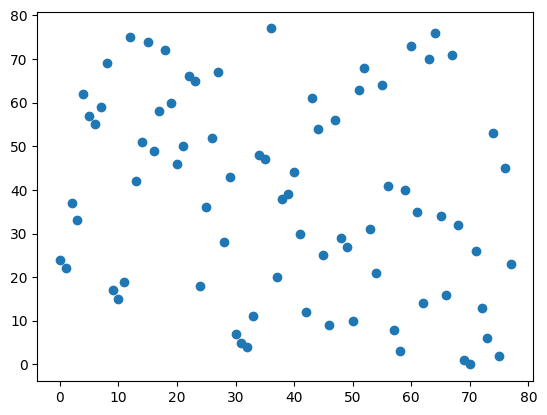

In [25]:
find_index = lambda query, lst: [set(pair[0]) for pair in lst].index(set(query))

y = []

for i in range(len(sorted_queries)):
    query = sorted_queries[i][0]
    weight_index = find_index(query, sorted_weights)
    y.append(weight_index)
    
plt.plot(list(range(len(sorted_queries))), y, 'o')
plt.show()

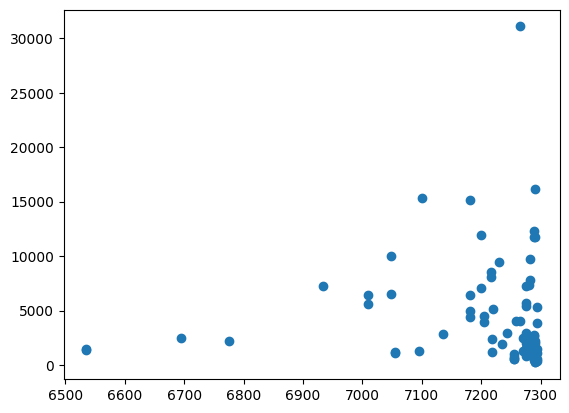

In [34]:
find_index = lambda query, lst: [set(pair[0]) for pair in lst].index(set(query))

x = []
y = []

for i in range(len(sorted_queries)):
    query = sorted_queries[i][0]
    canonical_query_amount = sorted_queries[i][1]
    x.append(canonical_query_amount)
    weight_index = find_index(query, sorted_weights)
    weight = sorted_weights[weight_index][1]
    y.append(weight)
    
plt.plot(x, y, 'o')
plt.show()